# layout

In [253]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 4: Lesser-known Valentine's Day gift traditions
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        }
    ]
}

## test vis

In [201]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_poster_layout(layout, W, H):
    # Create a new figure
    fig, ax = plt.subplots(figsize=(W/100, H/100))  # Scale figure size for visibility
    
    # Set limits and aspect ratio
    ax.set_xlim(0, W)
    ax.set_ylim(0, H)
    ax.set_aspect('equal')
    ax.invert_yaxis()  # Invert y-axis so (0,0) is at top-left
    
    # Colors for different elements
    colors = {
        'Title': 'lightblue',
        'Subtitle': 'lightgreen',
        'KG': 'lightcyan',
        'Highlight': 'lightyellow',
        'Icon': 'lightcoral',
        'Vis': 'lightpink'
    }
    
    # Function to draw a rectangle from coordinates
    def draw_rectangle(coords, label, color, alpha=0.5):
        if coords is None or len(coords) != 4:
            return
        x1, y1 = coords[0]
        x2, y2 = coords[3]  # Bottom-right corner
        if x1 == x2 or y1 == y2:  # Skip zero-area rectangles
            return
        width = x2 - x1
        height = y2 - y1
        rect = patches.Rectangle((x1, y1), width, height, 
                                linewidth=1, edgecolor='black', 
                                facecolor=color, alpha=alpha)
        ax.add_patch(rect)
        # Add label at center
        ax.text(x1 + width/2, y1 + height/2, label, 
                ha='center', va='center', fontsize=6, wrap=True)
    
    # Draw Title
    draw_rectangle(layout['Title'], 'Title', colors['Title'])
    
    # Draw VGs and their components
    for vg_key in layout:
        if vg_key.startswith('VG'):
            vg = layout[vg_key]
            # Draw VG coords (optional outline)
            draw_rectangle(vg['coords'], f"{vg_key}", colors['KG'], alpha=0.2)
            # Draw Subtitle
            if 'Subtitle' in vg:
                draw_rectangle(vg['Subtitle'], f"{vg_key} Subtitle", colors['Subtitle'])
            # Draw KGs
            for kg_key in vg:
                if kg_key.startswith('KG'):
                    kg = vg[kg_key]
                    # Draw KG coords
                    draw_rectangle(kg['coords'], f"{vg_key} {kg_key}", colors['KG'])
                    # Draw Highlight
                    draw_rectangle(kg['Highlight'], f"{vg_key} {kg_key}\nHighlight", colors['Highlight'])
                    # Draw Icon
                    draw_rectangle(kg['Icon'], f"{vg_key} {kg_key}\nIcon", colors['Icon'])
                    # Draw Visualization
                    draw_rectangle(kg['Vis'], f"{vg_key} {kg_key}\nVis", colors['Vis'])
    
    # Set title and labels
    plt.title("Poster Layout Visualization")
    plt.xlabel("Width (pixels)")
    plt.ylabel("Height (pixels)")
    
    # Show grid for reference
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Show plot
    plt.show()

In [230]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_poster_layout(layout, W, H):
    # Create a new figure
    fig, ax = plt.subplots(figsize=(W/100, H/100))  # Scale figure size for visibility
    
    # Set limits and aspect ratio
    ax.set_xlim(0, W)
    ax.set_ylim(0, H)
    ax.set_aspect('equal')
    ax.invert_yaxis()  # Invert y-axis so (0,0) is at top-left
    
    # Colors for different elements
    colors = {
        'Title': 'lightblue',
        'Subtitle': 'lightgreen',
        'KG': 'lightcyan',
        'Highlight': 'lightyellow',
        'Icon': 'lightcoral',
        'Vis': 'lightpink',
        ### BEGIN ADDED CODE ###
        'Text': 'lightgray'  # Added color for Text block
        ### END ADDED CODE ###
    }
    
    # Function to draw a rectangle from coordinates
    def draw_rectangle(coords, label, color, alpha=0.5):
        if coords is None or len(coords) != 4:
            return
        x1, y1 = coords[0]
        x2, y2 = coords[3]  # Bottom-right corner
        if x1 == x2 or y1 == y2:  # Skip zero-area rectangles
            return
        width = x2 - x1
        height = y2 - y1
        rect = patches.Rectangle((x1, y1), width, height, 
                                linewidth=1, edgecolor='black', 
                                facecolor=color, alpha=alpha)
        ax.add_patch(rect)
        # Add label at center
        ax.text(x1 + width/2, y1 + height/2, label, 
                ha='center', va='center', fontsize=6, wrap=True)
    
    # Draw Title
    draw_rectangle(layout['Title'], 'Title', colors['Title'])
    
    # Draw VGs and their components
    for vg_key in layout:
        if vg_key.startswith('VG'):
            vg = layout[vg_key]
            # Draw VG coords (optional outline)
            draw_rectangle(vg['coords'], f"{vg_key}", colors['KG'], alpha=0.2)
            # Draw Subtitle
            if 'Subtitle' in vg:
                draw_rectangle(vg['Subtitle'], f"{vg_key} Subtitle", colors['Subtitle'])
            # Draw KGs
            for kg_key in vg:
                if kg_key.startswith('KG'):
                    kg = vg[kg_key]
                    # Draw KG coords
                    draw_rectangle(kg['coords'], f"{vg_key} {kg_key}", colors['KG'])
                    # Draw Highlight
                    draw_rectangle(kg['Highlight'], f"{vg_key} {kg_key}\nHighlight", colors['Highlight'])
                    # Draw Icon
                    draw_rectangle(kg['Icon'], f"{vg_key} {kg_key}\nIcon", colors['Icon'])
                    # Draw Visualization
                    draw_rectangle(kg['Vis'], f"{vg_key} {kg_key}\nVis", colors['Vis'])
                    ### BEGIN ADDED CODE ###
                    # Draw Text
                    draw_rectangle(kg['Text'], f"{vg_key} {kg_key}\nText", colors['Text'])
                    ### END ADDED CODE ###
    
    # Set title and labels
    plt.title("Poster Layout Visualization")
    plt.xlabel("Width (pixels)")
    plt.ylabel("Height (pixels)")
    
    # Show grid for reference
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Show plot
    plt.show()

## padding util func

In [177]:
def add_padding_to_layout(layout, padding=1):
    """
    Adds padding to all blocks within the layout dictionary.
    
    Args:
        layout: Dictionary containing the poster layout with coordinates for each block.
        padding: Float value to add as padding to each block (default=10).
    
    Returns:
        New layout dictionary with padded coordinates for each block.
    """
    import copy
    
    # Create a deep copy of the layout to avoid modifying the original
    padded_layout = copy.deepcopy(layout)
    
    # Helper function to apply padding to a block's coordinates
    def pad_coords(coords):
        if coords is None:
            return None
        # Original coordinates
        x1, y1 = coords[0]
        x2, y2 = coords[3]  # Bottom-right corner
        # Apply padding
        x1_padded = x1 + padding
        y1_padded = y1 + padding
        x2_padded = x2 - padding
        y2_padded = y2 - padding
        # Ensure the block remains valid (non-negative width and height)
        if x1_padded >= x2_padded or y1_padded >= y2_padded:
            return None  # Block becomes invalid with padding
        return [
            [x1_padded, y1_padded],
            [x2_padded, y1_padded],
            [x1_padded, y2_padded],
            [x2_padded, y2_padded]
        ]
    
    # Pad the Title block
    padded_layout["Title"] = pad_coords(padded_layout["Title"])
    
    # Iterate through each Visual Group (VG)
    for vg_key in padded_layout:
        if vg_key.startswith("VG"):
            vg = padded_layout[vg_key]
            # Pad the Subtitle and VG coords
            if 'Subtitle' in vg:
                vg["Subtitle"] = pad_coords(vg["Subtitle"])
            vg["coords"] = pad_coords(vg["coords"])
            
            # Iterate through each Knowledge Group (KG) within the VG
            for kg_key in vg:
                if kg_key.startswith("KG"):
                    kg = vg[kg_key]
                    # Pad all elements within the KG
                    kg["coords"] = pad_coords(kg["coords"])
                    kg["Highlight"] = pad_coords(kg["Highlight"])
                    kg["Icon"] = pad_coords(kg["Icon"])
                    kg["Vis"] = pad_coords(kg["Vis"])
                    kg["Text"] = pad_coords(kg["Text"])
    
    return padded_layout

## portrait

In [ ]:
# from math import sqrt

# def layout_poster(valentine_data, W, H, margin=0, vertical_margin=0):
#     """
#     Lays out a poster with title, visual groups (VGs), and knowledge groups (KGs).
    
#     Args:
#         valentine_data: Dictionary containing "data" with VGs, each having "knowledges".
#         W: Poster width (float).
#         H: Poster height (float).
#         margin: Horizontal margin for KGs in VGs with multiple KGs (float, default=0).
#         vertical_margin: Vertical spacing between KGs (float, default=0).
    
#     Returns:
#         Dictionary mapping element keys to their coordinates (as lists of [x, y] points).
#         Excludes Text coordinates.
#     """
#     # Character width-to-height ratios
#     def calculate_text_width(string, font_height):
#         ratios = {
#             'B': 0.5, 'E': 0.5, 'F': 0.5, 'J': 0.5, 'L': 0.5, 'P': 0.5, 'S': 0.5,
#             'A': 0.8889, 'D': 0.8889, 'H': 0.8889, 'K': 0.8889, 'N': 0.8889,
#             'R': 0.8889, 'T': 0.8889, 'U': 0.8889, 'V': 0.8889, 'X': 0.8889,
#             'Y': 0.8889, 'Z': 0.8889, 'C': 1.0, 'G': 1.0, 'O': 1.0, 'Q': 1.0,
#             'M': 1.1111, 'W': 1.1111, 'b': 0.5, 'd': 0.5, 'f': 0.5, 'h': 0.5,
#             'k': 0.5, 'l': 0.5, 't': 0.5, 'c': 1.0, 'e': 1.0, 'o': 1.0, 's': 1.0,
#             'a': 0.7, 'g': 0.7, 'n': 0.7, 'p': 0.7, 'q': 0.7, 'r': 0.7, 'u': 0.7,
#             'v': 0.7, 'w': 0.7, 'x': 0.7, 'y': 0.7, 'z': 0.7, ' ': 0.4
#         }
#         return sum(ratios.get(char, 0.7) * font_height for char in string)

#     VGs = valentine_data["data"]
#     n_VG = len(VGs)
    
#     # Calculate coefficients for quadratic equation to find font size x
#     a = 3.0 + 1.5 * n_VG
#     b = 0.0
#     c = 0.0
    
#     for VG in VGs:
#         knowledges = VG["knowledges"]
#         n_KG = len(knowledges)
#         kg_width = W if n_KG == 1 else W - 2 * margin
#         if n_KG > 1:
#             c += (n_KG - 1) * vertical_margin
#         for KG in knowledges:
#             text = KG["knowledge_content"]
#             highlight = KG["first_level_highlight"]
#             n_images = (1 if (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None ) else 0) + (1 if KG["visualization"]["is_visualization"] else 0)
#             s_KG = calculate_text_width(text, 1.0) * (1 + n_images) + 4 * calculate_text_width(highlight, 1.0)
#             b += s_KG / kg_width
    
#     # Solve b * x^2 + a * x + c = H
#     discriminant = a**2 - 4 * b * (c - H)
#     if discriminant < 0:
#         raise ValueError("No solution for font size x")
#     x = (-a + sqrt(discriminant)) / (2 * b) if b != 0 else (H - c) / a
#     if x <= 0:
#         raise ValueError("Invalid font size x")

#     # Layout the poster
#     layout = {}
#     layout["Title"] = [[0.0, 0.0], [W, 0.0], [0.0, 3.0 * x], [W, 3.0 * x]]
#     y = 3.0 * x

#     for i, VG in enumerate(VGs, 1):
#         knowledges = VG["knowledges"]
#         n_KG = len(knowledges)
#         kg_width = W if n_KG == 1 else W - 2 * margin
#         kg_x = 0.0 if n_KG == 1 else margin
        
#         VG_key = f"VG{i}"
#         layout[VG_key] = {}
        
#         # Subtitle
#         y_VG_start = y
#         layout[VG_key]["Subtitle"] = [[0.0, y], [W, y], [0.0, y + 1.5 * x], [W, y + 1.5 * x]]
#         y += 1.5 * x
#         if n_KG > 1:
#             y += vertical_margin
        
#         for j, KG in enumerate(knowledges, 1):
#             text = KG["knowledge_content"]
#             highlight = KG["first_level_highlight"]
#             has_icon = (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None )
#             has_vis = KG["visualization"]["is_visualization"]
            
#             # Calculate areas
#             A_text = x * calculate_text_width(text, x)
#             A_highlight = 2.0 * x * calculate_text_width(highlight, 2.0 * x)
#             A_icon = x * calculate_text_width(text, x) if has_icon else 0.0
#             A_vis = x * calculate_text_width(text, x) if has_vis else 0.0
#             A_KG = A_text + A_highlight + A_icon + A_vis
#             h_KG = A_KG / kg_width if kg_width > 0 else 0.0
            
#             KG_key = f"KG{j}"
#             layout[VG_key][KG_key] = {}
#             layout[VG_key][KG_key]["coords"] = [
#                 [kg_x, y], [kg_x + kg_width, y],
#                 [kg_x, y + h_KG], [kg_x + kg_width, y + h_KG]
#             ]
            
#             # Internal KG layout
#             y_KG = y
#             h_highlight = 2.0 * x
#             w_highlight = min(calculate_text_width(highlight, 2.0 * x), kg_width)
#             layout[VG_key][KG_key]["Highlight"] = [
#                 [kg_x, y_KG], [kg_x + w_highlight, y_KG],
#                 [kg_x, y_KG + h_highlight], [kg_x + w_highlight, y_KG + h_highlight]
#             ]
#             # Initialize image coordinates
#             layout[VG_key][KG_key]["Icon"] = None
#             layout[VG_key][KG_key]["Vis"] = None

#             # Image placement
#             aspect_ratios = [
#                 1.0, 1.333, 0.75, 1.5, 0.667, 1.777, 0.562, 0.5, 2.0,
#                 1.4, 0.714, 0.8, 1.25, 0.6, 1.667
#             ]

#             # Helper functions for one image
#             def try_placement_a(r, A_img):
#                 w_img = sqrt(A_img * r)
#                 h_img = sqrt(A_img / r)
#                 x1 = kg_x + kg_width - w_img
#                 y1 = y_KG
#                 x2 = kg_x + kg_width
#                 y2 = y_KG + h_img
#                 coords = [[x1, y1], [x2, y1], [x1, y2], [x2, y2]]
#                 overflow_area = 0
#                 if y2 > y_KG + h_KG:
#                     overflow_area += (y2 - (y_KG + h_KG)) * w_img
#                 if x1 < kg_x + w_highlight:
#                     overlap_area = (min(x2, kg_x + w_highlight) - x1) * h_img if x2 > kg_x + w_highlight else w_img * h_img
#                     overflow_area += overlap_area
#                 return True if overflow_area == 0 else False, coords, overflow_area

#             def try_placement_b(r, A_img):
#                 w_img = sqrt(A_img * r)
#                 h_img = sqrt(A_img / r)
#                 x1 = kg_x
#                 y1 = y_KG + h_highlight
#                 x2 = kg_x + w_img
#                 y2 = y_KG + h_highlight + h_img
#                 coords = [[x1, y1], [x2, y1], [x1, y2], [x2, y2]]
#                 overflow_area = 0
#                 if y2 > y_KG + h_KG:
#                     overflow_area += (y2 - (y_KG + h_KG)) * w_img
#                 if x2 > kg_x + kg_width:
#                     overflow_area += (x2 - (kg_x + kg_width)) * h_img
#                 return True if overflow_area == 0 else False, coords, overflow_area

#             # Helper functions for two images (Img_a = Icon, Img_b = Vis)
#             def try_combination_1(r_a, r_b):
#                 w_a = sqrt(A_icon * r_a)
#                 h_a = sqrt(A_icon / r_a)
#                 w_b = sqrt(A_vis * r_b)
#                 h_b = sqrt(A_vis / r_b)
#                 x1_a = kg_x + kg_width - w_a
#                 y1_a = y_KG
#                 x2_a = kg_x + kg_width
#                 y2_a = y_KG + h_a
#                 coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
#                 x1_b = kg_x + kg_width - w_a - w_b
#                 y1_b = y_KG
#                 x2_b = kg_x + kg_width - w_a
#                 y2_b = y_KG + h_b
#                 coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
#                 overflow_area = 0
#                 if y2_a > y_KG + h_KG:
#                     overflow_area += (y2_a - (y_KG + h_KG)) * w_a
#                 if y2_b > y_KG + h_KG:
#                     overflow_area += (y2_b - (y_KG + h_KG)) * w_b
#                 if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
#                     overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
#                     overflow_area += overlap_area
#                 if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
#                     overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight)
#                     overflow_area += overlap_area
#                 return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

#             def try_combination_2(r_a, r_b):
#                 w_a = sqrt(A_icon * r_a)
#                 h_a = sqrt(A_icon / r_a)
#                 w_b = sqrt(A_vis * r_b)
#                 h_b = sqrt(A_vis / r_b)
#                 x1_a = kg_x + kg_width - w_a
#                 y1_a = y_KG
#                 x2_a = kg_x + kg_width
#                 y2_a = y_KG + h_a
#                 coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
#                 x1_b = kg_x
#                 y1_b = y_KG + h_highlight
#                 x2_b = kg_x + w_b
#                 y2_b = y_KG + h_highlight + h_b
#                 coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
#                 overflow_area = 0
#                 if y2_a > y_KG + h_KG:
#                     overflow_area += (y2_a - (y_KG + h_KG)) * w_a
#                 if y2_b > y_KG + h_KG:
#                     overflow_area += (y2_b - (y_KG + h_KG)) * w_b
#                 if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
#                     overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
#                     overflow_area += overlap_area
#                 if x2_b > kg_x + kg_width:
#                     overflow_area += (x2_b - (kg_x + kg_width)) * h_b
#                 return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

#             def try_combination_3(r_a, r_b):
#                 w_a = sqrt(A_icon * r_a)
#                 h_a = sqrt(A_icon / r_a)
#                 w_b = sqrt(A_vis * r_b)
#                 h_b = sqrt(A_vis / r_b)
#                 x1_a = kg_x + kg_width - w_a
#                 y1_a = y_KG
#                 x2_a = kg_x + kg_width
#                 y2_a = y_KG + h_a
#                 coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
#                 x1_b = kg_x + kg_width - w_b
#                 y1_b = y_KG + h_a
#                 x2_b = kg_x + kg_width
#                 y2_b = y_KG + h_a + h_b
#                 coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
#                 overflow_area = 0
#                 if y2_a > y_KG + h_KG:
#                     overflow_area += (y2_a - (y_KG + h_KG)) * w_a
#                 if y2_b > y_KG + h_KG:
#                     overflow_area += (y2_b - (y_KG + h_KG)) * w_b
#                 if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
#                     overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
#                     overflow_area += overlap_area
#                 if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
#                     overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight - (y1_b - y_KG)) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight - (y1_b - y_KG))
#                     overflow_area += overlap_area
#                 return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

#             def try_combination_4(r_a, r_b):
#                 w_a = sqrt(A_icon * r_a)
#                 h_a = sqrt(A_icon / r_a)
#                 w_b = sqrt(A_vis * r_b)
#                 h_b = sqrt(A_vis / r_b)
#                 x1_a = kg_x
#                 y1_a = y_KG + h_highlight
#                 x2_a = kg_x + w_a
#                 y2_a = y_KG + h_highlight + h_a
#                 coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
#                 x1_b = kg_x + kg_width - w_b
#                 y1_b = y_KG + h_KG - h_b
#                 x2_b = kg_x + kg_width
#                 y2_b = y_KG + h_KG
#                 coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
#                 overflow_area = 0
#                 if y2_a > y_KG + h_KG:
#                     overflow_area += (y2_a - (y_KG + h_KG)) * w_a
#                 if x2_a > kg_x + kg_width:
#                     overflow_area += (x2_a - (kg_x + kg_width)) * h_a
#                 if y2_b > y_KG + h_KG:  # Shouldn't happen due to bottom alignment, but added for consistency
#                     overflow_area += (y2_b - (y_KG + h_KG)) * w_b
#                 if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
#                     overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight - (y1_b - y_KG)) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight - (y1_b - y_KG))
#                     overflow_area += overlap_area
#                 return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area
#             # Place images based on the number present
#             if has_icon and has_vis:
#                 min_overflow = float('inf')
#                 best_layout = None
#                 combination_funcs = [try_combination_1, try_combination_2, try_combination_3, try_combination_4]
#                 for idx, comb in enumerate(combination_funcs):
#                     for r_a in aspect_ratios:
#                         for r_b in aspect_ratios:
#                             fit, coords_a, coords_b, overflow = comb(r_a, r_b)
#                             if fit:
#                                 layout[VG_key][KG_key]["Icon"] = coords_a
#                                 layout[VG_key][KG_key]["Vis"] = coords_b
#                                 min_overflow = 0
#                                 break
#                             if overflow < min_overflow:
#                                 min_overflow = overflow
#                                 best_layout = (coords_a, coords_b, r_a, r_b, idx)
#                         if min_overflow == 0:
#                             break
#                     if min_overflow == 0:
#                         break
#                 if min_overflow > 0:
#                     coords_a, coords_b, r_a, r_b, comb_idx = best_layout
#                     w_a = sqrt(A_icon * r_a)
#                     h_a = sqrt(A_icon / r_a)
#                     x1_a, y1_a = coords_a[0]
#                     x2_a, y2_a = coords_a[3]
#                     w_b = sqrt(A_vis * r_b)
#                     h_b = sqrt(A_vis / r_b)
#                     x1_b, y1_b = coords_b[0]
#                     x2_b, y2_b = coords_b[3]

#                     if comb_idx == 0:  # Combination 1
#                         if x1_a < kg_x + w_highlight:
#                             w_a = kg_width - (kg_x + w_highlight - x1_a)
#                         if y2_a > y_KG + h_KG:
#                             h_a = h_KG - (y1_a - y_KG)
#                         w_a_new = min(w_a, h_a * r_a)
#                         h_a_new = w_a_new / r_a
#                         coords_a = [
#                             [x1_a, y1_a], [x1_a + w_a_new, y1_a],
#                             [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]
#                         ]
#                         if x1_b < kg_x + w_highlight:
#                             w_b = kg_width - (kg_x + w_highlight - x1_b)
#                         if y2_b > y_KG + h_KG:
#                             h_b = h_KG - (y1_b - y_KG)
#                         w_b_new = min(w_b, h_b * r_b)
#                         h_b_new = w_b_new / r_b
#                         coords_b = [
#                             [x1_b, y1_b], [x1_b + w_b_new, y1_b],
#                             [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]
#                         ]
#                     elif comb_idx == 1:  # Combination 2
#                         if x1_a < kg_x + w_highlight:
#                             w_a = kg_width - (kg_x + w_highlight - x1_a)
#                         if y2_a > y_KG + h_KG:
#                             h_a = h_KG - (y1_a - y_KG)
#                         w_a_new = min(w_a, h_a * r_a)
#                         h_a_new = w_a_new / r_a
#                         coords_a = [
#                             [x1_a, y1_a], [x1_a + w_a_new, y1_a],
#                             [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]
#                         ]
#                         if x2_b > kg_x + kg_width:
#                             w_b = kg_width - (x1_b - kg_x)
#                         if y2_b > y_KG + h_KG:
#                             h_b = h_KG - (y1_b - y_KG)
#                         if x2_b > x1_a + w_a_new:
#                             w_b = min(w_b, x1_a + w_a_new - x1_b)
#                         w_b_new = min(w_b, h_b * r_b)
#                         h_b_new = w_b_new / r_b
#                         coords_b = [
#                             [x1_b, y1_b], [x1_b + w_b_new, y1_b],
#                             [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]
#                         ]
#                     elif comb_idx == 2:  # Combination 3
#                         if x1_a < kg_x + w_highlight:
#                             w_a = kg_width - (kg_x + w_highlight - x1_a)
#                         if y2_a > y_KG + h_KG:
#                             h_a = h_KG - (y1_a - y_KG)
#                         w_a_new = min(w_a, h_a * r_a)
#                         h_a_new = w_a_new / r_a
#                         coords_a = [
#                             [x1_a, y1_a], [x1_a + w_a_new, y1_a],
#                             [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]
#                         ]
#                         if x1_b < kg_x + w_highlight:
#                             w_b = kg_width - (kg_x + w_highlight - x1_b)
#                         if y2_b > y_KG + h_KG:
#                             h_b = h_KG - (y1_b - y_KG)
#                         w_b_new = min(w_b, h_b * r_b)
#                         h_b_new = w_b_new / r_b
#                         coords_b = [
#                             [x1_b, y1_b], [x1_b + w_b_new, y1_b],
#                             [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]
#                         ]
#                     elif comb_idx == 3:
#                         # Image A: Adjust for right and bottom overflow
#                         if x2_a > kg_x + kg_width:
#                             w_a = kg_width - (x1_a - kg_x)  # w_a = kg_width since x1_a = kg_x
#                         if y2_a > y_KG + h_KG:
#                             h_a = h_KG - (y1_a - y_KG)     # h_a = h_KG - h_highlight since y1_a = y_KG + h_highlight
#                         w_a_new = min(w_a, h_a * r_a)
#                         h_a_new = w_a_new / r_a
#                         coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
                        
#                         # Image B: Adjust for left, top, and highlight overlap, anchored at (x2_b, y2_b)
#                         if x1_b < kg_x:  # Left boundary overflow
#                             w_b = kg_width
#                         if y1_b < y_KG:  # Top boundary overflow
#                             h_b = h_KG
#                         if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:  # Highlight overlap
#                             ratio_x = (kg_width - w_highlight) / w_b  # Ratio to make x1_b = kg_x + w_highlight
#                             ratio_y = (h_KG - h_highlight) / h_b      # Ratio to make y1_b = y_KG + h_highlight
#                             scale = max(ratio_x, ratio_y)             # Use the smaller ratio to satisfy both
#                             w_b_new = w_b * scale
#                             h_b_new = h_b * scale
#                         else:
#                             w_b_new = w_b
#                             h_b_new = h_b
#                         # Recalculate coordinates with anchor at (x2_b, y2_b)
#                         x1_b_new = x2_b - w_b_new
#                         y1_b_new = y2_b - h_b_new
#                         coords_b = [[x1_b_new, y1_b_new], [x2_b, y1_b_new], [x1_b_new, y2_b], [x2_b, y2_b]]
#                     layout[VG_key][KG_key]["Icon"] = coords_a
#                     layout[VG_key][KG_key]["Vis"] = coords_b

#             elif has_icon:
#                 min_overflow = float('inf')
#                 best_layout = None
#                 placement_funcs = [try_placement_a, try_placement_b]
#                 for idx, placement in enumerate(placement_funcs):
#                     for r in aspect_ratios:
#                         fit, coords, overflow = placement(r, A_icon)
#                         if fit:
#                             layout[VG_key][KG_key]["Icon"] = coords
#                             min_overflow = 0
#                             break
#                         if overflow < min_overflow:
#                             min_overflow = overflow
#                             best_layout = (coords, r, idx)
#                     if min_overflow == 0:
#                         break
#                 if min_overflow > 0:
#                     coords, r, placement_idx = best_layout
#                     w_img = sqrt(A_icon * r)
#                     h_img = sqrt(A_icon / r)
#                     x1, y1 = coords[0]
#                     x2, y2 = coords[3]
#                     if placement_idx == 0:  # Placement A
#                         if x1 < kg_x + w_highlight:
#                             w_img = kg_width - (kg_x + w_highlight - x1)
#                         if y2 > y_KG + h_KG:
#                             h_img = h_KG - (y1 - y_KG)
#                     elif placement_idx == 1:  # Placement B
#                         if x2 > kg_x + kg_width:
#                             w_img = kg_width - (x1 - kg_x)
#                         if y2 > y_KG + h_KG:
#                             h_img = h_KG - (y1 - y_KG)
#                     w_img_new = min(w_img, h_img * r)
#                     h_img_new = w_img_new / r
#                     layout[VG_key][KG_key]["Icon"] = [
#                         [x1, y1], [x1 + w_img_new, y1],
#                         [x1, y1 + h_img_new], [x1 + w_img_new, y1 + h_img_new]
#                     ]

#             elif has_vis:
#                 min_overflow = float('inf')
#                 best_layout = None
#                 placement_funcs = [try_placement_a, try_placement_b]
#                 for idx, placement in enumerate(placement_funcs):
#                     for r in aspect_ratios:
#                         fit, coords, overflow = placement(r, A_vis)
#                         if fit:
#                             layout[VG_key][KG_key]["Vis"] = coords
#                             min_overflow = 0
#                             break
#                         if overflow < min_overflow:
#                             min_overflow = overflow
#                             best_layout = (coords, r, idx)
#                     if min_overflow == 0:
#                         break
#                 if min_overflow > 0:
#                     coords, r, placement_idx = best_layout
#                     w_img = sqrt(A_vis * r)
#                     h_img = sqrt(A_vis / r)
#                     x1, y1 = coords[0]
#                     x2, y2 = coords[3]
#                     if placement_idx == 0:  # Placement A
#                         if x1 < kg_x + w_highlight:
#                             w_img = kg_width - (kg_x + w_highlight - x1)
#                         if y2 > y_KG + h_KG:
#                             h_img = h_KG - (y1 - y_KG)
#                     elif placement_idx == 1:  # Placement B
#                         if x2 > kg_x + kg_width:
#                             w_img = kg_width - (x1 - kg_x)
#                         if y2 > y_KG + h_KG:
#                             h_img = h_KG - (y1 - y_KG)
#                     w_img_new = min(w_img, h_img * r)
#                     h_img_new = w_img_new / r
#                     layout[VG_key][KG_key]["Vis"] = [
#                         [x1, y1], [x1 + w_img_new, y1],
#                         [x1, y1 + h_img_new], [x1 + w_img_new, y1 + h_img_new]
#                     ]
            
#             y += h_KG
#             if j < n_KG:
#                 y += vertical_margin
        
#         layout[VG_key]["coords"] = [
#             [0.0, y_VG_start], [W, y_VG_start],
#             [0.0, y], [W, y]
#         ]
    
#     return layout

# # Test code
# W, H = 628.0, 1200.0
# layout = layout_poster(valentine_data, W, H)
# layout

{'Title': [[0.0, 0.0],
  [628.0, 0.0],
  [0.0, 89.16190344167791],
  [628.0, 89.16190344167791]],
 'VG1': {'Subtitle': [[0.0, 89.16190344167791],
   [628.0, 89.16190344167791],
   [0.0, 133.74285516251686],
   [628.0, 133.74285516251686]],
  'KG1': {'coords': [[0.0, 133.74285516251686],
    [628.0, 133.74285516251686],
    [0.0, 310.406077947919],
    [628.0, 310.406077947919]],
   'Highlight': [[0.0, 133.74285516251686],
    [628.0, 133.74285516251686],
    [0.0, 193.18412412363546],
    [628.0, 193.18412412363546]],
   'Icon': None,
   'Vis': [[0.0, 193.18412412363546],
    [234.44390764856712, 193.18412412363546],
    [0.0, 310.406077947919],
    [234.44390764856712, 310.406077947919]]},
  'coords': [[0.0, 89.16190344167791],
   [628.0, 89.16190344167791],
   [0.0, 310.406077947919],
   [628.0, 310.406077947919]]},
 'VG2': {'Subtitle': [[0.0, 310.406077947919],
   [628.0, 310.406077947919],
   [0.0, 354.98702966875794],
   [628.0, 354.98702966875794]],
  'KG1': {'coords': [[0, 354.9

In [191]:
from math import sqrt

def layout_poster(valentine_data, W, H, margin=0, vertical_margin=0):
    """
    Lays out a poster with title, visual groups (VGs), and knowledge groups (KGs).
    
    Args:
        valentine_data: Dictionary containing "data" with VGs, each having "knowledges".
        W: Poster width (float).
        H: Poster height (float).
        margin: Horizontal margin for KGs in VGs with multiple KGs (float, default=0).
        vertical_margin: Vertical spacing between KGs (float, default=0).
    
    Returns:
        Dictionary mapping element keys to their coordinates (as lists of [x, y] points).
        Now includes Text coordinates for each KG.
    """
    # Character width-to-height ratios
    def calculate_text_width(string, font_height):
        ratios = {
            'B': 0.5, 'E': 0.5, 'F': 0.5, 'J': 0.5, 'L': 0.5, 'P': 0.5, 'S': 0.5,
            'A': 0.8889, 'D': 0.8889, 'H': 0.8889, 'K': 0.8889, 'N': 0.8889,
            'R': 0.8889, 'T': 0.8889, 'U': 0.8889, 'V': 0.8889, 'X': 0.8889,
            'Y': 0.8889, 'Z': 0.8889, 'C': 1.0, 'G': 1.0, 'O': 1.0, 'Q': 1.0,
            'M': 1.1111, 'W': 1.1111, 'b': 0.5, 'd': 0.5, 'f': 0.5, 'h': 0.5,
            'k': 0.5, 'l': 0.5, 't': 0.5, 'c': 1.0, 'e': 1.0, 'o': 1.0, 's': 1.0,
            'a': 0.7, 'g': 0.7, 'n': 0.7, 'p': 0.7, 'q': 0.7, 'r': 0.7, 'u': 0.7,
            'v': 0.7, 'w': 0.7, 'x': 0.7, 'y': 0.7, 'z': 0.7, ' ': 0.4
        }
        return sum(ratios.get(char, 0.7) * font_height for char in string)

    ### BEGIN ADDED CODE ###
    # Helper function to calculate area of a rectangle
    def calculate_area(x1, y1, x2, y2):
        return (x2 - x1) * (y2 - y1)
    ### END ADDED CODE ###

    VGs = valentine_data["data"]
    n_VG = len(VGs)
    
    # Calculate coefficients for quadratic equation to find font size x
    a = 3.0 + 1.5 * n_VG
    b = 0.0
    c = 0.0
    
    for VG in VGs:
        knowledges = VG["knowledges"]
        n_KG = len(knowledges)
        kg_width = W if n_KG == 1 else W - 2 * margin
        if n_KG > 1:
            c += (n_KG - 1) * vertical_margin
        for KG in knowledges:
            text = KG["knowledge_content"]
            highlight = KG["first_level_highlight"]
            n_images = (1 if (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None ) else 0) + (1 if KG["visualization"]["is_visualization"] else 0)
            s_KG = calculate_text_width(text, 1.0) * (1 + n_images) + 4 * calculate_text_width(highlight, 1.0)
            b += s_KG / kg_width
    
    # Solve b * x^2 + a * x + c = H
    discriminant = a**2 - 4 * b * (c - H)
    if discriminant < 0:
        raise ValueError("No solution for font size x")
    x = (-a + sqrt(discriminant)) / (2 * b) if b != 0 else (H - c) / a
    if x <= 0:
        raise ValueError("Invalid font size x")

    # Layout the poster
    layout = {}
    layout["Title"] = [[0.0, 0.0], [W, 0.0], [0.0, 3.0 * x], [W, 3.0 * x]]
    y = 3.0 * x

    for i, VG in enumerate(VGs, 1):
        knowledges = VG["knowledges"]
        n_KG = len(knowledges)
        kg_width = W if n_KG == 1 else W - 2 * margin
        kg_x = 0.0 if n_KG == 1 else margin
        
        VG_key = f"VG{i}"
        layout[VG_key] = {}
        
        # Subtitle
        y_VG_start = y
        layout[VG_key]["Subtitle"] = [[0.0, y], [W, y], [0.0, y + 1.5 * x], [W, y + 1.5 * x]]
        y += 1.5 * x
        if n_KG > 1:
            y += vertical_margin
        
        for j, KG in enumerate(knowledges, 1):
            text = KG["knowledge_content"]
            highlight = KG["first_level_highlight"]
            has_icon = (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None )
            has_vis = KG["visualization"]["is_visualization"]
            
            # Calculate areas
            A_text = x * calculate_text_width(text, x)
            A_highlight = 2.0 * x * calculate_text_width(highlight, 2.0 * x)
            A_icon = x * calculate_text_width(text, x) if has_icon else 0.0
            A_vis = x * calculate_text_width(text, x) if has_vis else 0.0
            A_KG = A_text + A_highlight + A_icon + A_vis
            h_KG = A_KG / kg_width if kg_width > 0 else 0.0
            
            KG_key = f"KG{j}"
            layout[VG_key][KG_key] = {}
            layout[VG_key][KG_key]["coords"] = [
                [kg_x, y], [kg_x + kg_width, y],
                [kg_x, y + h_KG], [kg_x + kg_width, y + h_KG]
            ]
            
            # Internal KG layout
            y_KG = y
            h_highlight = 2.0 * x
            w_highlight = min(calculate_text_width(highlight, 2.0 * x), kg_width)
            layout[VG_key][KG_key]["Highlight"] = [
                [kg_x, y_KG], [kg_x + w_highlight, y_KG],
                [kg_x, y_KG + h_highlight], [kg_x + w_highlight, y_KG + h_highlight]
            ]
            layout[VG_key][KG_key]["Icon"] = None
            layout[VG_key][KG_key]["Vis"] = None
            layout[VG_key][KG_key]["placement_type"] = "none"  # Default placement_type

            # Image placement
            aspect_ratios = [
                1.0, 1.333, 0.75, 1.5, 0.667, 1.777, 0.562, 0.5, 2.0,
                1.4, 0.714, 0.8, 1.25, 0.6, 1.667
            ]

            # Helper functions for one image
            def try_placement_a(r, A_img):
                w_img = sqrt(A_img * r)
                h_img = sqrt(A_img / r)
                x1 = kg_x + kg_width - w_img
                y1 = y_KG
                x2 = kg_x + kg_width
                y2 = y_KG + h_img
                coords = [[x1, y1], [x2, y1], [x1, y2], [x2, y2]]
                overflow_area = 0
                if y2 > y_KG + h_KG:
                    overflow_area += (y2 - (y_KG + h_KG)) * w_img
                if x1 < kg_x + w_highlight:
                    overlap_area = (min(x2, kg_x + w_highlight) - x1) * h_img if x2 > kg_x + w_highlight else w_img * h_img
                    overflow_area += overlap_area
                return True if overflow_area == 0 else False, coords, overflow_area

            def try_placement_b(r, A_img):
                w_img = sqrt(A_img * r)
                h_img = sqrt(A_img / r)
                x1 = kg_x
                y1 = y_KG + h_highlight
                x2 = kg_x + w_img
                y2 = y_KG + h_highlight + h_img
                coords = [[x1, y1], [x2, y1], [x1, y2], [x2, y2]]
                overflow_area = 0
                if y2 > y_KG + h_KG:
                    overflow_area += (y2 - (y_KG + h_KG)) * w_img
                if x2 > kg_x + kg_width:
                    overflow_area += (x2 - (kg_x + kg_width)) * h_img
                return True if overflow_area == 0 else False, coords, overflow_area

            # Helper functions for two images (Img_a = Icon, Img_b = Vis)
            def try_combination_1(r_a, r_b):
                w_a = sqrt(A_icon * r_a)
                h_a = sqrt(A_icon / r_a)
                w_b = sqrt(A_vis * r_b)
                h_b = sqrt(A_vis / r_b)
                x1_a = kg_x + kg_width - w_a
                y1_a = y_KG
                x2_a = kg_x + kg_width
                y2_a = y_KG + h_a
                coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
                x1_b = kg_x + kg_width - w_a - w_b
                y1_b = y_KG
                x2_b = kg_x + kg_width - w_a
                y2_b = y_KG + h_b
                coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
                overflow_area = 0
                if y2_a > y_KG + h_KG:
                    overflow_area += (y2_a - (y_KG + h_KG)) * w_a
                if y2_b > y_KG + h_KG:
                    overflow_area += (y2_b - (y_KG + h_KG)) * w_b
                if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
                    overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
                    overflow_area += overlap_area
                if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
                    overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight)
                    overflow_area += overlap_area
                return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

            def try_combination_2(r_a, r_b):
                w_a = sqrt(A_icon * r_a)
                h_a = sqrt(A_icon / r_a)
                w_b = sqrt(A_vis * r_b)
                h_b = sqrt(A_vis / r_b)
                x1_a = kg_x + kg_width - w_a
                y1_a = y_KG
                x2_a = kg_x + kg_width
                y2_a = y_KG + h_a
                coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
                x1_b = kg_x
                y1_b = y_KG + h_highlight
                x2_b = kg_x + w_b
                y2_b = y_KG + h_highlight + h_b
                coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
                overflow_area = 0
                if y2_a > y_KG + h_KG:
                    overflow_area += (y2_a - (y_KG + h_KG)) * w_a
                if y2_b > y_KG + h_KG:
                    overflow_area += (y2_b - (y_KG + h_KG)) * w_b
                if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
                    overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
                    overflow_area += overlap_area
                if x2_b > kg_x + kg_width:
                    overflow_area += (x2_b - (kg_x + kg_width)) * h_b
                return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

            def try_combination_3(r_a, r_b):
                w_a = sqrt(A_icon * r_a)
                h_a = sqrt(A_icon / r_a)
                w_b = sqrt(A_vis * r_b)
                h_b = sqrt(A_vis / r_b)
                x1_a = kg_x + kg_width - w_a
                y1_a = y_KG
                x2_a = kg_x + kg_width
                y2_a = y_KG + h_a
                coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
                x1_b = kg_x + kg_width - w_b
                y1_b = y_KG + h_a
                x2_b = kg_x + kg_width
                y2_b = y_KG + h_a + h_b
                coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
                overflow_area = 0
                if y2_a > y_KG + h_KG:
                    overflow_area += (y2_a - (y_KG + h_KG)) * w_a
                if y2_b > y_KG + h_KG:
                    overflow_area += (y2_b - (y_KG + h_KG)) * w_b
                if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
                    overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
                    overflow_area += overlap_area
                if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
                    overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight - (y1_b - y_KG)) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight - (y1_b - y_KG))
                    overflow_area += overlap_area
                return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

            def try_combination_4(r_a, r_b):
                w_a = sqrt(A_icon * r_a)
                h_a = sqrt(A_icon / r_a)
                w_b = sqrt(A_vis * r_b)
                h_b = sqrt(A_vis / r_b)
                x1_a = kg_x
                y1_a = y_KG + h_highlight
                x2_a = kg_x + w_a
                y2_a = y_KG + h_highlight + h_a
                coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
                x1_b = kg_x + kg_width - w_b
                y1_b = y_KG + h_KG - h_b
                x2_b = kg_x + kg_width
                y2_b = y_KG + h_KG
                coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
                overflow_area = 0
                if y2_a > y_KG + h_KG:
                    overflow_area += (y2_a - (y_KG + h_KG)) * w_a
                if x2_a > kg_x + kg_width:
                    overflow_area += (x2_a - (kg_x + kg_width)) * h_a
                if y2_b > y_KG + h_KG:  # Shouldn't happen due to bottom alignment
                    overflow_area += (y2_b - (y_KG + h_KG)) * w_b
                if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
                    overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight - (y1_b - y_KG)) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight - (y1_b - y_KG))
                    overflow_area += overlap_area
                return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

            # Place images and set placement_type
            if has_icon and has_vis:
                min_overflow = float('inf')
                best_layout = None
                combination_funcs = [try_combination_1, try_combination_2, try_combination_3, try_combination_4]
                for idx, comb in enumerate(combination_funcs):
                    for r_a in aspect_ratios:
                        for r_b in aspect_ratios:
                            fit, coords_a, coords_b, overflow = comb(r_a, r_b)
                            if fit:
                                layout[VG_key][KG_key]["Icon"] = coords_a
                                layout[VG_key][KG_key]["Vis"] = coords_b
                                layout[VG_key][KG_key]["placement_type"] = f"comb{idx + 1}"
                                min_overflow = 0
                                break
                            if overflow < min_overflow:
                                min_overflow = overflow
                                best_layout = (coords_a, coords_b, r_a, r_b, idx)
                        if min_overflow == 0:
                            break
                    if min_overflow == 0:
                        break
                if min_overflow > 0:
                    coords_a, coords_b, r_a, r_b, comb_idx = best_layout
                    w_a = sqrt(A_icon * r_a)
                    h_a = sqrt(A_icon / r_a)
                    x1_a, y1_a = coords_a[0]
                    x2_a, y2_a = coords_a[3]
                    w_b = sqrt(A_vis * r_b)
                    h_b = sqrt(A_vis / r_b)
                    x1_b, y1_b = coords_b[0]
                    x2_b, y2_b = coords_b[3]

                    if comb_idx == 0:  # Combination 1
                        if x1_a < kg_x + w_highlight:
                            w_a = kg_width - (kg_x + w_highlight - x1_a)
                        if y2_a > y_KG + h_KG:
                            h_a = h_KG - (y1_a - y_KG)
                        w_a_new = min(w_a, h_a * r_a)
                        h_a_new = w_a_new / r_a
                        coords_a = [
                            [x1_a, y1_a], [x1_a + w_a_new, y1_a],
                            [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]
                        ]
                        if x1_b < kg_x + w_highlight:
                            w_b = kg_width - (kg_x + w_highlight - x1_b)
                        if y2_b > y_KG + h_KG:
                            h_b = h_KG - (y1_b - y_KG)
                        w_b_new = min(w_b, h_b * r_b)
                        h_b_new = w_b_new / r_b
                        coords_b = [
                            [x1_b, y1_b], [x1_b + w_b_new, y1_b],
                            [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]
                        ]
                    elif comb_idx == 1:  # Combination 2
                        if x1_a < kg_x + w_highlight:
                            w_a = kg_width - (kg_x + w_highlight - x1_a)
                        if y2_a > y_KG + h_KG:
                            h_a = h_KG - (y1_a - y_KG)
                        w_a_new = min(w_a, h_a * r_a)
                        h_a_new = w_a_new / r_a
                        coords_a = [
                            [x1_a, y1_a], [x1_a + w_a_new, y1_a],
                            [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]
                        ]
                        if x2_b > kg_x + kg_width:
                            w_b = kg_width - (x1_b - kg_x)
                        if y2_b > y_KG + h_KG:
                            h_b = h_KG - (y1_b - y_KG)
                        if x2_b > x1_a + w_a_new:
                            w_b = min(w_b, x1_a + w_a_new - x1_b)
                        w_b_new = min(w_b, h_b * r_b)
                        h_b_new = w_b_new / r_b
                        coords_b = [
                            [x1_b, y1_b], [x1_b + w_b_new, y1_b],
                            [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]
                        ]
                    elif comb_idx == 2:  # Combination 3
                        if x1_a < kg_x + w_highlight:
                            w_a = kg_width - (kg_x + w_highlight - x1_a)
                        if y2_a > y_KG + h_KG:
                            h_a = h_KG - (y1_a - y_KG)
                        w_a_new = min(w_a, h_a * r_a)
                        h_a_new = w_a_new / r_a
                        coords_a = [
                            [x1_a, y1_a], [x1_a + w_a_new, y1_a],
                            [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]
                        ]
                        if x1_b < kg_x + w_highlight:
                            w_b = kg_width - (kg_x + w_highlight - x1_b)
                        if y2_b > y_KG + h_KG:
                            h_b = h_KG - (y1_b - y_KG)
                        w_b_new = min(w_b, h_b * r_b)
                        h_b_new = w_b_new / r_b
                        coords_b = [
                            [x1_b, y1_b], [x1_b + w_b_new, y1_b],
                            [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]
                        ]
                    elif comb_idx == 3:  # Combination 4
                        if x2_a > kg_x + kg_width:
                            w_a = kg_width - (x1_a - kg_x)
                        if y2_a > y_KG + h_KG:
                            h_a = h_KG - (y1_a - y_KG)
                        w_a_new = min(w_a, h_a * r_a)
                        h_a_new = w_a_new / r_a
                        coords_a = [
                            [x1_a, y1_a], [x1_a + w_a_new, y1_a],
                            [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]
                        ]
                        if x1_b < kg_x + w_highlight:
                            w_b = kg_width - (kg_x + w_highlight - x1_b)
                        if y2_b > y_KG + h_KG:
                            h_b = h_KG - (y1_b - y_KG)
                        w_b_new = min(w_b, h_b * r_b)
                        h_b_new = w_b_new / r_b
                        coords_b = [
                            [x1_b, y1_b], [x1_b + w_b_new, y1_b],
                            [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]
                        ]
                    layout[VG_key][KG_key]["Icon"] = coords_a
                    layout[VG_key][KG_key]["Vis"] = coords_b
                    layout[VG_key][KG_key]["placement_type"] = f"comb{comb_idx + 1}"

            elif has_icon:
                min_overflow = float('inf')
                best_layout = None
                placement_funcs = [try_placement_a, try_placement_b]
                for idx, placement in enumerate(placement_funcs):
                    for r in aspect_ratios:
                        fit, coords, overflow = placement(r, A_icon)
                        if fit:
                            layout[VG_key][KG_key]["Icon"] = coords
                            layout[VG_key][KG_key]["placement_type"] = 'a' if idx == 0 else 'b'
                            min_overflow = 0
                            break
                        if overflow < min_overflow:
                            min_overflow = overflow
                            best_layout = (coords, r, idx)
                    if min_overflow == 0:
                        break
                if min_overflow > 0:
                    coords, r, placement_idx = best_layout
                    w_img = sqrt(A_icon * r)
                    h_img = sqrt(A_icon / r)
                    x1, y1 = coords[0]
                    x2, y2 = coords[3]
                    if placement_idx == 0:  # Placement A
                        if x1 < kg_x + w_highlight:
                            w_img = kg_width - (kg_x + w_highlight - x1)
                        if y2 > y_KG + h_KG:
                            h_img = h_KG - (y1 - y_KG)
                    elif placement_idx == 1:  # Placement B
                        if x2 > kg_x + kg_width:
                            w_img = kg_width - (x1 - kg_x)
                        if y2 > y_KG + h_KG:
                            h_img = h_KG - (y1 - y_KG)
                    w_img_new = min(w_img, h_img * r)
                    h_img_new = w_img_new / r
                    coords = [
                        [x1, y1], [x1 + w_img_new, y1],
                        [x1, y1 + h_img_new], [x1 + w_img_new, y1 + h_img_new]
                    ]
                    layout[VG_key][KG_key]["Icon"] = coords
                    layout[VG_key][KG_key]["placement_type"] = 'a' if placement_idx == 0 else 'b'

            elif has_vis:
                min_overflow = float('inf')
                best_layout = None
                placement_funcs = [try_placement_a, try_placement_b]
                for idx, placement in enumerate(placement_funcs):
                    for r in aspect_ratios:
                        fit, coords, overflow = placement(r, A_vis)
                        if fit:
                            layout[VG_key][KG_key]["Vis"] = coords
                            layout[VG_key][KG_key]["placement_type"] = 'a' if idx == 0 else 'b'
                            min_overflow = 0
                            break
                        if overflow < min_overflow:
                            min_overflow = overflow
                            best_layout = (coords, r, idx)
                    if min_overflow == 0:
                        break
                if min_overflow > 0:
                    coords, r, placement_idx = best_layout
                    w_img = sqrt(A_vis * r)
                    h_img = sqrt(A_vis / r)
                    x1, y1 = coords[0]
                    x2, y2 = coords[3]
                    if placement_idx == 0:  # Placement A
                        if x1 < kg_x + w_highlight:
                            w_img = kg_width - (kg_x + w_highlight - x1)
                        if y2 > y_KG + h_KG:
                            h_img = h_KG - (y1 - y_KG)
                    elif placement_idx == 1:  # Placement B
                        if x2 > kg_x + kg_width:
                            w_img = kg_width - (x1 - kg_x)
                        if y2 > y_KG + h_KG:
                            h_img = h_KG - (y1 - y_KG)
                    w_img_new = min(w_img, h_img * r)
                    h_img_new = w_img_new / r
                    coords = [
                        [x1, y1], [x1 + w_img_new, y1],
                        [x1, y1 + h_img_new], [x1 + w_img_new, y1 + h_img_new]
                    ]
                    layout[VG_key][KG_key]["Vis"] = coords
                    layout[VG_key][KG_key]["placement_type"] = 'a' if placement_idx == 0 else 'b'

            ### BEGIN ADDED CODE ###
            # Calculate text block based on placement type
            kg_coords = layout[VG_key][KG_key]["coords"]
            highlight_coords = layout[VG_key][KG_key]["Highlight"]
            icon_coords = layout[VG_key][KG_key]["Icon"]
            vis_coords = layout[VG_key][KG_key]["Vis"]
            placement_type = layout[VG_key][KG_key]["placement_type"]

            x1_KG, y1_KG = kg_coords[0]
            x2_KG, y2_KG = kg_coords[3]
            x1_highlight, y1_highlight = highlight_coords[0]
            x2_highlight, y2_highlight = highlight_coords[3]

            possible_blocks = []

            if placement_type == 'a':
                if icon_coords:
                    x1_img, y1_img = icon_coords[0]
                    x2_img, y2_img = icon_coords[3]
                elif vis_coords:
                    x1_img, y1_img = vis_coords[0]
                    x2_img, y2_img = vis_coords[3]
                if y2_highlight < y2_img:
                    possible_blocks = [
                        [(x1_KG, y2_img), (x2_KG, y2_KG)],
                        [(x1_KG, y2_highlight), (x1_img, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_img, y2_KG)]
                    ]
                else:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                        [(x2_highlight, y2_img), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_img, y2_KG)]
                    ]
            elif placement_type == 'b':
                if icon_coords:
                    x1_img, y1_img = icon_coords[0]
                    x2_img, y2_img = icon_coords[3]
                elif vis_coords:
                    x1_img, y1_img = vis_coords[0]
                    x2_img, y2_img = vis_coords[3]
                if x2_highlight < x2_img:
                    possible_blocks = [
                        [(x2_highlight, y1_KG), (x2_KG, y2_highlight)],
                        [(x2_img, y1_KG), (x2_KG, y2_KG)],
                        [(x1_KG, y2_img), (x2_KG, y2_KG)]
                    ]
                else:
                    possible_blocks = [
                        [(x2_highlight, y1_KG), (x2_KG, y2_KG)],
                        [(x2_img, y2_highlight), (x2_KG, y2_KG)],
                        [(x1_KG, y2_img), (x2_KG, y2_KG)]
                    ]
            elif placement_type == 'comb1':
                x1_a, y1_a = icon_coords[0]
                x2_a, y2_a = icon_coords[3]
                x1_b, y1_b = vis_coords[0]
                x2_b, y2_b = vis_coords[3]
                if y2_highlight <= y2_a <= y2_b:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x1_a, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x1_KG, y2_b), (x2_KG, y2_KG)]
                    ]
                elif y2_highlight <= y2_b <= y2_a:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x1_a, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x1_KG, y2_a), (x2_KG, y2_KG)],
                        [(x2_a, y2_b), (x2_KG, y2_KG)]
                    ]
                elif y2_a <= y2_highlight <= y2_b:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x1_b, y2_KG)],
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x2_highlight, y2_a), (x1_b, y2_KG)]
                    ]
                elif y2_a <= y2_b <= y2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x2_highlight, y2_a), (x1_b, y2_KG)],
                        [(x2_highlight, y2_b), (x2_KG, y2_KG)]
                    ]
                elif y2_b <= y2_highlight <= y2_a:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x2_a, y2_KG)],
                        [(x1_KG, y2_a), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x1_b, y2_b), (x2_KG, y2_KG)]
                    ]
                elif y2_b <= y2_a <= y2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x2_highlight, y2_a), (x2_KG, y2_KG)],
                        [(x1_b, y2_b), (x2_KG, y2_KG)]
                    ]
            elif placement_type == 'comb2':
                x1_a, y1_a = icon_coords[0]
                x2_a, y2_a = icon_coords[3]
                x1_b, y1_b = vis_coords[0]
                x2_b, y2_b = vis_coords[3]
                if x2_highlight > x2_b and y2_a <= y2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_b, y2_highlight), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x2_highlight, y2_a), (x2_KG, y2_KG)]
                    ]
                elif x2_highlight > x2_b and y2_highlight <= y2_a <= y2_b:
                    possible_blocks = [
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_b, y2_highlight), (x1_a, y2_KG)],
                        [(x2_b, y2_a), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)]
                    ]
                elif x2_highlight > x2_b and y2_a >= y2_b:
                    possible_blocks = [
                        [(x1_KG, y2_b), (x1_a, y2_KG)],
                        [(x1_KG, y2_a), (x2_KG, y2_KG)],
                        [(x2_b, y2_highlight), (x1_a, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)]
                    ]
                elif x2_highlight <= x2_b and y2_a <= y2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y1_b)],
                        [(x2_b, y1_KG), (x1_a, y2_KG)] if x2_b < x1_a else [],
                        [(x2_b, y2_a), (x2_KG, y2_KG)]
                    ]
                    possible_blocks = [b for b in possible_blocks if b]  # Remove empty lists
                elif x2_highlight <= x2_b and y2_highlight <= y2_a <= y2_b:
                    possible_blocks = [
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y1_b)],
                        [(x2_b, y1_KG), (x1_a, y2_KG)],
                        [(x2_b, y2_a), (x2_KG, y2_KG)]
                    ]
                elif x2_highlight <= x2_b and y2_a >= y2_b:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x2_KG, y2_KG)],
                        [(x1_KG, y2_b), (x1_a, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y1_b)],
                        [(x2_b, y1_KG), (x1_a, y2_KG)]
                    ]
            elif placement_type == 'comb3':
                x1_a, y1_a = icon_coords[0]
                x2_a, y2_a = icon_coords[3]
                x1_b, y1_b = vis_coords[0]
                x2_b, y2_b = vis_coords[3]
                if y2_highlight > y2_a and y2_b < y2_highlight and x1_a > x1_b:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_a)],
                        [(x2_highlight, y1_KG), (x1_b, y2_KG)],
                        [(x2_highlight, y2_b), (x2_KG, y2_KG)]
                    ]
                elif y2_highlight > y2_a and y2_b >= y2_highlight and x1_a > x1_b:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_a)],
                        [(x2_highlight, y1_KG), (x1_b, y2_KG)],
                        [(x1_KG, y2_b), (x2_KG, y2_KG)]
                    ]
                elif y2_highlight > y2_a and y2_b < y2_highlight and x1_a <= x1_b:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x2_highlight, y2_a), (x1_b, y2_KG)],
                        [(x2_highlight, y2_b), (x2_KG, y2_KG)]
                    ]
                elif y2_highlight > y2_a and y2_b >= y2_highlight and x1_a <= x1_b:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x1_b, y2_KG)],
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x2_highlight, y2_a), (x1_b, y2_KG)]
                    ]
                elif y2_highlight <= y2_a and x1_b >= x1_a:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x1_a, y2_KG)],
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x2_a, y2_KG)]
                    ]
                elif y2_highlight <= y2_a and x1_b <= x2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x1_a, y2_a)],
                        [(x1_KG, y2_highlight), (x1_b, y2_KG)],
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_a)]
                    ]
                elif y2_highlight <= y2_a and x2_highlight <= x1_b <= x1_a:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x1_a, y2_a)],
                        [(x1_KG, y2_highlight), (x1_b, y2_KG)],
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_a)],
                        [(x2_highlight, y1_KG), (x1_b, y2_KG)]
                    ]
            elif placement_type == 'comb4':
                x1_a, y1_a = icon_coords[0]
                x2_a, y2_a = icon_coords[3]
                x1_b, y1_b = vis_coords[0]
                x2_b, y2_b = vis_coords[3]
                if x2_a < x2_highlight and y1_b <= y2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x2_a, y1_a), (x1_b, y2_KG)],
                        [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                        [(x2_highlight, y1_KG), (x1_b, y2_KG)]
                    ]
                elif x2_a < x2_highlight and y2_highlight <= y1_b <= y2_a and x1_b > x2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x2_a, y1_a), (x1_b, y2_KG)],
                        [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                        [(x2_highlight, y1_KG), (x1_b, y2_KG)],
                        [(x2_a, y1_a), (x2_KG, y1_b)]
                    ]
                elif x2_a < x2_highlight and y2_highlight <= y1_b <= y2_a and x1_b <= x2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x2_a, y1_a), (x1_b, y2_KG)],
                        [(x2_a, y1_a), (x2_KG, y1_b)],
                        [(x2_highlight, y1_KG), (x2_KG, y1_b)]
                    ]
                elif x2_a < x2_highlight and y1_b >= y2_a and x1_b >= x2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x2_a, y1_a), (x1_b, y2_KG)],
                        [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                        [(x2_highlight, y1_KG), (x1_b, y2_KG)],
                        [(x2_a, y1_a), (x2_KG, y1_b)],
                        [(x1_KG, y2_a), (x2_KG, y1_b)]
                    ]
                elif x2_a < x2_highlight and y1_b >= y2_a and x2_a <= x1_b <= x2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x2_a, y1_a), (x1_b, y2_KG)],
                        [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                        [(x2_a, y1_a), (x2_KG, y1_b)],
                        [(x1_KG, y2_a), (x2_KG, y1_b)]
                    ]
                elif x2_a < x2_highlight and y1_b >= y2_a and x1_b <= x2_a:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                        [(x2_a, y1_a), (x2_KG, y1_b)],
                        [(x1_KG, y2_a), (x2_KG, y1_b)]
                    ]
                elif x2_a >= x2_highlight and y1_b <= y2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                        [(x2_highlight, y1_KG), (x1_b, y1_a)],
                        [(x2_a, y1_KG), (x1_b, y2_KG)]
                    ]
                elif x2_a >= x2_highlight and y2_highlight <= y1_b <= y2_a:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x2_highlight, y1_KG), (x2_KG, y2_a)],
                        [(x2_a, y1_KG), (x1_b, y2_KG)],
                        [(x2_a, y1_KG), (x2_KG, y1_b)]
                    ]
                elif x2_a >= x2_highlight and y1_b >= y2_a and x1_b > x2_a:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x1_KG, y2_a), (x2_KG, y1_b)],
                        [(x2_highlight, y1_KG), (x2_KG, y2_a)],
                        [(x2_a, y1_KG), (x1_b, y2_KG)],
                        [(x2_a, y1_KG), (x2_KG, y1_b)]
                    ]
                elif x2_a >= x2_highlight and y1_b >= y2_a and x1_b <= x2_a:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x1_KG, y2_a), (x2_KG, y1_b)],
                        [(x2_highlight, y1_KG), (x2_KG, y2_a)],
                        [(x2_a, y1_KG), (x2_KG, y1_b)]
                    ]
            else:  # No placement (no Icon or Vis)
                possible_blocks = [
                    [(x1_KG, y2_highlight), (x2_KG, y2_KG)]
                ]

            # Find the block with maximum area
            max_area = -1
            best_block = None
            for (x1, y1), (x2, y2) in possible_blocks:
                # Ensure coordinates are within KG bounds
                x1 = max(x1_KG, min(x2_KG, x1))
                x2 = max(x1_KG, min(x2_KG, x2))
                y1 = max(y1_KG, min(y2_KG, y1))
                y2 = max(y1_KG, min(y2_KG, y2))
                if x1 < x2 and y1 < y2:  # Valid rectangle
                    area = calculate_area(x1, y1, x2, y2)
                    if area > max_area:
                        max_area = area
                        best_block = (x1, y1, x2, y2)

            if best_block:
                x1, y1, x2, y2 = best_block
                layout[VG_key][KG_key]["Text"] = [
                    [x1, y1], [x2, y1],
                    [x1, y2], [x2, y2]
                ]
            else:
                layout[VG_key][KG_key]["Text"] = None
            ### END ADDED CODE ###

            y += h_KG
            if j < n_KG:
                y += vertical_margin
        
        layout[VG_key]["coords"] = [
            [0.0, y_VG_start], [W, y_VG_start],
            [0.0, y], [W, y]
        ]
    
    return add_padding_to_layout(layout)

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)
layout

{'Title': [[1.0, 1.0],
  [627.0, 1.0],
  [1.0, 88.16190344167791],
  [627.0, 88.16190344167791]],
 'VG1': {'Subtitle': [[1.0, 90.16190344167791],
   [627.0, 90.16190344167791],
   [1.0, 132.74285516251686],
   [627.0, 132.74285516251686]],
  'KG1': {'coords': [[1.0, 134.74285516251686],
    [627.0, 134.74285516251686],
    [1.0, 309.406077947919],
    [627.0, 309.406077947919]],
   'Highlight': [[1.0, 134.74285516251686],
    [627.0, 134.74285516251686],
    [1.0, 192.18412412363546],
    [627.0, 192.18412412363546]],
   'Icon': None,
   'Vis': [[1.0, 194.18412412363546],
    [233.44390764856712, 194.18412412363546],
    [1.0, 309.406077947919],
    [233.44390764856712, 309.406077947919]],
   'placement_type': 'b',
   'Text': [[235.44390764856712, 194.18412412363546],
    [627.0, 194.18412412363546],
    [235.44390764856712, 309.406077947919],
    [627.0, 309.406077947919]]},
  'coords': [[1.0, 90.16190344167791],
   [627.0, 90.16190344167791],
   [1.0, 309.406077947919],
   [627.0, 30

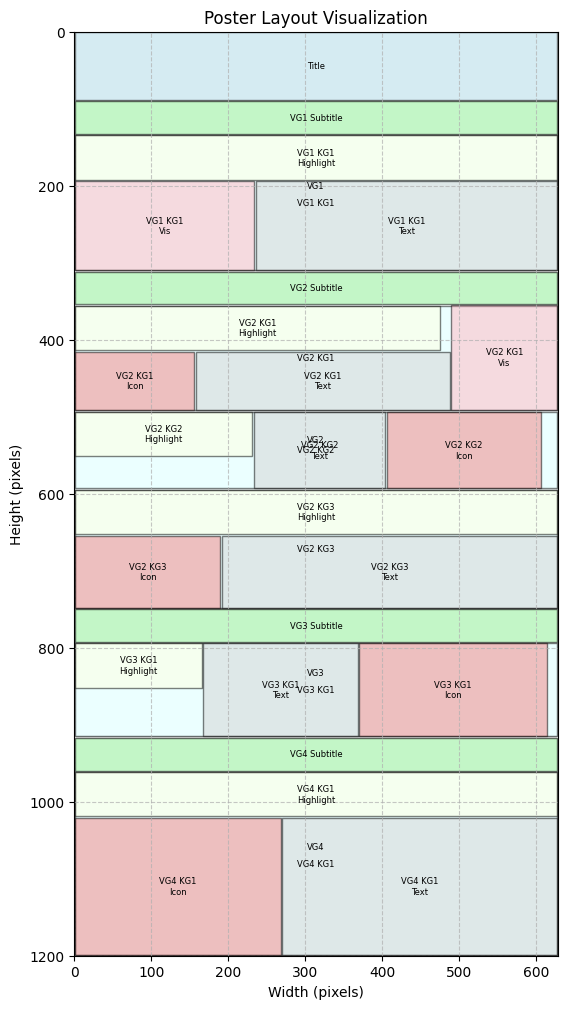

In [192]:
# Visualize the layout
W, H = 628.0, 1200.0
visualize_poster_layout(layout, W, H)

## landscape

In [ ]:
# from math import sqrt

# def layout_poster(valentine_data, W, H, margin=0, vertical_margin=0):
#     """
#     Lays out a poster with title and VGs stacked horizontally from left to right,
#     with KGs stacked vertically within each VG.
    
#     Args:
#         valentine_data: Dictionary containing "data" with VGs, each having "knowledges".
#         W: Poster width (float).
#         H: Poster height (float).
#         margin: Horizontal margin for KGs in VGs with multiple KGs (float, default=0).
#         vertical_margin: Vertical spacing between KGs (float, default=0).
    
#     Returns:
#         Dictionary mapping element keys to their coordinates (as lists of [x, y] points).
#         Excludes Text coordinates.
#     """
#     # Character width-to-height ratios
#     def calculate_text_width(string, font_height):
#         ratios = {
#             'B': 0.5, 'E': 0.5, 'F': 0.5, 'J': 0.5, 'L': 0.5, 'P': 0.5, 'S': 0.5,
#             'A': 0.8889, 'D': 0.8889, 'H': 0.8889, 'K': 0.8889, 'N': 0.8889,
#             'R': 0.8889, 'T': 0.8889, 'U': 0.8889, 'V': 0.8889, 'X': 0.8889,
#             'Y': 0.8889, 'Z': 0.8889, 'C': 1.0, 'G': 1.0, 'O': 1.0, 'Q': 1.0,
#             'M': 1.1111, 'W': 1.1111, 'b': 0.5, 'd': 0.5, 'f': 0.5, 'h': 0.5,
#             'k': 0.5, 'l': 0.5, 't': 0.5, 'c': 1.0, 'e': 1.0, 'o': 1.0, 's': 1.0,
#             'a': 0.7, 'g': 0.7, 'n': 0.7, 'p': 0.7, 'q': 0.7, 'r': 0.7, 'u': 0.7,
#             'v': 0.7, 'w': 0.7, 'x': 0.7, 'y': 0.7, 'z': 0.7, ' ': 0.4
#         }
#         return sum(ratios.get(char, 0.7) * font_height for char in string)

#     ### BEGIN ADDED CODE ###
#     # Helper function to calculate area of a rectangle
#     def calculate_area(x1, y1, x2, y2):
#         return (x2 - x1) * (y2 - y1)
#     ### END ADDED CODE ###

#     VGs = valentine_data["data"]

#     # Calculate coefficients for the quadratic equation b x^2 + a x + c = 0
#     a = 3.0 * W  # From title height 3x
#     c = - H * W  # Total available area term
#     b = 0.0      # Area coefficient

#     for VG in VGs:
#         knowledges = VG["knowledges"]
#         for KG in knowledges:
#             text = KG["knowledge_content"]
#             highlight = KG["first_level_highlight"]
#             n_images = (1 if (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None ) else 0) + (1 if KG["visualization"]["is_visualization"] else 0)
#             s_text = calculate_text_width(text, 1.0)
#             s_highlight = calculate_text_width(highlight, 1.0)
#             b += s_text + 4 * s_highlight + s_text * n_images

#     # Solve the quadratic equation b x^2 + a x + c = 0
#     discriminant = a**2 - 4 * b * c
#     if discriminant < 0:
#         raise ValueError("No solution for font size x")
#     x = (-a + sqrt(discriminant)) / (2 * b) if b != 0 else -c / a
#     if x <= 0:
#         raise ValueError("Invalid font size x")

#     # Calculate available height and VG areas
#     h_title = 3.0 * x
#     h_remain = H - h_title
    
#     # Calculate total area A_VG for each VG
#     A_VGs = []
#     for VG in VGs:
#         knowledges = VG["knowledges"]
#         A_VG = 0.0
#         for KG in knowledges:
#             text = KG["knowledge_content"]
#             highlight = KG["first_level_highlight"]
#             has_icon = (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None )
#             has_vis = KG["visualization"]["is_visualization"]
#             A_text = x * calculate_text_width(text, x)
#             A_highlight = 2.0 * x * calculate_text_width(highlight, 2.0 * x)
#             A_icon = x * calculate_text_width(text, x) if has_icon else 0.0
#             A_vis = x * calculate_text_width(text, x) if has_vis else 0.0
#             A_KG = A_text + A_highlight + A_icon + A_vis
#             A_VG += A_KG
#         A_VGs.append(A_VG)
    
#     # Calculate ideal widths for each VG
#     w_VG_ideals = []
#     for i, VG in enumerate(VGs):
#         n_KG = len(VG["knowledges"])
#         if n_KG == 1:
#             denominator = h_remain - 1.5 * x
#         else:
#             denominator = h_remain - 1.5 * x - (n_KG - 1) * vertical_margin
#         w_VG_ideal = A_VGs[i] / denominator if denominator > 0 else 0.0
#         w_VG_ideals.append(w_VG_ideal)
    
#     # Scale widths to fit total width W
#     W_ideal = sum(w_VG_ideals)
#     scaling_factor = W / W_ideal if W_ideal > 0 else 1.0
#     w_VGs = [w * scaling_factor for w in w_VG_ideals]
    
#     # Calculate x-positions for each VG
#     x_VGs = [0.0]
#     for w in w_VGs[:-1]:
#         x_VGs.append(x_VGs[-1] + w)
    
#     # Layout the poster
#     layout = {}
#     layout["Title"] = [[0.0, 0.0], [W, 0.0], [0.0, h_title], [W, h_title]]
    
#     for i, VG in enumerate(VGs, 1):
#         x_VG = x_VGs[i-1]
#         w_VG = w_VGs[i-1]
#         knowledges = VG["knowledges"]
#         n_KG = len(knowledges)
        
#         VG_key = f"VG{i}"
#         layout[VG_key] = {}
        
#         # Subtitle
#         y = h_title
#         layout[VG_key]["Subtitle"] = [[x_VG, y], [x_VG + w_VG, y], [x_VG, y + 1.5 * x], [x_VG + w_VG, y + 1.5 * x]]
#         y += 1.5 * x
#         if n_KG > 1:
#             y += vertical_margin
        
#         for j, KG in enumerate(knowledges, 1):
#             # Determine KG width and x-position
#             if n_KG == 1:
#                 kg_x = x_VG
#                 kg_width = w_VG
#             else:
#                 kg_x = x_VG + margin
#                 kg_width = w_VG - 2 * margin
            
#             text = KG["knowledge_content"]
#             highlight = KG["first_level_highlight"]
#             has_icon = (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None )
#             has_vis = KG["visualization"]["is_visualization"]
            
#             # Calculate areas
#             A_text = x * calculate_text_width(text, x)
#             A_highlight = 2.0 * x * calculate_text_width(highlight, 2.0 * x)
#             A_icon = x * calculate_text_width(text, x) if has_icon else 0.0
#             A_vis = x * calculate_text_width(text, x) if has_vis else 0.0
#             A_KG = A_text + A_highlight + A_icon + A_vis
#             h_KG = A_KG / kg_width if kg_width > 0 else 0.0
            
#             KG_key = f"KG{j}"
#             layout[VG_key][KG_key] = {}
#             layout[VG_key][KG_key]["coords"] = [
#                 [kg_x, y], [kg_x + kg_width, y],
#                 [kg_x, y + h_KG], [kg_x + kg_width, y + h_KG]
#             ]
            
#             # Internal KG layout (unchanged from original)
#             y_KG = y
#             h_highlight = 2.0 * x
#             w_highlight = min(calculate_text_width(highlight, 2.0 * x), kg_width)
#             layout[VG_key][KG_key]["Highlight"] = [
#                 [kg_x, y_KG], [kg_x + w_highlight, y_KG],
#                 [kg_x, y_KG + h_highlight], [kg_x + w_highlight, y_KG + h_highlight]
#             ]
#             layout[VG_key][KG_key]["Icon"] = None
#             layout[VG_key][KG_key]["Vis"] = None

#             # Image placement logic (copied verbatim from original code)
#             aspect_ratios = [
#                 1.0, 1.333, 0.75, 1.5, 0.667, 1.777, 0.562, 0.5, 2.0,
#                 1.4, 0.714, 0.8, 1.25, 0.6, 1.667
#             ]

#             def try_placement_a(r, A_img):
#                 w_img = sqrt(A_img * r)
#                 h_img = sqrt(A_img / r)
#                 x1 = kg_x + kg_width - w_img
#                 y1 = y_KG
#                 x2 = kg_x + kg_width
#                 y2 = y_KG + h_img
#                 coords = [[x1, y1], [x2, y1], [x1, y2], [x2, y2]]
#                 overflow_area = 0
#                 if y2 > y_KG + h_KG:
#                     overflow_area += (y2 - (y_KG + h_KG)) * w_img
#                 if x1 < kg_x + w_highlight:
#                     overlap_area = (min(x2, kg_x + w_highlight) - x1) * h_img if x2 > kg_x + w_highlight else w_img * h_img
#                     overflow_area += overlap_area
#                 return True if overflow_area == 0 else False, coords, overflow_area

#             def try_placement_b(r, A_img):
#                 w_img = sqrt(A_img * r)
#                 h_img = sqrt(A_img / r)
#                 x1 = kg_x
#                 y1 = y_KG + h_highlight
#                 x2 = kg_x + w_img
#                 y2 = y_KG + h_highlight + h_img
#                 coords = [[x1, y1], [x2, y1], [x1, y2], [x2, y2]]
#                 overflow_area = 0
#                 if y2 > y_KG + h_KG:
#                     overflow_area += (y2 - (y_KG + h_KG)) * w_img
#                 if x2 > kg_x + kg_width:
#                     overflow_area += (x2 - (kg_x + kg_width)) * h_img
#                 return True if overflow_area == 0 else False, coords, overflow_area

#             def try_combination_1(r_a, r_b):
#                 w_a = sqrt(A_icon * r_a)
#                 h_a = sqrt(A_icon / r_a)
#                 w_b = sqrt(A_vis * r_b)
#                 h_b = sqrt(A_vis / r_b)
#                 x1_a = kg_x + kg_width - w_a
#                 y1_a = y_KG
#                 x2_a = kg_x + kg_width
#                 y2_a = y_KG + h_a
#                 coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
#                 x1_b = kg_x + kg_width - w_a - w_b
#                 y1_b = y_KG
#                 x2_b = kg_x + kg_width - w_a
#                 y2_b = y_KG + h_b
#                 coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
#                 overflow_area = 0
#                 if y2_a > y_KG + h_KG:
#                     overflow_area += (y2_a - (y_KG + h_KG)) * w_a
#                 if y2_b > y_KG + h_KG:
#                     overflow_area += (y2_b - (y_KG + h_KG)) * w_b
#                 if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
#                     overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
#                     overflow_area += overlap_area
#                 if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
#                     overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight)
#                     overflow_area += overlap_area
#                 return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

#             def try_combination_2(r_a, r_b):
#                 w_a = sqrt(A_icon * r_a)
#                 h_a = sqrt(A_icon / r_a)
#                 w_b = sqrt(A_vis * r_b)
#                 h_b = sqrt(A_vis / r_b)
#                 x1_a = kg_x + kg_width - w_a
#                 y1_a = y_KG
#                 x2_a = kg_x + kg_width
#                 y2_a = y_KG + h_a
#                 coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
#                 x1_b = kg_x
#                 y1_b = y_KG + h_highlight
#                 x2_b = kg_x + w_b
#                 y2_b = y_KG + h_highlight + h_b
#                 coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
#                 overflow_area = 0
#                 if y2_a > y_KG + h_KG:
#                     overflow_area += (y2_a - (y_KG + h_KG)) * w_a
#                 if y2_b > y_KG + h_KG:
#                     overflow_area += (y2_b - (y_KG + h_KG)) * w_b
#                 if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
#                     overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
#                     overflow_area += overlap_area
#                 if x2_b > kg_x + kg_width:
#                     overflow_area += (x2_b - (kg_x + kg_width)) * h_b
#                 return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

#             def try_combination_3(r_a, r_b):
#                 w_a = sqrt(A_icon * r_a)
#                 h_a = sqrt(A_icon / r_a)
#                 w_b = sqrt(A_vis * r_b)
#                 h_b = sqrt(A_vis / r_b)
#                 x1_a = kg_x + kg_width - w_a
#                 y1_a = y_KG
#                 x2_a = kg_x + kg_width
#                 y2_a = y_KG + h_a
#                 coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
#                 x1_b = kg_x + kg_width - w_b
#                 y1_b = y_KG + h_a
#                 x2_b = kg_x + kg_width
#                 y2_b = y_KG + h_a + h_b
#                 coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
#                 overflow_area = 0
#                 if y2_a > y_KG + h_KG:
#                     overflow_area += (y2_a - (y_KG + h_KG)) * w_a
#                 if y2_b > y_KG + h_KG:
#                     overflow_area += (y2_b - (y_KG + h_KG)) * w_b
#                 if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
#                     overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
#                     overflow_area += overlap_area
#                 if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
#                     overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight - (y1_b - y_KG)) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight - (y1_b - y_KG))
#                     overflow_area += overlap_area
#                 return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

#             def try_combination_4(r_a, r_b):
#                 w_a = sqrt(A_icon * r_a)
#                 h_a = sqrt(A_icon / r_a)
#                 w_b = sqrt(A_vis * r_b)
#                 h_b = sqrt(A_vis / r_b)
#                 x1_a = kg_x
#                 y1_a = y_KG + h_highlight
#                 x2_a = kg_x + w_a
#                 y2_a = y_KG + h_highlight + h_a
#                 coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
#                 x1_b = kg_x + kg_width - w_b
#                 y1_b = y_KG + h_KG - h_b
#                 x2_b = kg_x + kg_width
#                 y2_b = y_KG + h_KG
#                 coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
#                 overflow_area = 0
#                 if y2_a > y_KG + h_KG:
#                     overflow_area += (y2_a - (y_KG + h_KG)) * w_a
#                 if x2_a > kg_x + kg_width:
#                     overflow_area += (x2_a - (kg_x + kg_width)) * h_a
#                 if y2_b > y_KG + h_KG:  # Shouldn't happen due to bottom alignment, but added for consistency
#                     overflow_area += (y2_b - (y_KG + h_KG)) * w_b
#                 if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
#                     overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight - (y1_b - y_KG)) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight - (y1_b - y_KG))
#                     overflow_area += overlap_area
#                 return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

#             if has_icon and has_vis:
#                 min_overflow = float('inf')
#                 best_layout = None
#                 combination_funcs = [try_combination_1, try_combination_2, try_combination_3, try_combination_4]
#                 for idx, comb in enumerate(combination_funcs):
#                     for r_a in aspect_ratios:
#                         for r_b in aspect_ratios:
#                             fit, coords_a, coords_b, overflow = comb(r_a, r_b)
#                             # print('overflow:', overflow)
#                             # print('layout:', (coords_a, coords_b, r_a, r_b, idx))
#                             if fit:
#                                 layout[VG_key][KG_key]["Icon"] = coords_a
#                                 layout[VG_key][KG_key]["Vis"] = coords_b
#                                 min_overflow = 0
#                                 break
#                             if overflow < min_overflow:
#                                 min_overflow = overflow
#                                 best_layout = (coords_a, coords_b, r_a, r_b, idx)
#                                 # print('overflow:', overflow)
#                                 # print('best_layout:', best_layout)
#                         if min_overflow == 0:
#                             break
#                     if min_overflow == 0:
#                         break
#                 if min_overflow > 0:
#                     coords_a, coords_b, r_a, r_b, comb_idx = best_layout
#                     w_a = sqrt(A_icon * r_a)
#                     h_a = sqrt(A_icon / r_a)
#                     x1_a, y1_a = coords_a[0]
#                     x2_a, y2_a = coords_a[3]
#                     w_b = sqrt(A_vis * r_b)
#                     h_b = sqrt(A_vis / r_b)
#                     x1_b, y1_b = coords_b[0]
#                     x2_b, y2_b = coords_b[3]
#                     print(coords_a)
#                     print(coords_b)
#                     print(comb_idx)
#                     if comb_idx == 0:
#                         if x1_a < kg_x + w_highlight:
#                             w_a = kg_width - (kg_x + w_highlight - x1_a)
#                         if y2_a > y_KG + h_KG:
#                             h_a = h_KG - (y1_a - y_KG)
#                         w_a_new = min(w_a, h_a * r_a)
#                         h_a_new = w_a_new / r_a
#                         coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
#                         if x1_b < kg_x + w_highlight:
#                             w_b = kg_width - (kg_x + w_highlight - x1_b)
#                         if y2_b > y_KG + h_KG:
#                             h_b = h_KG - (y1_b - y_KG)
#                         w_b_new = min(w_b, h_b * r_b)
#                         h_b_new = w_b_new / r_b
#                         coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
#                     elif comb_idx == 1:
#                         if x1_a < kg_x + w_highlight:
#                             w_a = kg_width - (kg_x + w_highlight - x1_a)
#                         if y2_a > y_KG + h_KG:
#                             h_a = h_KG - (y1_a - y_KG)
#                         w_a_new = min(w_a, h_a * r_a)
#                         h_a_new = w_a_new / r_a
#                         coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
#                         if x2_b > kg_x + kg_width:
#                             w_b = kg_width - (x1_b - kg_x)
#                         if y2_b > y_KG + h_KG:
#                             h_b = h_KG - (y1_b - y_KG)
#                         if x2_b > x1_a + w_a_new:
#                             w_b = min(w_b, x1_a + w_a_new - x1_b)
#                         w_b_new = min(w_b, h_b * r_b)
#                         h_b_new = w_b_new / r_b
#                         coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
#                     elif comb_idx == 2:
#                         if x1_a < kg_x + w_highlight:
#                             w_a = kg_width - (kg_x + w_highlight - x1_a)
#                         if y2_a > y_KG + h_KG:
#                             h_a = h_KG - (y1_a - y_KG)
#                         w_a_new = min(w_a, h_a * r_a)
#                         h_a_new = w_a_new / r_a
#                         coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
#                         if x1_b < kg_x + w_highlight:
#                             w_b = kg_width - (kg_x + w_highlight - x1_b)
#                         if y2_b > y_KG + h_KG:
#                             h_b = h_KG - (y1_b - y_KG)
#                         w_b_new = min(w_b, h_b * r_b)
#                         h_b_new = w_b_new / r_b
#                         coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
#                     elif comb_idx == 3:
#                         # Image A: Adjust for right and bottom overflow
#                         if x2_a > kg_x + kg_width:
#                             w_a = kg_width - (x1_a - kg_x)  # w_a = kg_width since x1_a = kg_x
#                         if y2_a > y_KG + h_KG:
#                             h_a = h_KG - (y1_a - y_KG)     # h_a = h_KG - h_highlight since y1_a = y_KG + h_highlight
#                         w_a_new = min(w_a, h_a * r_a)
#                         h_a_new = w_a_new / r_a
#                         coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
                        
#                         # Image B: Adjust for left, top, and highlight overlap, anchored at (x2_b, y2_b)
#                         if x1_b < kg_x:  # Left boundary overflow
#                             w_b = kg_width
#                         if y1_b < y_KG:  # Top boundary overflow
#                             h_b = h_KG
#                         if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:  # Highlight overlap
#                             ratio_x = (kg_width - w_highlight) / w_b  # Ratio to make x1_b = kg_x + w_highlight
#                             ratio_y = (h_KG - h_highlight) / h_b      # Ratio to make y1_b = y_KG + h_highlight
#                             scale = max(ratio_x, ratio_y)             # Use the smaller ratio to satisfy both
#                             w_b_new = w_b * scale
#                             h_b_new = h_b * scale
#                         else:
#                             w_b_new = w_b
#                             h_b_new = h_b
#                         # Recalculate coordinates with anchor at (x2_b, y2_b)
#                         x1_b_new = x2_b - w_b_new
#                         y1_b_new = y2_b - h_b_new
#                         coords_b = [[x1_b_new, y1_b_new], [x2_b, y1_b_new], [x1_b_new, y2_b], [x2_b, y2_b]]
#                     layout[VG_key][KG_key]["Icon"] = coords_a
#                     layout[VG_key][KG_key]["Vis"] = coords_b

#             elif has_icon:
#                 min_overflow = float('inf')
#                 best_layout = None
#                 placement_funcs = [try_placement_a, try_placement_b]
#                 for idx, placement in enumerate(placement_funcs):
#                     for r in aspect_ratios:
#                         fit, coords, overflow = placement(r, A_icon)
#                         if fit:
#                             layout[VG_key][KG_key]["Icon"] = coords
#                             min_overflow = 0
#                             break
#                         if overflow < min_overflow:
#                             min_overflow = overflow
#                             best_layout = (coords, r, idx)
#                     if min_overflow == 0:
#                         break
#                 if min_overflow > 0:
#                     coords, r, placement_idx = best_layout
#                     w_img = sqrt(A_icon * r)
#                     h_img = sqrt(A_icon / r)
#                     x1, y1 = coords[0]
#                     x2, y2 = coords[3]
#                     if placement_idx == 0:
#                         if x1 < kg_x + w_highlight:
#                             w_img = kg_width - (kg_x + w_highlight - x1)
#                         if y2 > y_KG + h_KG:
#                             h_img = h_KG - (y1 - y_KG)
#                     elif placement_idx == 1:
#                         if x2 > kg_x + kg_width:
#                             w_img = kg_width - (x1 - kg_x)
#                         if y2 > y_KG + h_KG:
#                             h_img = h_KG - (y1 - y_KG)
#                     w_img_new = min(w_img, h_img * r)
#                     h_img_new = w_img_new / r
#                     layout[VG_key][KG_key]["Icon"] = [
#                         [x1, y1], [x1 + w_img_new, y1],
#                         [x1, y1 + h_img_new], [x1 + w_img_new, y1 + h_img_new]
#                     ]

#             elif has_vis:
#                 min_overflow = float('inf')
#                 best_layout = None
#                 placement_funcs = [try_placement_a, try_placement_b]
#                 for idx, placement in enumerate(placement_funcs):
#                     for r in aspect_ratios:
#                         fit, coords, overflow = placement(r, A_vis)
#                         if fit:
#                             layout[VG_key][KG_key]["Vis"] = coords
#                             min_overflow = 0
#                             break
#                         if overflow < min_overflow:
#                             min_overflow = overflow
#                             best_layout = (coords, r, idx)
#                     if min_overflow == 0:
#                         break
#                 if min_overflow > 0:
#                     coords, r, placement_idx = best_layout
#                     w_img = sqrt(A_vis * r)
#                     h_img = sqrt(A_vis / r)
#                     x1, y1 = coords[0]
#                     x2, y2 = coords[3]
#                     if placement_idx == 0:
#                         if x1 < kg_x + w_highlight:
#                             w_img = kg_width - (kg_x + w_highlight - x1)
#                         if y2 > y_KG + h_KG:
#                             h_img = h_KG - (y1 - y_KG)
#                     elif placement_idx == 1:
#                         if x2 > kg_x + kg_width:
#                             w_img = kg_width - (x1 - kg_x)
#                         if y2 > y_KG + h_KG:
#                             h_img = h_KG - (y1 - y_KG)
#                     w_img_new = min(w_img, h_img * r)
#                     h_img_new = w_img_new / r
#                     layout[VG_key][KG_key]["Vis"] = [
#                         [x1, y1], [x1 + w_img_new, y1],
#                         [x1, y1 + h_img_new], [x1 + w_img_new, y1 + h_img_new]
#                     ]
            
#             y += h_KG
#             if j < n_KG:
#                 y += vertical_margin
        
#         # Set VG coordinates to span from h_title to H
#         layout[VG_key]["coords"] = [
#             [x_VG, h_title], [x_VG + w_VG, h_title],
#             [x_VG, H], [x_VG + w_VG, H]
#         ]
    
#     return layout

# # Test code remains the same
# W, H = 628.0, 1200.0
# layout = layout_poster(valentine_data, W, H)
# layout

{'Title': [[0.0, 0.0],
  [628.0, 0.0],
  [0.0, 96.97167900015288],
  [628.0, 96.97167900015288]],
 'VG1': {'Subtitle': [[0.0, 96.97167900015288],
   [118.97351615695125, 96.97167900015288],
   [0.0, 145.4575185002293],
   [118.97351615695125, 145.4575185002293]],
  'KG1': {'coords': [[0.0, 145.4575185002293],
    [118.97351615695125, 145.4575185002293],
    [0.0, 1248.4858395000767],
    [118.97351615695125, 1248.4858395000767]],
   'Highlight': [[0.0, 145.4575185002293],
    [118.97351615695125, 145.4575185002293],
    [0.0, 210.10530450033121],
    [118.97351615695125, 210.10530450033121]],
   'Icon': None,
   'Vis': [[0.0, 210.10530450033121],
    [118.97351615695125, 210.10530450033121],
    [0.0, 448.05233681423374],
    [118.97351615695125, 448.05233681423374]]},
  'coords': [[0.0, 96.97167900015288],
   [118.97351615695125, 96.97167900015288],
   [0.0, 1200.0],
   [118.97351615695125, 1200.0]]},
 'VG2': {'Subtitle': [[118.97351615695125, 96.97167900015288],
   [384.2010999463330

In [254]:
from math import sqrt

def layout_poster(valentine_data, W, H, margin=0, vertical_margin=0):
    """
    Lays out a poster with title and VGs stacked horizontally from left to right,
    with KGs stacked vertically within each VG.
    
    Args:
        valentine_data: Dictionary containing "data" with VGs, each having "knowledges".
        W: Poster width (float).
        H: Poster height (float).
        margin: Horizontal margin for KGs in VGs with multiple KGs (float, default=0).
        vertical_margin: Vertical spacing between KGs (float, default=0).
    
    Returns:
        Dictionary mapping element keys to their coordinates (as lists of [x, y] points).
        Now includes Text coordinates for each KG.
    """
    # Character width-to-height ratios
    def calculate_text_width(string, font_height):
        ratios = {
            'B': 0.5, 'E': 0.5, 'F': 0.5, 'J': 0.5, 'L': 0.5, 'P': 0.5, 'S': 0.5,
            'A': 0.8889, 'D': 0.8889, 'H': 0.8889, 'K': 0.8889, 'N': 0.8889,
            'R': 0.8889, 'T': 0.8889, 'U': 0.8889, 'V': 0.8889, 'X': 0.8889,
            'Y': 0.8889, 'Z': 0.8889, 'C': 1.0, 'G': 1.0, 'O': 1.0, 'Q': 1.0,
            'M': 1.1111, 'W': 1.1111, 'b': 0.5, 'd': 0.5, 'f': 0.5, 'h': 0.5,
            'k': 0.5, 'l': 0.5, 't': 0.5, 'c': 1.0, 'e': 1.0, 'o': 1.0, 's': 1.0,
            'a': 0.7, 'g': 0.7, 'n': 0.7, 'p': 0.7, 'q': 0.7, 'r': 0.7, 'u': 0.7,
            'v': 0.7, 'w': 0.7, 'x': 0.7, 'y': 0.7, 'z': 0.7, ' ': 0.4
        }
        return sum(ratios.get(char, 0.7) * font_height for char in string)

    # Helper function to calculate area of a rectangle
    def calculate_area(x1, y1, x2, y2):
        return (x2 - x1) * (y2 - y1)

    VGs = valentine_data["data"]

    # Calculate coefficients for the quadratic equation b x^2 + a x + c = 0
    a = 3.0 * W  # From title height 3x
    c = - H * W  # Total available area term
    b = 0.0      # Area coefficient

    for VG in VGs:
        knowledges = VG["knowledges"]
        for KG in knowledges:
            text = KG["knowledge_content"]
            highlight = KG["first_level_highlight"]
            n_images = (1 if (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None ) else 0) + (1 if KG["visualization"]["is_visualization"] else 0)
            s_text = calculate_text_width(text, 1.0)
            s_highlight = calculate_text_width(highlight, 1.0)
            b += s_text + 4 * s_highlight + s_text * n_images

    # Solve the quadratic equation b x^2 + a x + c = 0
    discriminant = a**2 - 4 * b * c
    if discriminant < 0:
        raise ValueError("No solution for font size x")
    x = (-a + sqrt(discriminant)) / (2 * b) if b != 0 else -c / a
    if x <= 0:
        raise ValueError("Invalid font size x")

    # Calculate available height and VG areas
    h_title = 3.0 * x
    h_remain = H - h_title
    
    # Calculate total area A_VG for each VG
    A_VGs = []
    for VG in VGs:
        knowledges = VG["knowledges"]
        A_VG = 0.0
        for KG in knowledges:
            text = KG["knowledge_content"]
            highlight = KG["first_level_highlight"]
            has_icon = (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None )
            has_vis = KG["visualization"]["is_visualization"]
            A_text = x * calculate_text_width(text, x)
            A_highlight = 2.0 * x * calculate_text_width(highlight, 2.0 * x)
            A_icon = x * calculate_text_width(text, x) if has_icon else 0.0
            A_vis = x * calculate_text_width(text, x) if has_vis else 0.0
            A_KG = A_text + A_highlight + A_icon + A_vis
            A_VG += A_KG
        A_VGs.append(A_VG)
    
    # Calculate ideal widths for each VG
    w_VG_ideals = []
    for i, VG in enumerate(VGs):
        n_KG = len(VG["knowledges"])
        if n_KG == 1:
            denominator = h_remain - 1.5 * x
        else:
            denominator = h_remain - 1.5 * x - (n_KG - 1) * vertical_margin
        w_VG_ideal = A_VGs[i] / denominator if denominator > 0 else 0.0
        w_VG_ideals.append(w_VG_ideal)
    
    # Scale widths to fit total width W
    W_ideal = sum(w_VG_ideals)
    scaling_factor = W / W_ideal if W_ideal > 0 else 1.0
    w_VGs = [w * scaling_factor for w in w_VG_ideals]
    
    # Calculate x-positions for each VG
    x_VGs = [0.0]
    for w in w_VGs[:-1]:
        x_VGs.append(x_VGs[-1] + w)
    
    # Layout the poster
    layout = {}
    layout["Title"] = [[0.0, 0.0], [W, 0.0], [0.0, h_title], [W, h_title]]
    
    for i, VG in enumerate(VGs, 1):
        x_VG = x_VGs[i-1]
        w_VG = w_VGs[i-1]
        knowledges = VG["knowledges"]
        n_KG = len(knowledges)
        
        VG_key = f"VG{i}"
        layout[VG_key] = {}
        
        # Subtitle
        y = h_title
        layout[VG_key]["Subtitle"] = [[x_VG, y], [x_VG + w_VG, y], [x_VG, y + 1.5 * x], [x_VG + w_VG, y + 1.5 * x]]
        y += 1.5 * x
        if n_KG > 1:
            y += vertical_margin
        
        for j, KG in enumerate(knowledges, 1):
            # Determine KG width and x-position
            if n_KG == 1:
                kg_x = x_VG
                kg_width = w_VG
            else:
                kg_x = x_VG + margin
                kg_width = w_VG - 2 * margin
            
            text = KG["knowledge_content"]
            highlight = KG["first_level_highlight"]
            has_icon = (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None )
            has_vis = KG["visualization"]["is_visualization"]
            
            # Calculate areas
            A_text = x * calculate_text_width(text, x)
            A_highlight = 2.0 * x * calculate_text_width(highlight, 2.0 * x)
            A_icon = x * calculate_text_width(text, x) if has_icon else 0.0
            A_vis = x * calculate_text_width(text, x) if has_vis else 0.0
            A_KG = A_text + A_highlight + A_icon + A_vis
            h_KG = A_KG / kg_width if kg_width > 0 else 0.0
            
            KG_key = f"KG{j}"
            layout[VG_key][KG_key] = {}
            layout[VG_key][KG_key]["coords"] = [
                [kg_x, y], [kg_x + kg_width, y],
                [kg_x, y + h_KG], [kg_x + kg_width, y + h_KG]
            ]
            
            # Internal KG layout
            y_KG = y
            h_highlight = 2.0 * x
            w_highlight = min(calculate_text_width(highlight, 2.0 * x), kg_width)
            layout[VG_key][KG_key]["Highlight"] = [
                [kg_x, y_KG], [kg_x + w_highlight, y_KG],
                [kg_x, y_KG + h_highlight], [kg_x + w_highlight, y_KG + h_highlight]
            ]
            layout[VG_key][KG_key]["Icon"] = None
            layout[VG_key][KG_key]["Vis"] = None
            # Added: Initialize placement_type
            layout[VG_key][KG_key]["placement_type"] = "none"

            # Image placement logic
            aspect_ratios = [
                1.0, 1.333, 0.75, 1.5, 0.667, 1.777, 0.562, 0.5, 2.0,
                1.4, 0.714, 0.8, 1.25, 0.6, 1.667
            ]

            def try_placement_a(r, A_img):
                w_img = sqrt(A_img * r)
                h_img = sqrt(A_img / r)
                x1 = kg_x + kg_width - w_img
                y1 = y_KG
                x2 = kg_x + kg_width
                y2 = y_KG + h_img
                coords = [[x1, y1], [x2, y1], [x1, y2], [x2, y2]]
                overflow_area = 0
                if y2 > y_KG + h_KG:
                    overflow_area += (y2 - (y_KG + h_KG)) * w_img
                if x1 < kg_x + w_highlight:
                    overlap_area = (min(x2, kg_x + w_highlight) - x1) * h_img if x2 > kg_x + w_highlight else w_img * h_img
                    overflow_area += overlap_area
                return True if overflow_area == 0 else False, coords, overflow_area

            def try_placement_b(r, A_img):
                w_img = sqrt(A_img * r)
                h_img = sqrt(A_img / r)
                x1 = kg_x
                y1 = y_KG + h_highlight
                x2 = kg_x + w_img
                y2 = y_KG + h_highlight + h_img
                coords = [[x1, y1], [x2, y1], [x1, y2], [x2, y2]]
                overflow_area = 0
                if y2 > y_KG + h_KG:
                    overflow_area += (y2 - (y_KG + h_KG)) * w_img
                if x2 > kg_x + kg_width:
                    overflow_area += (x2 - (kg_x + kg_width)) * h_img
                return True if overflow_area == 0 else False, coords, overflow_area

            def try_combination_1(r_a, r_b):
                w_a = sqrt(A_icon * r_a)
                h_a = sqrt(A_icon / r_a)
                w_b = sqrt(A_vis * r_b)
                h_b = sqrt(A_vis / r_b)
                x1_a = kg_x + kg_width - w_a
                y1_a = y_KG
                x2_a = kg_x + kg_width
                y2_a = y_KG + h_a
                coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
                x1_b = kg_x + kg_width - w_a - w_b
                y1_b = y_KG
                x2_b = kg_x + kg_width - w_a
                y2_b = y_KG + h_b
                coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
                overflow_area = 0
                if y2_a > y_KG + h_KG:
                    overflow_area += (y2_a - (y_KG + h_KG)) * w_a
                if y2_b > y_KG + h_KG:
                    overflow_area += (y2_b - (y_KG + h_KG)) * w_b
                if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
                    overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
                    overflow_area += overlap_area
                if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
                    overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight)
                    overflow_area += overlap_area
                return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

            def try_combination_2(r_a, r_b):
                w_a = sqrt(A_icon * r_a)
                h_a = sqrt(A_icon / r_a)
                w_b = sqrt(A_vis * r_b)
                h_b = sqrt(A_vis / r_b)
                x1_a = kg_x + kg_width - w_a
                y1_a = y_KG
                x2_a = kg_x + kg_width
                y2_a = y_KG + h_a
                coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
                x1_b = kg_x
                y1_b = y_KG + h_highlight
                x2_b = kg_x + w_b
                y2_b = y_KG + h_highlight + h_b
                coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
                overflow_area = 0
                if y2_a > y_KG + h_KG:
                    overflow_area += (y2_a - (y_KG + h_KG)) * w_a
                if y2_b > y_KG + h_KG:
                    overflow_area += (y2_b - (y_KG + h_KG)) * w_b
                if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
                    overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
                    overflow_area += overlap_area
                if x2_b > kg_x + kg_width:
                    overflow_area += (x2_b - (kg_x + kg_width)) * h_b
                return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

            def try_combination_3(r_a, r_b):
                w_a = sqrt(A_icon * r_a)
                h_a = sqrt(A_icon / r_a)
                w_b = sqrt(A_vis * r_b)
                h_b = sqrt(A_vis / r_b)
                x1_a = kg_x + kg_width - w_a
                y1_a = y_KG
                x2_a = kg_x + kg_width
                y2_a = y_KG + h_a
                coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
                x1_b = kg_x + kg_width - w_b
                y1_b = y_KG + h_a
                x2_b = kg_x + kg_width
                y2_b = y_KG + h_a + h_b
                coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
                overflow_area = 0
                if y2_a > y_KG + h_KG:
                    overflow_area += (y2_a - (y_KG + h_KG)) * w_a
                if y2_b > y_KG + h_KG:
                    overflow_area += (y2_b - (y_KG + h_KG)) * w_b
                if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
                    overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
                    overflow_area += overlap_area
                if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
                    overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight - (y1_b - y_KG)) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight - (y1_b - y_KG))
                    overflow_area += overlap_area
                return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

            def try_combination_4(r_a, r_b):
                w_a = sqrt(A_icon * r_a)
                h_a = sqrt(A_icon / r_a)
                w_b = sqrt(A_vis * r_b)
                h_b = sqrt(A_vis / r_b)
                x1_a = kg_x
                y1_a = y_KG + h_highlight
                x2_a = kg_x + w_a
                y2_a = y_KG + h_highlight + h_a
                coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
                x1_b = kg_x + kg_width - w_b
                y1_b = y_KG + h_KG - h_b
                x2_b = kg_x + kg_width
                y2_b = y_KG + h_KG
                coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
                overflow_area = 0
                if y2_a > y_KG + h_KG:
                    overflow_area += (y2_a - (y_KG + h_KG)) * w_a
                if x2_a > kg_x + kg_width:
                    overflow_area += (x2_a - (kg_x + kg_width)) * h_a
                if y2_b > y_KG + h_KG:  # Shouldn't happen due to bottom alignment
                    overflow_area += (y2_b - (y_KG + h_KG)) * w_b
                if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
                    overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight - (y1_b - y_KG)) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight - (y1_b - y_KG))
                    overflow_area += overlap_area
                return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

            # Place images and set placement_type
            if has_icon and has_vis:
                min_overflow = float('inf')
                best_layout = None
                combination_funcs = [try_combination_1, try_combination_2, try_combination_3, try_combination_4]
                for idx, comb in enumerate(combination_funcs):
                    for r_a in aspect_ratios:
                        for r_b in aspect_ratios:
                            fit, coords_a, coords_b, overflow = comb(r_a, r_b)
                            if fit:
                                layout[VG_key][KG_key]["Icon"] = coords_a
                                layout[VG_key][KG_key]["Vis"] = coords_b
                                # Added: Set placement_type when fit is found
                                layout[VG_key][KG_key]["placement_type"] = f"comb{idx + 1}"
                                min_overflow = 0
                                break
                            if overflow < min_overflow:
                                min_overflow = overflow
                                best_layout = (coords_a, coords_b, r_a, r_b, idx)
                        if min_overflow == 0:
                            break
                    if min_overflow == 0:
                        break
                if min_overflow > 0:
                    coords_a, coords_b, r_a, r_b, comb_idx = best_layout
                    w_a = sqrt(A_icon * r_a)
                    h_a = sqrt(A_icon / r_a)
                    x1_a, y1_a = coords_a[0]
                    x2_a, y2_a = coords_a[3]
                    w_b = sqrt(A_vis * r_b)
                    h_b = sqrt(A_vis / r_b)
                    x1_b, y1_b = coords_b[0]
                    x2_b, y2_b = coords_b[3]
                    if comb_idx == 0:
                        if x1_a < kg_x + w_highlight:
                            w_a = kg_width - (kg_x + w_highlight - x1_a)
                        if y2_a > y_KG + h_KG:
                            h_a = h_KG - (y1_a - y_KG)
                        w_a_new = min(w_a, h_a * r_a)
                        h_a_new = w_a_new / r_a
                        coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
                        if x1_b < kg_x + w_highlight:
                            w_b = kg_width - (kg_x + w_highlight - x1_b)
                        if y2_b > y_KG + h_KG:
                            h_b = h_KG - (y1_b - y_KG)
                        w_b_new = min(w_b, h_b * r_b)
                        h_b_new = w_b_new / r_b
                        coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
                    elif comb_idx == 1:
                        if x1_a < kg_x + w_highlight:
                            w_a = kg_width - (kg_x + w_highlight - x1_a)
                        if y2_a > y_KG + h_KG:
                            h_a = h_KG - (y1_a - y_KG)
                        w_a_new = min(w_a, h_a * r_a)
                        h_a_new = w_a_new / r_a
                        coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
                        if x2_b > kg_x + kg_width:
                            w_b = kg_width - (x1_b - kg_x)
                        if y2_b > y_KG + h_KG:
                            h_b = h_KG - (y1_b - y_KG)
                        if x2_b > x1_a + w_a_new:
                            w_b = min(w_b, x1_a + w_a_new - x1_b)
                        w_b_new = min(w_b, h_b * r_b)
                        h_b_new = w_b_new / r_b
                        coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
                    elif comb_idx == 2:
                        if x1_a < kg_x + w_highlight:
                            w_a = kg_width - (kg_x + w_highlight - x1_a)
                        if y2_a > y_KG + h_KG:
                            h_a = h_KG - (y1_a - y_KG)
                        w_a_new = min(w_a, h_a * r_a)
                        h_a_new = w_a_new / r_a
                        coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
                        if x1_b < kg_x + w_highlight:
                            w_b = kg_width - (kg_x + w_highlight - x1_b)
                        if y2_b > y_KG + h_KG:
                            h_b = h_KG - (y1_b - y_KG)
                        w_b_new = min(w_b, h_b * r_b)
                        h_b_new = w_b_new / r_b
                        coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
                    elif comb_idx == 3:
                        if x2_a > kg_x + kg_width:
                            w_a = kg_width - (x1_a - kg_x)
                        if y2_a > y_KG + h_KG:
                            h_a = h_KG - (y1_a - y_KG)
                        w_a_new = min(w_a, h_a * r_a)
                        h_a_new = w_a_new / r_a
                        coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
                        if x1_b < kg_x + w_highlight:
                            w_b = kg_width - (kg_x + w_highlight - x1_b)
                        if y2_b > y_KG + h_KG:
                            h_b = h_KG - (y1_b - y_KG)
                        w_b_new = min(w_b, h_b * r_b)
                        h_b_new = w_b_new / r_b
                        coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
                    layout[VG_key][KG_key]["Icon"] = coords_a
                    layout[VG_key][KG_key]["Vis"] = coords_b
                    # Added: Set placement_type when adjusted
                    layout[VG_key][KG_key]["placement_type"] = f"comb{comb_idx + 1}"

            elif has_icon:
                min_overflow = float('inf')
                best_layout = None
                placement_funcs = [try_placement_a, try_placement_b]
                for idx, placement in enumerate(placement_funcs):
                    for r in aspect_ratios:
                        fit, coords, overflow = placement(r, A_icon)
                        if fit:
                            layout[VG_key][KG_key]["Icon"] = coords
                            # Added: Set placement_type when fit is found
                            layout[VG_key][KG_key]["placement_type"] = 'a' if idx == 0 else 'b'
                            min_overflow = 0
                            break
                        if overflow < min_overflow:
                            min_overflow = overflow
                            best_layout = (coords, r, idx)
                    if min_overflow == 0:
                        break
                if min_overflow > 0:
                    coords, r, placement_idx = best_layout
                    w_img = sqrt(A_icon * r)
                    h_img = sqrt(A_icon / r)
                    x1, y1 = coords[0]
                    x2, y2 = coords[3]
                    if placement_idx == 0:
                        if x1 < kg_x + w_highlight:
                            w_img = kg_width - (kg_x + w_highlight - x1)
                        if y2 > y_KG + h_KG:
                            h_img = h_KG - (y1 - y_KG)
                    elif placement_idx == 1:
                        if x2 > kg_x + kg_width:
                            w_img = kg_width - (x1 - kg_x)
                        if y2 > y_KG + h_KG:
                            h_img = h_KG - (y1 - y_KG)
                    w_img_new = min(w_img, h_img * r)
                    h_img_new = w_img_new / r
                    layout[VG_key][KG_key]["Icon"] = [
                        [x1, y1], [x1 + w_img_new, y1],
                        [x1, y1 + h_img_new], [x1 + w_img_new, y1 + h_img_new]
                    ]
                    # Added: Set placement_type when adjusted
                    layout[VG_key][KG_key]["placement_type"] = 'a' if placement_idx == 0 else 'b'

            elif has_vis:
                min_overflow = float('inf')
                best_layout = None
                placement_funcs = [try_placement_a, try_placement_b]
                for idx, placement in enumerate(placement_funcs):
                    for r in aspect_ratios:
                        fit, coords, overflow = placement(r, A_vis)
                        if fit:
                            layout[VG_key][KG_key]["Vis"] = coords
                            # Added: Set placement_type when fit is found
                            layout[VG_key][KG_key]["placement_type"] = 'a' if idx == 0 else 'b'
                            min_overflow = 0
                            break
                        if overflow < min_overflow:
                            min_overflow = overflow
                            best_layout = (coords, r, idx)
                    if min_overflow == 0:
                        break
                if min_overflow > 0:
                    coords, r, placement_idx = best_layout
                    w_img = sqrt(A_vis * r)
                    h_img = sqrt(A_vis / r)
                    x1, y1 = coords[0]
                    x2, y2 = coords[3]
                    if placement_idx == 0:
                        if x1 < kg_x + w_highlight:
                            w_img = kg_width - (kg_x + w_highlight - x1)
                        if y2 > y_KG + h_KG:
                            h_img = h_KG - (y1 - y_KG)
                    elif placement_idx == 1:
                        if x2 > kg_x + kg_width:
                            w_img = kg_width - (x1 - kg_x)
                        if y2 > y_KG + h_KG:
                            h_img = h_KG - (y1 - y_KG)
                    w_img_new = min(w_img, h_img * r)
                    h_img_new = w_img_new / r
                    layout[VG_key][KG_key]["Vis"] = [
                        [x1, y1], [x1 + w_img_new, y1],
                        [x1, y1 + h_img_new], [x1 + w_img_new, y1 + h_img_new]
                    ]
                    # Added: Set placement_type when adjusted
                    layout[VG_key][KG_key]["placement_type"] = 'a' if placement_idx == 0 else 'b'

            ### BEGIN ADDED CODE ###
            # Calculate text block based on placement type
            kg_coords = layout[VG_key][KG_key]["coords"]
            highlight_coords = layout[VG_key][KG_key]["Highlight"]
            icon_coords = layout[VG_key][KG_key]["Icon"]
            vis_coords = layout[VG_key][KG_key]["Vis"]
            placement_type = layout[VG_key][KG_key]["placement_type"]

            x1_KG, y1_KG = kg_coords[0]
            x2_KG, y2_KG = kg_coords[3]
            x1_highlight, y1_highlight = highlight_coords[0]
            x2_highlight, y2_highlight = highlight_coords[3]

            possible_blocks = []

            if placement_type == 'a':
                if icon_coords:
                    x1_img, y1_img = icon_coords[0]
                    x2_img, y2_img = icon_coords[3]
                elif vis_coords:
                    x1_img, y1_img = vis_coords[0]
                    x2_img, y2_img = vis_coords[3]
                if y2_highlight < y2_img:
                    possible_blocks = [
                        [(x1_KG, y2_img), (x2_KG, y2_KG)],
                        [(x1_KG, y2_highlight), (x1_img, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_img, y2_KG)]
                    ]
                else:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                        [(x2_highlight, y2_img), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_img, y2_KG)]
                    ]
            elif placement_type == 'b':
                if icon_coords:
                    x1_img, y1_img = icon_coords[0]
                    x2_img, y2_img = icon_coords[3]
                elif vis_coords:
                    x1_img, y1_img = vis_coords[0]
                    x2_img, y2_img = vis_coords[3]
                if x2_highlight < x2_img:
                    possible_blocks = [
                        [(x2_highlight, y1_KG), (x2_KG, y2_highlight)],
                        [(x2_img, y1_KG), (x2_KG, y2_KG)],
                        [(x1_KG, y2_img), (x2_KG, y2_KG)]
                    ]
                else:
                    possible_blocks = [
                        [(x2_highlight, y1_KG), (x2_KG, y2_KG)],
                        [(x2_img, y2_highlight), (x2_KG, y2_KG)],
                        [(x1_KG, y2_img), (x2_KG, y2_KG)]
                    ]
            elif placement_type == 'comb1':
                x1_a, y1_a = icon_coords[0]
                x2_a, y2_a = icon_coords[3]
                x1_b, y1_b = vis_coords[0]
                x2_b, y2_b = vis_coords[3]
                if y2_highlight <= y2_a <= y2_b:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x1_a, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x1_KG, y2_b), (x2_KG, y2_KG)]
                    ]
                elif y2_highlight <= y2_b <= y2_a:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x1_a, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x1_KG, y2_a), (x2_KG, y2_KG)],
                        [(x2_a, y2_b), (x2_KG, y2_KG)]
                    ]
                elif y2_a <= y2_highlight <= y2_b:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x1_b, y2_KG)],
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x2_highlight, y2_a), (x1_b, y2_KG)]
                    ]
                elif y2_a <= y2_b <= y2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x2_highlight, y2_a), (x1_b, y2_KG)],
                        [(x2_highlight, y2_b), (x2_KG, y2_KG)]
                    ]
                elif y2_b <= y2_highlight <= y2_a:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x2_a, y2_KG)],
                        [(x1_KG, y2_a), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x1_b, y2_b), (x2_KG, y2_KG)]
                    ]
                elif y2_b <= y2_a <= y2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x2_highlight, y2_a), (x2_KG, y2_KG)],
                        [(x1_b, y2_b), (x2_KG, y2_KG)]
                    ]
            elif placement_type == 'comb2':
                x1_a, y1_a = icon_coords[0]
                x2_a, y2_a = icon_coords[3]
                x1_b, y1_b = vis_coords[0]
                x2_b, y2_b = vis_coords[3]
                if x2_highlight > x2_b and y2_a <= y2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_b, y2_highlight), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x2_highlight, y2_a), (x2_KG, y2_KG)]
                    ]
                elif x2_highlight > x2_b and y2_highlight <= y2_a <= y2_b:
                    possible_blocks = [
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_b, y2_highlight), (x1_a, y2_KG)],
                        [(x2_b, y2_a), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)]
                    ]
                elif x2_highlight > x2_b and y2_a >= y2_b:
                    possible_blocks = [
                        [(x1_KG, y2_b), (x1_a, y2_KG)],
                        [(x1_KG, y2_a), (x2_KG, y2_KG)],
                        [(x2_b, y2_highlight), (x1_a, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)]
                    ]
                elif x2_highlight <= x2_b and y2_a <= y2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y1_b)],
                        [(x2_b, y1_KG), (x1_a, y2_KG)] if x2_b < x1_a else [],
                        [(x2_b, y2_a), (x2_KG, y2_KG)]
                    ]
                    possible_blocks = [b for b in possible_blocks if b]  # Remove empty lists
                elif x2_highlight <= x2_b and y2_highlight <= y2_a <= y2_b:
                    possible_blocks = [
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y1_b)],
                        [(x2_b, y1_KG), (x1_a, y2_KG)],
                        [(x2_b, y2_a), (x2_KG, y2_KG)]
                    ]
                elif x2_highlight <= x2_b and y2_a >= y2_b:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x2_KG, y2_KG)],
                        [(x1_KG, y2_b), (x1_a, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y1_b)],
                        [(x2_b, y1_KG), (x1_a, y2_KG)]
                    ]
            elif placement_type == 'comb3':
                x1_a, y1_a = icon_coords[0]
                x2_a, y2_a = icon_coords[3]
                x1_b, y1_b = vis_coords[0]
                x2_b, y2_b = vis_coords[3]
                if y2_highlight > y2_a and y2_b < y2_highlight and x1_a > x1_b:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_a)],
                        [(x2_highlight, y1_KG), (x1_b, y2_KG)],
                        [(x2_highlight, y2_b), (x2_KG, y2_KG)]
                    ]
                elif y2_highlight > y2_a and y2_b >= y2_highlight and x1_a > x1_b:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_a)],
                        [(x2_highlight, y1_KG), (x1_b, y2_KG)],
                        [(x1_KG, y2_b), (x2_KG, y2_KG)]
                    ]
                elif y2_highlight > y2_a and y2_b < y2_highlight and x1_a <= x1_b:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x2_highlight, y2_a), (x1_b, y2_KG)],
                        [(x2_highlight, y2_b), (x2_KG, y2_KG)]
                    ]
                elif y2_highlight > y2_a and y2_b >= y2_highlight and x1_a <= x1_b:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x1_b, y2_KG)],
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x2_highlight, y2_a), (x1_b, y2_KG)]
                    ]
                elif y2_highlight <= y2_a and x1_b >= x1_a:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x1_a, y2_KG)],
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x2_a, y2_KG)]
                    ]
                elif y2_highlight <= y2_a and x1_b <= x2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x1_a, y2_a)],
                        [(x1_KG, y2_highlight), (x1_b, y2_KG)],
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_a)]
                    ]
                elif y2_highlight <= y2_a and x2_highlight <= x1_b <= x1_a:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x1_a, y2_a)],
                        [(x1_KG, y2_highlight), (x1_b, y2_KG)],
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_a)],
                        [(x2_highlight, y1_KG), (x1_b, y2_KG)]
                    ]
            elif placement_type == 'comb4':
                x1_a, y1_a = icon_coords[0]
                x2_a, y2_a = icon_coords[3]
                x1_b, y1_b = vis_coords[0]
                x2_b, y2_b = vis_coords[3]
                if x2_a < x2_highlight and y1_b <= y2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x2_a, y1_a), (x1_b, y2_KG)],
                        [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                        [(x2_highlight, y1_KG), (x1_b, y2_KG)]
                    ]
                elif x2_a < x2_highlight and y2_highlight <= y1_b <= y2_a and x1_b > x2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x2_a, y1_a), (x1_b, y2_KG)],
                        [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                        [(x2_highlight, y1_KG), (x1_b, y2_KG)],
                        [(x2_a, y1_a), (x2_KG, y1_b)]
                    ]
                elif x2_a < x2_highlight and y2_highlight <= y1_b <= y2_a and x1_b <= x2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x2_a, y1_a), (x1_b, y2_KG)],
                        [(x2_a, y1_a), (x2_KG, y1_b)],
                        [(x2_highlight, y1_KG), (x2_KG, y1_b)]
                    ]
                elif x2_a < x2_highlight and y1_b >= y2_a and x1_b >= x2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x2_a, y1_a), (x1_b, y2_KG)],
                        [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                        [(x2_highlight, y1_KG), (x1_b, y2_KG)],
                        [(x2_a, y1_a), (x2_KG, y1_b)],
                        [(x1_KG, y2_a), (x2_KG, y1_b)]
                    ]
                elif x2_a < x2_highlight and y1_b >= y2_a and x2_a <= x1_b <= x2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x2_a, y1_a), (x1_b, y2_KG)],
                        [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                        [(x2_a, y1_a), (x2_KG, y1_b)],
                        [(x1_KG, y2_a), (x2_KG, y1_b)]
                    ]
                elif x2_a < x2_highlight and y1_b >= y2_a and x1_b <= x2_a:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                        [(x2_a, y1_a), (x2_KG, y1_b)],
                        [(x1_KG, y2_a), (x2_KG, y1_b)]
                    ]
                elif x2_a >= x2_highlight and y1_b <= y2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                        [(x2_highlight, y1_KG), (x1_b, y1_a)],
                        [(x2_a, y1_KG), (x1_b, y2_KG)]
                    ]
                elif x2_a >= x2_highlight and y2_highlight <= y1_b <= y2_a:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x2_highlight, y1_KG), (x2_KG, y2_a)],
                        [(x2_a, y1_KG), (x1_b, y2_KG)],
                        [(x2_a, y1_KG), (x2_KG, y1_b)]
                    ]
                elif x2_a >= x2_highlight and y1_b >= y2_a and x1_b > x2_a:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x1_KG, y2_a), (x2_KG, y1_b)],
                        [(x2_highlight, y1_KG), (x2_KG, y2_a)],
                        [(x2_a, y1_KG), (x1_b, y2_KG)],
                        [(x2_a, y1_KG), (x2_KG, y1_b)]
                    ]
                elif x2_a >= x2_highlight and y1_b >= y2_a and x1_b <= x2_a:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x1_KG, y2_a), (x2_KG, y1_b)],
                        [(x2_highlight, y1_KG), (x2_KG, y2_a)],
                        [(x2_a, y1_KG), (x2_KG, y1_b)]
                    ]
            else:  # No placement (no Icon or Vis)
                possible_blocks = [
                    [(x1_KG, y2_highlight), (x2_KG, y2_KG)]
                ]

            # Find the block with maximum area
            max_area = -1
            best_block = None
            for (x1, y1), (x2, y2) in possible_blocks:
                # Ensure coordinates are within KG bounds
                x1 = max(x1_KG, min(x2_KG, x1))
                x2 = max(x1_KG, min(x2_KG, x2))
                y1 = max(y1_KG, min(y2_KG, y1))
                y2 = max(y1_KG, min(y2_KG, y2))
                if x1 < x2 and y1 < y2:  # Valid rectangle
                    area = calculate_area(x1, y1, x2, y2)
                    if area > max_area:
                        max_area = area
                        best_block = (x1, y1, x2, y2)

            if best_block:
                x1, y1, x2, y2 = best_block
                layout[VG_key][KG_key]["Text"] = [
                    [x1, y1], [x2, y1],
                    [x1, y2], [x2, y2]
                ]
            else:
                layout[VG_key][KG_key]["Text"] = None
            ### END ADDED CODE ###

            y += h_KG
            if j < n_KG:
                y += vertical_margin
        
        # Set VG coordinates to span from h_title to H
        layout[VG_key]["coords"] = [
            [x_VG, h_title], [x_VG + w_VG, h_title],
            [x_VG, H], [x_VG + w_VG, H]
        ]
    
    return add_padding_to_layout(layout)

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)
layout

{'Title': [[1.0, 1.0],
  [627.0, 1.0],
  [1.0, 95.97167900015288],
  [627.0, 95.97167900015288]],
 'VG1': {'Subtitle': [[1.0, 97.97167900015288],
   [117.97351615695125, 97.97167900015288],
   [1.0, 144.4575185002293],
   [117.97351615695125, 144.4575185002293]],
  'KG1': {'coords': [[1.0, 146.4575185002293],
    [117.97351615695125, 146.4575185002293],
    [1.0, 1247.4858395000767],
    [117.97351615695125, 1247.4858395000767]],
   'Highlight': [[1.0, 146.4575185002293],
    [117.97351615695125, 146.4575185002293],
    [1.0, 209.10530450033121],
    [117.97351615695125, 209.10530450033121]],
   'Icon': None,
   'Vis': [[1.0, 211.10530450033121],
    [117.97351615695125, 211.10530450033121],
    [1.0, 447.05233681423374],
    [117.97351615695125, 447.05233681423374]],
   'placement_type': 'b',
   'Text': [[1.0, 449.05233681423374],
    [117.97351615695125, 449.05233681423374],
    [1.0, 1247.4858395000767],
    [117.97351615695125, 1247.4858395000767]]},
  'coords': [[1.0, 97.971679000

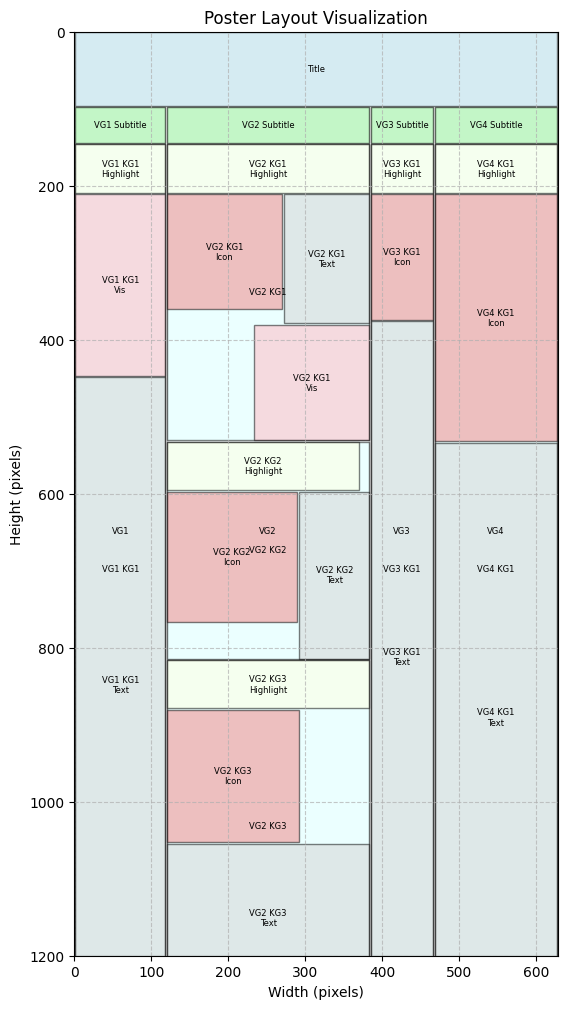

In [255]:
# Visualize the layout
W, H = 628.0, 1200.0
visualize_poster_layout(layout, W, H)

In [ ]:
# from math import sqrt

# def layout_poster(valentine_data, W, H, margin=0, vertical_margin=0):
#     """
#     Lays out a poster with title and VGs stacked horizontally from left to right,
#     with KGs stacked vertically within each VG.
    
#     Args:
#         valentine_data: Dictionary containing "data" with VGs, each having "knowledges".
#         W: Poster width (float).
#         H: Poster height (float).
#         margin: Horizontal margin for KGs in VGs with multiple KGs (float, default=0).
#         vertical_margin: Vertical spacing between KGs (float, default=0).
    
#     Returns:
#         Dictionary mapping element keys to their coordinates (as lists of [x, y] points).
#         Excludes Text coordinates.
#     """
#     # Character width-to-height ratios
#     def calculate_text_width(string, font_height):
#         ratios = {
#             'B': 0.5, 'E': 0.5, 'F': 0.5, 'J': 0.5, 'L': 0.5, 'P': 0.5, 'S': 0.5,
#             'A': 0.8889, 'D': 0.8889, 'H': 0.8889, 'K': 0.8889, 'N': 0.8889,
#             'R': 0.8889, 'T': 0.8889, 'U': 0.8889, 'V': 0.8889, 'X': 0.8889,
#             'Y': 0.8889, 'Z': 0.8889, 'C': 1.0, 'G': 1.0, 'O': 1.0, 'Q': 1.0,
#             'M': 1.1111, 'W': 1.1111, 'b': 0.5, 'd': 0.5, 'f': 0.5, 'h': 0.5,
#             'k': 0.5, 'l': 0.5, 't': 0.5, 'c': 1.0, 'e': 1.0, 'o': 1.0, 's': 1.0,
#             'a': 0.7, 'g': 0.7, 'n': 0.7, 'p': 0.7, 'q': 0.7, 'r': 0.7, 'u': 0.7,
#             'v': 0.7, 'w': 0.7, 'x': 0.7, 'y': 0.7, 'z': 0.7, ' ': 0.4
#         }
#         return sum(ratios.get(char, 0.7) * font_height for char in string)

#     VGs = valentine_data["data"]

#     # Calculate coefficients for the quadratic equation b x^2 + a x + c = 0
#     a = 3.0 * W  # From title height 3x
#     c = - H * W  # Total available area term
#     b = 0.0      # Area coefficient

#     for VG in VGs:
#         knowledges = VG["knowledges"]
#         for KG in knowledges:
#             text = KG["knowledge_content"]
#             highlight = KG["first_level_highlight"]
#             n_images = (1 if (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None ) else 0) + (1 if KG["visualization"]["is_visualization"] else 0)
#             s_text = calculate_text_width(text, 1.0)
#             s_highlight = calculate_text_width(highlight, 1.0)
#             b += s_text + 4 * s_highlight + s_text * n_images

#     # Solve the quadratic equation b x^2 + a x + c = 0
#     discriminant = a**2 - 4 * b * c
#     if discriminant < 0:
#         raise ValueError("No solution for font size x")
#     x = (-a + sqrt(discriminant)) / (2 * b) if b != 0 else -c / a
#     if x <= 0:
#         raise ValueError("Invalid font size x")

#     # Calculate available height and VG areas
#     h_title = 3.0 * x
#     h_remain = H - h_title
    
#     # Calculate total area A_VG for each VG
#     A_VGs = []
#     for VG in VGs:
#         knowledges = VG["knowledges"]
#         A_VG = 0.0
#         for KG in knowledges:
#             text = KG["knowledge_content"]
#             highlight = KG["first_level_highlight"]
#             has_icon = (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None )
#             has_vis = KG["visualization"]["is_visualization"]
#             A_text = x * calculate_text_width(text, x)
#             A_highlight = 2.0 * x * calculate_text_width(highlight, 2.0 * x)
#             A_icon = x * calculate_text_width(text, x) if has_icon else 0.0
#             A_vis = x * calculate_text_width(text, x) if has_vis else 0.0
#             A_KG = A_text + A_highlight + A_icon + A_vis
#             A_VG += A_KG
#         A_VGs.append(A_VG)
    
#     # Calculate ideal widths for each VG
#     w_VG_ideals = []
#     for i, VG in enumerate(VGs):
#         n_KG = len(VG["knowledges"])
#         if n_KG == 1:
#             denominator = h_remain - 1.5 * x
#         else:
#             denominator = h_remain - 1.5 * x - (n_KG - 1) * vertical_margin
#         w_VG_ideal = A_VGs[i] / denominator if denominator > 0 else 0.0
#         w_VG_ideals.append(w_VG_ideal)
    
#     # Scale widths to fit total width W
#     W_ideal = sum(w_VG_ideals)
#     scaling_factor = W / W_ideal if W_ideal > 0 else 1.0
#     w_VGs = [w * scaling_factor for w in w_VG_ideals]
    
#     # Calculate x-positions for each VG
#     x_VGs = [0.0]
#     for w in w_VGs[:-1]:
#         x_VGs.append(x_VGs[-1] + w)
    
#     # Layout the poster
#     layout = {}
#     layout["Title"] = [[0.0, 0.0], [W, 0.0], [0.0, h_title], [W, h_title]]
    
#     for i, VG in enumerate(VGs, 1):
#         x_VG = x_VGs[i-1]
#         w_VG = w_VGs[i-1]
#         knowledges = VG["knowledges"]
#         n_KG = len(knowledges)
        
#         VG_key = f"VG{i}"
#         layout[VG_key] = {}
        
#         # Subtitle
#         y = h_title
#         layout[VG_key]["Subtitle"] = [[x_VG, y], [x_VG + w_VG, y], [x_VG, y + 1.5 * x], [x_VG + w_VG, y + 1.5 * x]]
#         y += 1.5 * x
#         if n_KG > 1:
#             y += vertical_margin
        
#         for j, KG in enumerate(knowledges, 1):
#             # Determine KG width and x-position
#             if n_KG == 1:
#                 kg_x = x_VG
#                 kg_width = w_VG
#             else:
#                 kg_x = x_VG + margin
#                 kg_width = w_VG - 2 * margin
            
#             text = KG["knowledge_content"]
#             highlight = KG["first_level_highlight"]
#             has_icon = (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None )
#             has_vis = KG["visualization"]["is_visualization"]
            
#             # Calculate areas
#             A_text = x * calculate_text_width(text, x)
#             A_highlight = 2.0 * x * calculate_text_width(highlight, 2.0 * x)
#             A_icon = x * calculate_text_width(text, x) if has_icon else 0.0
#             A_vis = x * calculate_text_width(text, x) if has_vis else 0.0
#             A_KG = A_text + A_highlight + A_icon + A_vis
#             h_KG = A_KG / kg_width if kg_width > 0 else 0.0
            
#             KG_key = f"KG{j}"
#             layout[VG_key][KG_key] = {}
#             layout[VG_key][KG_key]["coords"] = [
#                 [kg_x, y], [kg_x + kg_width, y],
#                 [kg_x, y + h_KG], [kg_x + kg_width, y + h_KG]
#             ]
            
#             # Internal KG layout (unchanged from original)
#             y_KG = y
#             h_highlight = 2.0 * x
#             w_highlight = min(calculate_text_width(highlight, 2.0 * x), kg_width)
#             layout[VG_key][KG_key]["Highlight"] = [
#                 [kg_x, y_KG], [kg_x + w_highlight, y_KG],
#                 [kg_x, y_KG + h_highlight], [kg_x + w_highlight, y_KG + h_highlight]
#             ]
#             layout[VG_key][KG_key]["Icon"] = None
#             layout[VG_key][KG_key]["Vis"] = None

#             # Image placement logic (copied verbatim from original code)
#             aspect_ratios = [
#                 1.0, 1.333, 0.75, 1.5, 0.667, 1.777, 0.562, 0.5, 2.0,
#                 1.4, 0.714, 0.8, 1.25, 0.6, 1.667
#             ]

#             def try_placement_a(r, A_img):
#                 w_img = sqrt(A_img * r)
#                 h_img = sqrt(A_img / r)
#                 x1 = kg_x + kg_width - w_img
#                 y1 = y_KG
#                 x2 = kg_x + kg_width
#                 y2 = y_KG + h_img
#                 coords = [[x1, y1], [x2, y1], [x1, y2], [x2, y2]]
#                 overflow_area = 0
#                 if y2 > y_KG + h_KG:
#                     overflow_area += (y2 - (y_KG + h_KG)) * w_img
#                 if x1 < kg_x + w_highlight:
#                     overlap_area = (min(x2, kg_x + w_highlight) - x1) * h_img if x2 > kg_x + w_highlight else w_img * h_img
#                     overflow_area += overlap_area
#                 return True if overflow_area == 0 else False, coords, overflow_area

#             def try_placement_b(r, A_img):
#                 w_img = sqrt(A_img * r)
#                 h_img = sqrt(A_img / r)
#                 x1 = kg_x
#                 y1 = y_KG + h_highlight
#                 x2 = kg_x + w_img
#                 y2 = y_KG + h_highlight + h_img
#                 coords = [[x1, y1], [x2, y1], [x1, y2], [x2, y2]]
#                 overflow_area = 0
#                 if y2 > y_KG + h_KG:
#                     overflow_area += (y2 - (y_KG + h_KG)) * w_img
#                 if x2 > kg_x + kg_width:
#                     overflow_area += (x2 - (kg_x + kg_width)) * h_img
#                 return True if overflow_area == 0 else False, coords, overflow_area

#             def try_combination_1(r_a, r_b):
#                 w_a = sqrt(A_icon * r_a)
#                 h_a = sqrt(A_icon / r_a)
#                 w_b = sqrt(A_vis * r_b)
#                 h_b = sqrt(A_vis / r_b)
#                 # Img_a at top-right
#                 x1_a = kg_x + kg_width - w_a
#                 y1_a = y_KG
#                 x2_a = kg_x + kg_width
#                 y2_a = y_KG + h_a
#                 coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
#                 # Img_b at top, left of Img_a
#                 x1_b = kg_x + kg_width - w_a - w_b
#                 y1_b = y_KG
#                 x2_b = kg_x + kg_width - w_a
#                 y2_b = y_KG + h_b
#                 coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
#                 overflow_area = 0
#                 # Img_a checks
#                 if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
#                     overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
#                     overflow_area += overlap_area
#                 if y2_a > y_KG + h_KG:
#                     overflow_area += (y2_a - (y_KG + h_KG)) * w_a
#                 # Img_b checks
#                 if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
#                     overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight)
#                     overflow_area += overlap_area
#                 if y2_b > y_KG + h_KG:
#                     overflow_area += (y2_b - (y_KG + h_KG)) * w_b
#                 return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

#             def try_combination_2(r_a, r_b):
#                 w_a = sqrt(A_icon * r_a)
#                 h_a = sqrt(A_icon / r_a)
#                 w_b = sqrt(A_vis * r_b)
#                 h_b = sqrt(A_vis / r_b)
#                 # Img_a at top-right
#                 x1_a = kg_x + kg_width - w_a
#                 y1_a = y_KG
#                 x2_a = kg_x + kg_width
#                 y2_a = y_KG + h_a
#                 coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
#                 # Img_b at left, below highlight
#                 x1_b = kg_x
#                 y1_b = y_KG + h_highlight
#                 x2_b = kg_x + w_b
#                 y2_b = y_KG + h_highlight + h_b
#                 coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
#                 overflow_area = 0
#                 # Img_a checks
#                 if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
#                     overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
#                     overflow_area += overlap_area
#                 if y2_a > y_KG + h_KG:
#                     overflow_area += (y2_a - (y_KG + h_KG)) * w_a
#                 # Img_b checks
#                 if x2_b > x1_a:  # Overlap with Img_a's left corner
#                     overlap_height = min(y2_b, y2_a) - max(y1_b, y1_a)
#                     if overlap_height > 0:
#                         overlap_area = (min(x2_b, x1_a) - x1_a) * overlap_height if x2_b > x1_a else (x2_b - x1_a) * overlap_height
#                         overflow_area += overlap_area
#                 if x2_b > kg_x + kg_width:
#                     overflow_area += (x2_b - (kg_x + kg_width)) * h_b
#                 if y2_b > y_KG + h_KG:
#                     overflow_area += (y2_b - (y_KG + h_KG)) * w_b
#                 return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

#             def try_combination_3(r_a, r_b):
#                 w_a = sqrt(A_icon * r_a)
#                 h_a = sqrt(A_icon / r_a)
#                 w_b = sqrt(A_vis * r_b)
#                 h_b = sqrt(A_vis / r_b)
#                 # Img_a at top-right
#                 x1_a = kg_x + kg_width - w_a
#                 y1_a = y_KG
#                 x2_a = kg_x + kg_width
#                 y2_a = y_KG + h_a
#                 coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
#                 # Img_b below Img_a, right-aligned
#                 x1_b = kg_x + kg_width - w_b
#                 y1_b = y_KG + h_a
#                 x2_b = kg_x + kg_width
#                 y2_b = y_KG + h_a + h_b
#                 coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
#                 overflow_area = 0
#                 # Img_a checks
#                 if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
#                     overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
#                     overflow_area += overlap_area
#                 if y2_a > y_KG + h_KG:
#                     overflow_area += (y2_a - (y_KG + h_KG)) * w_a
#                 # Img_b checks
#                 if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
#                     overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight - (y1_b - y_KG)) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight - (y1_b - y_KG))
#                     overflow_area += overlap_area
#                 if y2_b > y_KG + h_KG:
#                     overflow_area += (y2_b - (y_KG + h_KG)) * w_b
#                 if x1_b < kg_x:
#                     overflow_area += (kg_x - x1_b) * h_b
#                 return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

#             def try_combination_4(r_a, r_b):
#                 w_a = sqrt(A_icon * r_a)
#                 h_a = sqrt(A_icon / r_a)
#                 w_b = sqrt(A_vis * r_b)
#                 h_b = sqrt(A_vis / r_b)
#                 # Img_a left-aligned below highlight
#                 x1_a = kg_x
#                 y1_a = y_KG + h_highlight
#                 x2_a = kg_x + w_a
#                 y2_a = y_KG + h_highlight + h_a
#                 coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
#                 # Img_b left-aligned below Img_a
#                 x1_b = kg_x
#                 y1_b = y_KG + h_highlight + h_a
#                 x2_b = kg_x + w_b
#                 y2_b = y_KG + h_highlight + h_a + h_b
#                 coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
#                 overflow_area = 0
#                 # Img_a checks
#                 if x2_a > kg_x + kg_width:
#                     overflow_area += (x2_a - (kg_x + kg_width)) * h_a
#                 if y2_a > y_KG + h_KG:
#                     overflow_area += (y2_a - (y_KG + h_KG)) * w_a
#                 # Img_b checks
#                 if x2_b > kg_x + kg_width:
#                     overflow_area += (x2_b - (kg_x + kg_width)) * h_b
#                 if y2_b > y_KG + h_KG:
#                     overflow_area += (y2_b - (y_KG + h_KG)) * w_b
#                 return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area
            
#             if has_icon and has_vis:
#                 min_overflow = float('inf')
#                 best_layout = None
#                 combination_funcs = [try_combination_1, try_combination_2, try_combination_3, try_combination_4]
#                 for idx, comb in enumerate(combination_funcs):
#                     for r_a in aspect_ratios:
#                         for r_b in aspect_ratios:
#                             fit, coords_a, coords_b, overflow = comb(r_a, r_b)
#                             # print('overflow:', overflow)
#                             # print('layout:', (coords_a, coords_b, r_a, r_b, idx))
#                             if fit:
#                                 layout[VG_key][KG_key]["Icon"] = coords_a
#                                 layout[VG_key][KG_key]["Vis"] = coords_b
#                                 min_overflow = 0
#                                 break
#                             if overflow < min_overflow:
#                                 min_overflow = overflow
#                                 best_layout = (coords_a, coords_b, r_a, r_b, idx)
#                                 # print('overflow:', overflow)
#                                 # print('best_layout:', best_layout)
#                         if min_overflow == 0:
#                             break
#                     if min_overflow == 0:
#                         break
#                 if min_overflow > 0:
#                     coords_a, coords_b, r_a, r_b, comb_idx = best_layout
#                     w_a = sqrt(A_icon * r_a)
#                     h_a = sqrt(A_icon / r_a)
#                     x1_a, y1_a = coords_a[0]
#                     x2_a, y2_a = coords_a[3]
#                     w_b = sqrt(A_vis * r_b)
#                     h_b = sqrt(A_vis / r_b)
#                     x1_b, y1_b = coords_b[0]
#                     x2_b, y2_b = coords_b[3]
#                     print(coords_a)
#                     print(coords_b)
#                     print(comb_idx)
#                     if comb_idx == 0:
#                         if x1_a < kg_x + w_highlight:
#                             w_a = kg_width - (kg_x + w_highlight - x1_a)
#                         if y2_a > y_KG + h_KG:
#                             h_a = h_KG - (y1_a - y_KG)
#                         w_a_new = min(w_a, h_a * r_a)
#                         h_a_new = w_a_new / r_a
#                         coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
#                         if x1_b < kg_x + w_highlight:
#                             w_b = kg_width - (kg_x + w_highlight - x1_b)
#                         if y2_b > y_KG + h_KG:
#                             h_b = h_KG - (y1_b - y_KG)
#                         w_b_new = min(w_b, h_b * r_b)
#                         h_b_new = w_b_new / r_b
#                         coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
#                     elif comb_idx == 1:
#                         if x1_a < kg_x + w_highlight:
#                             w_a = kg_width - (kg_x + w_highlight - x1_a)
#                         if y2_a > y_KG + h_KG:
#                             h_a = h_KG - (y1_a - y_KG)
#                         w_a_new = min(w_a, h_a * r_a)
#                         h_a_new = w_a_new / r_a
#                         coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
#                         if x2_b > kg_x + kg_width:
#                             w_b = kg_width - (x1_b - kg_x)
#                         if y2_b > y_KG + h_KG:
#                             h_b = h_KG - (y1_b - y_KG)
#                         if x2_b > x1_a + w_a_new:
#                             w_b = min(w_b, x1_a + w_a_new - x1_b)
#                         w_b_new = min(w_b, h_b * r_b)
#                         h_b_new = w_b_new / r_b
#                         coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
#                     elif comb_idx == 2:
#                         if x1_a < kg_x + w_highlight:
#                             w_a = kg_width - (kg_x + w_highlight - x1_a)
#                         if y2_a > y_KG + h_KG:
#                             h_a = h_KG - (y1_a - y_KG)
#                         w_a_new = min(w_a, h_a * r_a)
#                         h_a_new = w_a_new / r_a
#                         coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
#                         if x1_b < kg_x + w_highlight:
#                             w_b = kg_width - (kg_x + w_highlight - x1_b)
#                         if y2_b > y_KG + h_KG:
#                             h_b = h_KG - (y1_b - y_KG)
#                         w_b_new = min(w_b, h_b * r_b)
#                         h_b_new = w_b_new / r_b
#                         coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
#                     elif comb_idx == 3:
#                         if x2_a > kg_x + kg_width:
#                             w_a = kg_width - (x1_a - kg_x)
#                         if y2_a > y_KG + h_KG:
#                             h_a = h_KG - (y1_a - y_KG)
#                         w_a_new = min(w_a, h_a * r_a)
#                         h_a_new = w_a_new / r_a
#                         coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
#                         if x2_b > kg_x + kg_width:
#                             w_b = kg_width - (x1_b - kg_x)
#                         if y2_b > y_KG + h_KG:
#                             h_b = h_KG - (y1_b - y_KG)
#                         w_b_new = min(w_b, h_b * r_b)
#                         h_b_new = w_b_new / r_b
#                         coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
#                     layout[VG_key][KG_key]["Icon"] = coords_a
#                     layout[VG_key][KG_key]["Vis"] = coords_b

#             elif has_icon:
#                 min_overflow = float('inf')
#                 best_layout = None
#                 placement_funcs = [try_placement_a, try_placement_b]
#                 for idx, placement in enumerate(placement_funcs):
#                     for r in aspect_ratios:
#                         fit, coords, overflow = placement(r, A_icon)
#                         if fit:
#                             layout[VG_key][KG_key]["Icon"] = coords
#                             min_overflow = 0
#                             break
#                         if overflow < min_overflow:
#                             min_overflow = overflow
#                             best_layout = (coords, r, idx)
#                     if min_overflow == 0:
#                         break
#                 if min_overflow > 0:
#                     coords, r, placement_idx = best_layout
#                     w_img = sqrt(A_icon * r)
#                     h_img = sqrt(A_icon / r)
#                     x1, y1 = coords[0]
#                     x2, y2 = coords[3]
#                     if placement_idx == 0:
#                         if x1 < kg_x + w_highlight:
#                             w_img = kg_width - (kg_x + w_highlight - x1)
#                         if y2 > y_KG + h_KG:
#                             h_img = h_KG - (y1 - y_KG)
#                     elif placement_idx == 1:
#                         if x2 > kg_x + kg_width:
#                             w_img = kg_width - (x1 - kg_x)
#                         if y2 > y_KG + h_KG:
#                             h_img = h_KG - (y1 - y_KG)
#                     w_img_new = min(w_img, h_img * r)
#                     h_img_new = w_img_new / r
#                     layout[VG_key][KG_key]["Icon"] = [
#                         [x1, y1], [x1 + w_img_new, y1],
#                         [x1, y1 + h_img_new], [x1 + w_img_new, y1 + h_img_new]
#                     ]

#             elif has_vis:
#                 min_overflow = float('inf')
#                 best_layout = None
#                 placement_funcs = [try_placement_a, try_placement_b]
#                 for idx, placement in enumerate(placement_funcs):
#                     for r in aspect_ratios:
#                         fit, coords, overflow = placement(r, A_vis)
#                         if fit:
#                             layout[VG_key][KG_key]["Vis"] = coords
#                             min_overflow = 0
#                             break
#                         if overflow < min_overflow:
#                             min_overflow = overflow
#                             best_layout = (coords, r, idx)
#                     if min_overflow == 0:
#                         break
#                 if min_overflow > 0:
#                     coords, r, placement_idx = best_layout
#                     w_img = sqrt(A_vis * r)
#                     h_img = sqrt(A_vis / r)
#                     x1, y1 = coords[0]
#                     x2, y2 = coords[3]
#                     if placement_idx == 0:
#                         if x1 < kg_x + w_highlight:
#                             w_img = kg_width - (kg_x + w_highlight - x1)
#                         if y2 > y_KG + h_KG:
#                             h_img = h_KG - (y1 - y_KG)
#                     elif placement_idx == 1:
#                         if x2 > kg_x + kg_width:
#                             w_img = kg_width - (x1 - kg_x)
#                         if y2 > y_KG + h_KG:
#                             h_img = h_KG - (y1 - y_KG)
#                     w_img_new = min(w_img, h_img * r)
#                     h_img_new = w_img_new / r
#                     layout[VG_key][KG_key]["Vis"] = [
#                         [x1, y1], [x1 + w_img_new, y1],
#                         [x1, y1 + h_img_new], [x1 + w_img_new, y1 + h_img_new]
#                     ]
            
#             y += h_KG
#             if j < n_KG:
#                 y += vertical_margin
        
#         # Set VG coordinates to span from h_title to H
#         layout[VG_key]["coords"] = [
#             [x_VG, h_title], [x_VG + w_VG, h_title],
#             [x_VG, H], [x_VG + w_VG, H]
#         ]
    
#     return layout

# # Test code remains the same
# W, H = 628.0, 1200.0
# layout = layout_poster(valentine_data, W, H)
# layout

{'Title': [[0.0, 0.0],
  [628.0, 0.0],
  [0.0, 96.97167900015288],
  [628.0, 96.97167900015288]],
 'VG1': {'Subtitle': [[0.0, 96.97167900015288],
   [118.97351615695125, 96.97167900015288],
   [0.0, 145.4575185002293],
   [118.97351615695125, 145.4575185002293]],
  'KG1': {'coords': [[0.0, 145.4575185002293],
    [118.97351615695125, 145.4575185002293],
    [0.0, 1248.4858395000767],
    [118.97351615695125, 1248.4858395000767]],
   'Highlight': [[0.0, 145.4575185002293],
    [118.97351615695125, 145.4575185002293],
    [0.0, 210.10530450033121],
    [118.97351615695125, 210.10530450033121]],
   'Icon': None,
   'Vis': [[0.0, 210.10530450033121],
    [118.97351615695125, 210.10530450033121],
    [0.0, 448.05233681423374],
    [118.97351615695125, 448.05233681423374]]},
  'coords': [[0.0, 96.97167900015288],
   [118.97351615695125, 96.97167900015288],
   [0.0, 1200.0],
   [118.97351615695125, 1200.0]]},
 'VG2': {'Subtitle': [[118.97351615695125, 96.97167900015288],
   [384.2010999463330

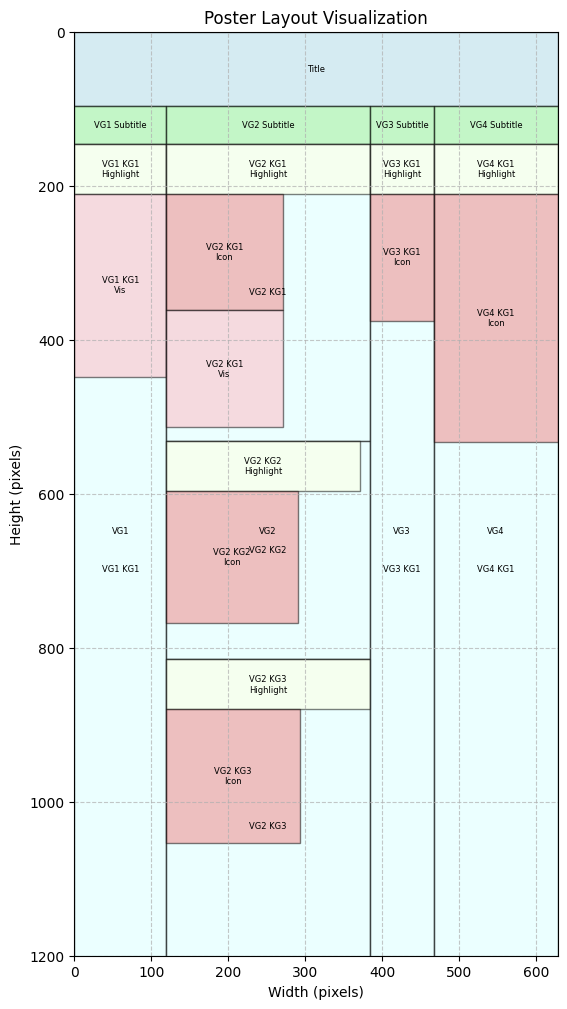

In [ ]:
# # Visualize the layout
# W, H = 628.0, 1200.0
# visualize_poster_layout(layout, W, H)

## grid

In [ ]:
# from math import sqrt

# def layout_poster(valentine_data, W, H, margin=0, vertical_margin=0):
#     """
#     Lays out a poster with a title, Super Groups (SGs) containing Visual Groups (VGs),
#     and Knowledge Groups (KGs) within VGs. VGs within an SG have widths proportional to their content areas.
    
#     Args:
#         valentine_data: Dictionary containing "data" with VGs, each having "knowledges".
#         W: Poster width (float).
#         H: Poster height (float).
#         margin: Horizontal margin for KGs in VGs with multiple KGs (float, default=0).
#         vertical_margin: Vertical spacing between KGs (float, default=0).
    
#     Returns:
#         Dictionary mapping element keys to their coordinates (as lists of [x, y] points).
#         Excludes Text coordinates.
#     """
#     # Character width-to-height ratios
#     def calculate_text_width(string, font_height):
#         ratios = {
#             'B': 0.5, 'E': 0.5, 'F': 0.5, 'J': 0.5, 'L': 0.5, 'P': 0.5, 'S': 0.5,
#             'A': 0.8889, 'D': 0.8889, 'H': 0.8889, 'K': 0.8889, 'N': 0.8889,
#             'R': 0.8889, 'T': 0.8889, 'U': 0.8889, 'V': 0.8889, 'X': 0.8889,
#             'Y': 0.8889, 'Z': 0.8889, 'C': 1.0, 'G': 1.0, 'O': 1.0, 'Q': 1.0,
#             'M': 1.1111, 'W': 1.1111, 'b': 0.5, 'd': 0.5, 'f': 0.5, 'h': 0.5,
#             'k': 0.5, 'l': 0.5, 't': 0.5, 'c': 1.0, 'e': 1.0, 'o': 1.0, 's': 1.0,
#             'a': 0.7, 'g': 0.7, 'n': 0.7, 'p': 0.7, 'q': 0.7, 'r': 0.7, 'u': 0.7,
#             'v': 0.7, 'w': 0.7, 'x': 0.7, 'y': 0.7, 'z': 0.7, ' ': 0.4
#         }
#         return sum(ratios.get(char, 0.7) * font_height for char in string)

#     ### BEGIN ADDED CODE ###
#     # Helper function to calculate area of a rectangle
#     def calculate_area(x1, y1, x2, y2):
#         return (x2 - x1) * (y2 - y1)
#     ### END ADDED CODE ###

#     # Helper function to define SG structure based on number of VGs
#     def get_sg_structure(n_VG):
#         if n_VG == 1:
#             return [[0]]
#         elif n_VG == 2:
#             return [[0], [1]]
#         elif n_VG == 3:
#             return [[0, 1], [2]]
#         elif n_VG == 4:
#             return [[0, 1], [2, 3]]
#         elif n_VG == 5:
#             return [[0, 1], [2, 3], [4]]
#         elif n_VG == 6:
#             return [[0, 1], [2, 3], [4, 5]]
#         elif n_VG == 7:
#             return [[0, 1, 2], [3, 4], [5, 6]]
#         elif n_VG == 8:
#             return [[0, 1, 2], [3, 4, 5], [6, 7]]
#         elif n_VG == 9:
#             return [[0, 1, 2], [3, 4, 5], [6, 7, 8]]
#         elif n_VG == 10:
#             return [[0, 1, 2], [3, 4, 5], [6, 7, 8, 9]]
#         else:
#             raise ValueError("Unsupported number of VGs (must be 1 to 10)")

#     VGs = valentine_data["data"]
#     n_VG = len(VGs)
#     sg_structure = get_sg_structure(n_VG)
#     n_SG = len(sg_structure)

#     # Calculate coefficients for the quadratic equation b * x^2 + a * x + c - H * W = 0
#     a = 3.0 * W + 1.5 * n_SG * W  # Title (3x * W) + Subtitles (1.5x * W per VG)
#     b = 0.0  # Area coefficient
#     c = -H * W  # Target poster area

#     # Compute b and vg_areas
#     vg_areas = []
#     for VG in VGs:
#         knowledges = VG["knowledges"]
#         sum_s_KG = 0.0
#         for KG in knowledges:
#             text = KG["knowledge_content"]
#             highlight = KG["first_level_highlight"]
#             n_images = (1 if (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None ) else 0) + (1 if KG["visualization"]["is_visualization"] else 0)
#             s_text = calculate_text_width(text, 1.0)
#             s_highlight = calculate_text_width(highlight, 1.0)
#             s_KG = s_text + 4 * s_highlight + s_text * n_images
#             sum_s_KG += s_KG
#             b += s_KG  # Add to total area coefficient
#         vg_areas.append(sum_s_KG)

#     # Add vertical margins to c
#     for VG in VGs:
#         n_KG = len(VG["knowledges"])
#         if n_KG > 1:
#             c += (n_KG - 1) * vertical_margin * W

#     # Solve b * x^2 + a * x + c = 0
#     discriminant = a**2 - 4 * b * c
#     if discriminant < 0:
#         raise ValueError("No solution for font size x")
#     x = (-a + sqrt(discriminant)) / (2 * b) if b != 0 else -c / a
#     if x <= 0:
#         raise ValueError("Invalid font size x")

#     # Layout the poster
#     layout = {}
#     layout["Title"] = [[0.0, 0.0], [W, 0.0], [0.0, 3.0 * x], [W, 3.0 * x]]
#     y = 3.0 * x  # Start below title

#     for sg in sg_structure:
#         n_VG_in_SG = len(sg)
#         total_area_in_sg = sum(vg_areas[i] for i in sg) if sg else 0.0
#         vg_heights = []

#         x_VG_start = 0.0
#         for vg_idx in sg:
#             VG = VGs[vg_idx]
#             knowledges = VG["knowledges"]
#             n_KG = len(knowledges)
#             w_VG = W * (vg_areas[vg_idx] / total_area_in_sg) if total_area_in_sg > 0 else W
#             kg_width = w_VG if n_KG == 1 else w_VG - 2 * margin
#             kg_x = x_VG_start if n_KG == 1 else x_VG_start + margin

#             VG_key = f"VG{vg_idx + 1}"
#             layout[VG_key] = {}

#             # Subtitle
#             y_VG_start = y
#             layout[VG_key]["Subtitle"] = [
#                 [x_VG_start, y], [x_VG_start + w_VG, y],
#                 [x_VG_start, y + 1.5 * x], [x_VG_start + w_VG, y + 1.5 * x]
#             ]
#             y_VG = y + 1.5 * x
#             if n_KG > 1:
#                 y_VG += vertical_margin

#             # Layout KGs within VG
#             for j, KG in enumerate(knowledges, 1):
#                 text = KG["knowledge_content"]
#                 highlight = KG["first_level_highlight"]
#                 has_icon = (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None )
#                 has_vis = KG["visualization"]["is_visualization"]

#                 A_text = x * calculate_text_width(text, x)
#                 A_highlight = 2.0 * x * calculate_text_width(highlight, 2.0 * x)
#                 A_icon = x * calculate_text_width(text, x) if has_icon else 0.0
#                 A_vis = x * calculate_text_width(text, x) if has_vis else 0.0
#                 A_KG = A_text + A_highlight + A_icon + A_vis
#                 h_KG = A_KG / kg_width if kg_width > 0 else 0.0

#                 KG_key = f"KG{j}"
#                 layout[VG_key][KG_key] = {}
#                 layout[VG_key][KG_key]["coords"] = [
#                     [kg_x, y_VG], [kg_x + kg_width, y_VG],
#                     [kg_x, y_VG + h_KG], [kg_x + kg_width, y_VG + h_KG]
#                 ]

#                 y_KG = y_VG
#                 h_highlight = 2.0 * x
#                 w_highlight = min(calculate_text_width(highlight, 2.0 * x), kg_width)
#                 layout[VG_key][KG_key]["Highlight"] = [
#                     [kg_x, y_KG], [kg_x + w_highlight, y_KG],
#                     [kg_x, y_KG + h_highlight], [kg_x + w_highlight, y_KG + h_highlight]
#                 ]
#                 layout[VG_key][KG_key]["Icon"] = None
#                 layout[VG_key][KG_key]["Vis"] = None

#                 # Image placement functions (unchanged)
#                 aspect_ratios = [1.0, 1.333, 0.75, 1.5, 0.667, 1.777, 0.562, 0.5, 2.0, 1.4, 0.714, 0.8, 1.25, 0.6, 1.667]

#                 def try_placement_a(r, A_img):
#                     w_img = sqrt(A_img * r)
#                     h_img = sqrt(A_img / r)
#                     x1 = kg_x + kg_width - w_img
#                     y1 = y_KG
#                     x2 = kg_x + kg_width
#                     y2 = y_KG + h_img
#                     coords = [[x1, y1], [x2, y1], [x1, y2], [x2, y2]]
#                     overflow_area = 0
#                     if y2 > y_KG + h_KG:
#                         overflow_area += (y2 - (y_KG + h_KG)) * w_img
#                     if x1 < kg_x + w_highlight:
#                         overlap_area = (min(x2, kg_x + w_highlight) - x1) * h_img if x2 > kg_x + w_highlight else w_img * h_img
#                         overflow_area += overlap_area
#                     return True if overflow_area == 0 else False, coords, overflow_area

#                 def try_placement_b(r, A_img):
#                     w_img = sqrt(A_img * r)
#                     h_img = sqrt(A_img / r)
#                     x1 = kg_x
#                     y1 = y_KG + h_highlight
#                     x2 = kg_x + w_img
#                     y2 = y_KG + h_highlight + h_img
#                     coords = [[x1, y1], [x2, y1], [x1, y2], [x2, y2]]
#                     overflow_area = 0
#                     if y2 > y_KG + h_KG:
#                         overflow_area += (y2 - (y_KG + h_KG)) * w_img
#                     if x2 > kg_x + kg_width:
#                         overflow_area += (x2 - (kg_x + kg_width)) * h_img
#                     return True if overflow_area == 0 else False, coords, overflow_area

#                 def try_combination_1(r_a, r_b):
#                     w_a = sqrt(A_icon * r_a)
#                     h_a = sqrt(A_icon / r_a)
#                     w_b = sqrt(A_vis * r_b)
#                     h_b = sqrt(A_vis / r_b)
#                     x1_a = kg_x + kg_width - w_a
#                     y1_a = y_KG
#                     x2_a = kg_x + kg_width
#                     y2_a = y_KG + h_a
#                     coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
#                     x1_b = kg_x + kg_width - w_a - w_b
#                     y1_b = y_KG
#                     x2_b = kg_x + kg_width - w_a
#                     y2_b = y_KG + h_b
#                     coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
#                     overflow_area = 0
#                     if y2_a > y_KG + h_KG:
#                         overflow_area += (y2_a - (y_KG + h_KG)) * w_a
#                     if y2_b > y_KG + h_KG:
#                         overflow_area += (y2_b - (y_KG + h_KG)) * w_b
#                     if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
#                         overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
#                         overflow_area += overlap_area
#                     if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
#                         overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight)
#                         overflow_area += overlap_area
#                     return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

#                 def try_combination_2(r_a, r_b):
#                     w_a = sqrt(A_icon * r_a)
#                     h_a = sqrt(A_icon / r_a)
#                     w_b = sqrt(A_vis * r_b)
#                     h_b = sqrt(A_vis / r_b)
#                     x1_a = kg_x + kg_width - w_a
#                     y1_a = y_KG
#                     x2_a = kg_x + kg_width
#                     y2_a = y_KG + h_a
#                     coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
#                     x1_b = kg_x
#                     y1_b = y_KG + h_highlight
#                     x2_b = kg_x + w_b
#                     y2_b = y_KG + h_highlight + h_b
#                     coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
#                     overflow_area = 0
#                     if y2_a > y_KG + h_KG:
#                         overflow_area += (y2_a - (y_KG + h_KG)) * w_a
#                     if y2_b > y_KG + h_KG:
#                         overflow_area += (y2_b - (y_KG + h_KG)) * w_b
#                     if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
#                         overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
#                         overflow_area += overlap_area
#                     if x2_b > kg_x + kg_width:
#                         overflow_area += (x2_b - (kg_x + kg_width)) * h_b
#                     return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

#                 def try_combination_3(r_a, r_b):
#                     w_a = sqrt(A_icon * r_a)
#                     h_a = sqrt(A_icon / r_a)
#                     w_b = sqrt(A_vis * r_b)
#                     h_b = sqrt(A_vis / r_b)
#                     x1_a = kg_x + kg_width - w_a
#                     y1_a = y_KG
#                     x2_a = kg_x + kg_width
#                     y2_a = y_KG + h_a
#                     coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
#                     x1_b = kg_x + kg_width - w_b
#                     y1_b = y_KG + h_a
#                     x2_b = kg_x + kg_width
#                     y2_b = y_KG + h_a + h_b
#                     coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
#                     overflow_area = 0
#                     if y2_a > y_KG + h_KG:
#                         overflow_area += (y2_a - (y_KG + h_KG)) * w_a
#                     if y2_b > y_KG + h_KG:
#                         overflow_area += (y2_b - (y_KG + h_KG)) * w_b
#                     if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
#                         overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
#                         overflow_area += overlap_area
#                     if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
#                         overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight - (y1_b - y_KG)) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight - (y1_b - y_KG))
#                         overflow_area += overlap_area
#                     return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

#                 def try_combination_4(r_a, r_b):
#                     w_a = sqrt(A_icon * r_a)
#                     h_a = sqrt(A_icon / r_a)
#                     w_b = sqrt(A_vis * r_b)
#                     h_b = sqrt(A_vis / r_b)
#                     x1_a = kg_x
#                     y1_a = y_KG + h_highlight
#                     x2_a = kg_x + w_a
#                     y2_a = y_KG + h_highlight + h_a
#                     coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
#                     x1_b = kg_x + kg_width - w_b
#                     y1_b = y_KG + h_KG - h_b
#                     x2_b = kg_x + kg_width
#                     y2_b = y_KG + h_KG
#                     coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
#                     overflow_area = 0
#                     if y2_a > y_KG + h_KG:
#                         overflow_area += (y2_a - (y_KG + h_KG)) * w_a
#                     if x2_a > kg_x + kg_width:
#                         overflow_area += (x2_a - (kg_x + kg_width)) * h_a
#                     if y2_b > y_KG + h_KG:
#                         overflow_area += (y2_b - (y_KG + h_KG)) * w_b
#                     if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
#                         overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight - (y1_b - y_KG)) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight - (y1_b - y_KG))
#                         overflow_area += overlap_area
#                     return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

#                 if has_icon and has_vis:
#                     min_overflow = float('inf')
#                     best_layout = None
#                     combination_funcs = [try_combination_1, try_combination_2, try_combination_3, try_combination_4]
#                     for idx, comb in enumerate(combination_funcs):
#                         for r_a in aspect_ratios:
#                             for r_b in aspect_ratios:
#                                 fit, coords_a, coords_b, overflow = comb(r_a, r_b)
#                                 if fit:
#                                     layout[VG_key][KG_key]["Icon"] = coords_a
#                                     layout[VG_key][KG_key]["Vis"] = coords_b
#                                     min_overflow = 0
#                                     break
#                                 if overflow < min_overflow:
#                                     min_overflow = overflow
#                                     best_layout = (coords_a, coords_b, r_a, r_b, idx)
#                             if min_overflow == 0:
#                                 break
#                         if min_overflow == 0:
#                             break
#                     if min_overflow > 0:
#                         coords_a, coords_b, r_a, r_b, comb_idx = best_layout
#                         w_a = sqrt(A_icon * r_a)
#                         h_a = sqrt(A_icon / r_a)
#                         x1_a, y1_a = coords_a[0]
#                         x2_a, y2_a = coords_a[3]
#                         w_b = sqrt(A_vis * r_b)
#                         h_b = sqrt(A_vis / r_b)
#                         x1_b, y1_b = coords_b[0]
#                         x2_b, y2_b = coords_b[3]
#                         if comb_idx == 0:
#                             if x1_a < kg_x + w_highlight:
#                                 w_a = kg_width - (kg_x + w_highlight - x1_a)
#                             if y2_a > y_KG + h_KG:
#                                 h_a = h_KG - (y1_a - y_KG)
#                             w_a_new = min(w_a, h_a * r_a)
#                             h_a_new = w_a_new / r_a
#                             coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
#                             if x1_b < kg_x + w_highlight:
#                                 w_b = kg_width - (kg_x + w_highlight - x1_b)
#                             if y2_b > y_KG + h_KG:
#                                 h_b = h_KG - (y1_b - y_KG)
#                             w_b_new = min(w_b, h_b * r_b)
#                             h_b_new = w_b_new / r_b
#                             coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
#                         elif comb_idx == 1:
#                             if x1_a < kg_x + w_highlight:
#                                 w_a = kg_width - (kg_x + w_highlight - x1_a)
#                             if y2_a > y_KG + h_KG:
#                                 h_a = h_KG - (y1_a - y_KG)
#                             w_a_new = min(w_a, h_a * r_a)
#                             h_a_new = w_a_new / r_a
#                             coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
#                             if x2_b > kg_x + kg_width:
#                                 w_b = kg_width - (x1_b - kg_x)
#                             if y2_b > y_KG + h_KG:
#                                 h_b = h_KG - (y1_b - y_KG)
#                             w_b_new = min(w_b, h_b * r_b)
#                             h_b_new = w_b_new / r_b
#                             coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
#                         elif comb_idx == 2:
#                             if x1_a < kg_x + w_highlight:
#                                 w_a = kg_width - (kg_x + w_highlight - x1_a)
#                             if y2_a > y_KG + h_KG:
#                                 h_a = h_KG - (y1_a - y_KG)
#                             w_a_new = min(w_a, h_a * r_a)
#                             h_a_new = w_a_new / r_a
#                             coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
#                             if x1_b < kg_x + w_highlight:
#                                 w_b = kg_width - (kg_x + w_highlight - x1_b)
#                             if y2_b > y_KG + h_KG:
#                                 h_b = h_KG - (y1_b - y_KG)
#                             w_b_new = min(w_b, h_b * r_b)
#                             h_b_new = w_b_new / r_b
#                             coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
#                         elif comb_idx == 3:
#                             # Image A: Adjust for right and bottom overflow
#                             if x2_a > kg_x + kg_width:
#                                 w_a = kg_width - (x1_a - kg_x)  # w_a = kg_width since x1_a = kg_x
#                             if y2_a > y_KG + h_KG:
#                                 h_a = h_KG - (y1_a - y_KG)     # h_a = h_KG - h_highlight since y1_a = y_KG + h_highlight
#                             w_a_new = min(w_a, h_a * r_a)
#                             h_a_new = w_a_new / r_a
#                             coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
                            
#                             # Image B: Adjust for left, top, and highlight overlap, anchored at (x2_b, y2_b)
#                             if x1_b < kg_x:  # Left boundary overflow
#                                 w_b = kg_width
#                             if y1_b < y_KG:  # Top boundary overflow
#                                 h_b = h_KG
#                             if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:  # Highlight overlap
#                                 ratio_x = (kg_width - w_highlight) / w_b  # Ratio to make x1_b = kg_x + w_highlight
#                                 ratio_y = (h_KG - h_highlight) / h_b      # Ratio to make y1_b = y_KG + h_highlight
#                                 scale = max(ratio_x, ratio_y)             # Use the smaller ratio to satisfy both
#                                 w_b_new = w_b * scale
#                                 h_b_new = h_b * scale
#                             else:
#                                 w_b_new = w_b
#                                 h_b_new = h_b
#                             # Recalculate coordinates with anchor at (x2_b, y2_b)
#                             x1_b_new = x2_b - w_b_new
#                             y1_b_new = y2_b - h_b_new
#                             coords_b = [[x1_b_new, y1_b_new], [x2_b, y1_b_new], [x1_b_new, y2_b], [x2_b, y2_b]]

#                 elif has_icon:
#                     min_overflow = float('inf')
#                     best_layout = None
#                     placement_funcs = [try_placement_a, try_placement_b]
#                     for idx, placement in enumerate(placement_funcs):
#                         for r in aspect_ratios:
#                             fit, coords, overflow = placement(r, A_icon)
#                             if fit:
#                                 layout[VG_key][KG_key]["Icon"] = coords
#                                 min_overflow = 0
#                                 break
#                             if overflow < min_overflow:
#                                 min_overflow = overflow
#                                 best_layout = (coords, r, idx)
#                         if min_overflow == 0:
#                             break
#                     if min_overflow > 0:
#                         coords, r, placement_idx = best_layout
#                         w_img = sqrt(A_icon * r)
#                         h_img = sqrt(A_icon / r)
#                         x1, y1 = coords[0]
#                         x2, y2 = coords[3]
#                         if placement_idx == 0:
#                             if x1 < kg_x + w_highlight:
#                                 w_img = kg_width - (kg_x + w_highlight - x1)
#                             if y2 > y_KG + h_KG:
#                                 h_img = h_KG - (y1 - y_KG)
#                         elif placement_idx == 1:
#                             if x2 > kg_x + kg_width:
#                                 w_img = kg_width - (x1 - kg_x)
#                             if y2 > y_KG + h_KG:
#                                 h_img = h_KG - (y1 - y_KG)
#                         w_img_new = min(w_img, h_img * r)
#                         h_img_new = w_img_new / r
#                         layout[VG_key][KG_key]["Icon"] = [
#                             [x1, y1], [x1 + w_img_new, y1],
#                             [x1, y1 + h_img_new], [x1 + w_img_new, y1 + h_img_new]
#                         ]

#                 elif has_vis:
#                     min_overflow = float('inf')
#                     best_layout = None
#                     placement_funcs = [try_placement_a, try_placement_b]
#                     for idx, placement in enumerate(placement_funcs):
#                         for r in aspect_ratios:
#                             fit, coords, overflow = placement(r, A_vis)
#                             if fit:
#                                 layout[VG_key][KG_key]["Vis"] = coords
#                                 min_overflow = 0
#                                 break
#                             if overflow < min_overflow:
#                                 min_overflow = overflow
#                                 best_layout = (coords, r, idx)
#                         if min_overflow == 0:
#                             break
#                     if min_overflow > 0:
#                         coords, r, placement_idx = best_layout
#                         w_img = sqrt(A_vis * r)
#                         h_img = sqrt(A_vis / r)
#                         x1, y1 = coords[0]
#                         x2, y2 = coords[3]
#                         if placement_idx == 0:
#                             if x1 < kg_x + w_highlight:
#                                 w_img = kg_width - (kg_x + w_highlight - x1)
#                             if y2 > y_KG + h_KG:
#                                 h_img = h_KG - (y1 - y_KG)
#                         elif placement_idx == 1:
#                             if x2 > kg_x + kg_width:
#                                 w_img = kg_width - (x1 - kg_x)
#                             if y2 > y_KG + h_KG:
#                                 h_img = h_KG - (y1 - y_KG)
#                         w_img_new = min(w_img, h_img * r)
#                         h_img_new = w_img_new / r
#                         layout[VG_key][KG_key]["Vis"] = [
#                             [x1, y1], [x1 + w_img_new, y1],
#                             [x1, y1 + h_img_new], [x1 + w_img_new, y1 + h_img_new]
#                         ]

#                 y_VG += h_KG
#                 if j < n_KG:
#                     y_VG += vertical_margin

#             h_VG = y_VG - y_VG_start
#             vg_heights.append(h_VG)
#             x_VG_start += w_VG

#         h_SG = max(vg_heights) if vg_heights else 0.0
#         x_VG_start = 0.0
#         for vg_idx in sg:
#             VG_key = f"VG{vg_idx + 1}"
#             w_VG = W * (vg_areas[vg_idx] / total_area_in_sg) if total_area_in_sg > 0 else W
#             layout[VG_key]["coords"] = [
#                 [x_VG_start, y], [x_VG_start + w_VG, y],
#                 [x_VG_start, y + h_SG], [x_VG_start + w_VG, y + h_SG]
#             ]
#             x_VG_start += w_VG

#         y += h_SG

#     return layout

In [231]:
from math import sqrt

def layout_poster(valentine_data, W, H, margin=0, vertical_margin=0):
    """
    Lays out a poster with a title, Super Groups (SGs) containing Visual Groups (VGs),
    and Knowledge Groups (KGs) within VGs. VGs within an SG have widths proportional to their content areas.
    
    Args:
        valentine_data: Dictionary containing "data" with VGs, each having "knowledges".
        W: Poster width (float).
        H: Poster height (float).
        margin: Horizontal margin for KGs in VGs with multiple KGs (float, default=0).
        vertical_margin: Vertical spacing between KGs (float, default=0).
    
    Returns:
        Dictionary mapping element keys to their coordinates (as lists of [x, y] points).
        Now includes Text coordinates for each KG.
    """
    # Character width-to-height ratios
    def calculate_text_width(string, font_height):
        ratios = {
            'B': 0.5, 'E': 0.5, 'F': 0.5, 'J': 0.5, 'L': 0.5, 'P': 0.5, 'S': 0.5,
            'A': 0.8889, 'D': 0.8889, 'H': 0.8889, 'K': 0.8889, 'N': 0.8889,
            'R': 0.8889, 'T': 0.8889, 'U': 0.8889, 'V': 0.8889, 'X': 0.8889,
            'Y': 0.8889, 'Z': 0.8889, 'C': 1.0, 'G': 1.0, 'O': 1.0, 'Q': 1.0,
            'M': 1.1111, 'W': 1.1111, 'b': 0.5, 'd': 0.5, 'f': 0.5, 'h': 0.5,
            'k': 0.5, 'l': 0.5, 't': 0.5, 'c': 1.0, 'e': 1.0, 'o': 1.0, 's': 1.0,
            'a': 0.7, 'g': 0.7, 'n': 0.7, 'p': 0.7, 'q': 0.7, 'r': 0.7, 'u': 0.7,
            'v': 0.7, 'w': 0.7, 'x': 0.7, 'y': 0.7, 'z': 0.7, ' ': 0.4
        }
        return sum(ratios.get(char, 0.7) * font_height for char in string)

    # Helper function to calculate area of a rectangle
    def calculate_area(x1, y1, x2, y2):
        return (x2 - x1) * (y2 - y1)

    # Helper function to define SG structure based on number of VGs
    def get_sg_structure(n_VG):
        if n_VG == 1:
            return [[0]]
        elif n_VG == 2:
            return [[0], [1]]
        elif n_VG == 3:
            return [[0, 1], [2]]
        elif n_VG == 4:
            return [[0, 1], [2, 3]]
        elif n_VG == 5:
            return [[0, 1], [2, 3], [4]]
        elif n_VG == 6:
            return [[0, 1], [2, 3], [4, 5]]
        elif n_VG == 7:
            return [[0, 1, 2], [3, 4], [5, 6]]
        elif n_VG == 8:
            return [[0, 1, 2], [3, 4, 5], [6, 7]]
        elif n_VG == 9:
            return [[0, 1, 2], [3, 4, 5], [6, 7, 8]]
        elif n_VG == 10:
            return [[0, 1, 2], [3, 4, 5], [6, 7, 8, 9]]
        else:
            raise ValueError("Unsupported number of VGs (must be 1 to 10)")

    VGs = valentine_data["data"]
    n_VG = len(VGs)
    sg_structure = get_sg_structure(n_VG)
    n_SG = len(sg_structure)

    # Calculate coefficients for the quadratic equation b * x^2 + a * x + c - H * W = 0
    a = 3.0 * W + 1.5 * n_SG * W  # Title (3x * W) + Subtitles (1.5x * W per VG)
    b = 0.0  # Area coefficient
    c = -H * W  # Target poster area

    # Compute b and vg_areas
    vg_areas = []
    for VG in VGs:
        knowledges = VG["knowledges"]
        sum_s_KG = 0.0
        for KG in knowledges:
            text = KG["knowledge_content"]
            highlight = KG["first_level_highlight"]
            n_images = (1 if (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None ) else 0) + (1 if KG["visualization"]["is_visualization"] else 0)
            s_text = calculate_text_width(text, 1.0)
            s_highlight = calculate_text_width(highlight, 1.0)
            s_KG = s_text + 4 * s_highlight + s_text * n_images
            sum_s_KG += s_KG
            b += s_KG  # Add to total area coefficient
        vg_areas.append(sum_s_KG)

    # Add vertical margins to c
    for VG in VGs:
        n_KG = len(VG["knowledges"])
        if n_KG > 1:
            c += (n_KG - 1) * vertical_margin * W

    # Solve b * x^2 + a * x + c = 0
    discriminant = a**2 - 4 * b * c
    if discriminant < 0:
        raise ValueError("No solution for font size x")
    x = (-a + sqrt(discriminant)) / (2 * b) if b != 0 else -c / a
    if x <= 0:
        raise ValueError("Invalid font size x")

    # Layout the poster
    layout = {}
    layout["Title"] = [[0.0, 0.0], [W, 0.0], [0.0, 3.0 * x], [W, 3.0 * x]]
    y = 3.0 * x  # Start below title

    for sg in sg_structure:
        n_VG_in_SG = len(sg)
        total_area_in_sg = sum(vg_areas[i] for i in sg) if sg else 0.0
        vg_heights = []

        x_VG_start = 0.0
        for vg_idx in sg:
            VG = VGs[vg_idx]
            knowledges = VG["knowledges"]
            n_KG = len(knowledges)
            w_VG = W * (vg_areas[vg_idx] / total_area_in_sg) if total_area_in_sg > 0 else W
            kg_width = w_VG if n_KG == 1 else w_VG - 2 * margin
            kg_x = x_VG_start if n_KG == 1 else x_VG_start + margin

            VG_key = f"VG{vg_idx + 1}"
            layout[VG_key] = {}

            # Subtitle
            y_VG_start = y
            layout[VG_key]["Subtitle"] = [
                [x_VG_start, y], [x_VG_start + w_VG, y],
                [x_VG_start, y + 1.5 * x], [x_VG_start + w_VG, y + 1.5 * x]
            ]
            y_VG = y + 1.5 * x
            if n_KG > 1:
                y_VG += vertical_margin

            # Layout KGs within VG
            for j, KG in enumerate(knowledges, 1):
                text = KG["knowledge_content"]
                highlight = KG["first_level_highlight"]
                has_icon = (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None )
                has_vis = KG["visualization"]["is_visualization"]

                A_text = x * calculate_text_width(text, x)
                A_highlight = 2.0 * x * calculate_text_width(highlight, 2.0 * x)
                A_icon = x * calculate_text_width(text, x) if has_icon else 0.0
                A_vis = x * calculate_text_width(text, x) if has_vis else 0.0
                A_KG = A_text + A_highlight + A_icon + A_vis
                h_KG = A_KG / kg_width if kg_width > 0 else 0.0

                KG_key = f"KG{j}"
                layout[VG_key][KG_key] = {}
                layout[VG_key][KG_key]["coords"] = [
                    [kg_x, y_VG], [kg_x + kg_width, y_VG],
                    [kg_x, y_VG + h_KG], [kg_x + kg_width, y_VG + h_KG]
                ]

                y_KG = y_VG
                h_highlight = 2.0 * x
                w_highlight = min(calculate_text_width(highlight, 2.0 * x), kg_width)
                layout[VG_key][KG_key]["Highlight"] = [
                    [kg_x, y_KG], [kg_x + w_highlight, y_KG],
                    [kg_x, y_KG + h_highlight], [kg_x + w_highlight, y_KG + h_highlight]
                ]
                layout[VG_key][KG_key]["Icon"] = None
                layout[VG_key][KG_key]["Vis"] = None
                layout[VG_key][KG_key]["placement_type"] = "none"  # Initialize placement type

                # Image placement functions
                aspect_ratios = [1.0, 1.333, 0.75, 1.5, 0.667, 1.777, 0.562, 0.5, 2.0, 1.4, 0.714, 0.8, 1.25, 0.6, 1.667]

                def try_placement_a(r, A_img):
                    w_img = sqrt(A_img * r)
                    h_img = sqrt(A_img / r)
                    x1 = kg_x + kg_width - w_img
                    y1 = y_KG
                    x2 = kg_x + kg_width
                    y2 = y_KG + h_img
                    coords = [[x1, y1], [x2, y1], [x1, y2], [x2, y2]]
                    overflow_area = 0
                    if y2 > y_KG + h_KG:
                        overflow_area += (y2 - (y_KG + h_KG)) * w_img
                    if x1 < kg_x + w_highlight:
                        overlap_area = (min(x2, kg_x + w_highlight) - x1) * h_img if x2 > kg_x + w_highlight else w_img * h_img
                        overflow_area += overlap_area
                    return True if overflow_area == 0 else False, coords, overflow_area

                def try_placement_b(r, A_img):
                    w_img = sqrt(A_img * r)
                    h_img = sqrt(A_img / r)
                    x1 = kg_x
                    y1 = y_KG + h_highlight
                    x2 = kg_x + w_img
                    y2 = y_KG + h_highlight + h_img
                    coords = [[x1, y1], [x2, y1], [x1, y2], [x2, y2]]
                    overflow_area = 0
                    if y2 > y_KG + h_KG:
                        overflow_area += (y2 - (y_KG + h_KG)) * w_img
                    if x2 > kg_x + kg_width:
                        overflow_area += (x2 - (kg_x + kg_width)) * h_img
                    return True if overflow_area == 0 else False, coords, overflow_area

                def try_combination_1(r_a, r_b):
                    w_a = sqrt(A_icon * r_a)
                    h_a = sqrt(A_icon / r_a)
                    w_b = sqrt(A_vis * r_b)
                    h_b = sqrt(A_vis / r_b)
                    x1_a = kg_x + kg_width - w_a
                    y1_a = y_KG
                    x2_a = kg_x + kg_width
                    y2_a = y_KG + h_a
                    coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
                    x1_b = kg_x + kg_width - w_a - w_b
                    y1_b = y_KG
                    x2_b = kg_x + kg_width - w_a
                    y2_b = y_KG + h_b
                    coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
                    overflow_area = 0
                    if y2_a > y_KG + h_KG:
                        overflow_area += (y2_a - (y_KG + h_KG)) * w_a
                    if y2_b > y_KG + h_KG:
                        overflow_area += (y2_b - (y_KG + h_KG)) * w_b
                    if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
                        overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
                        overflow_area += overlap_area
                    if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
                        overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight)
                        overflow_area += overlap_area
                    return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

                def try_combination_2(r_a, r_b):
                    w_a = sqrt(A_icon * r_a)
                    h_a = sqrt(A_icon / r_a)
                    w_b = sqrt(A_vis * r_b)
                    h_b = sqrt(A_vis / r_b)
                    x1_a = kg_x + kg_width - w_a
                    y1_a = y_KG
                    x2_a = kg_x + kg_width
                    y2_a = y_KG + h_a
                    coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
                    x1_b = kg_x
                    y1_b = y_KG + h_highlight
                    x2_b = kg_x + w_b
                    y2_b = y_KG + h_highlight + h_b
                    coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
                    overflow_area = 0
                    if y2_a > y_KG + h_KG:
                        overflow_area += (y2_a - (y_KG + h_KG)) * w_a
                    if y2_b > y_KG + h_KG:
                        overflow_area += (y2_b - (y_KG + h_KG)) * w_b
                    if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
                        overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
                        overflow_area += overlap_area
                    if x2_b > kg_x + kg_width:
                        overflow_area += (x2_b - (kg_x + kg_width)) * h_b
                    return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

                def try_combination_3(r_a, r_b):
                    w_a = sqrt(A_icon * r_a)
                    h_a = sqrt(A_icon / r_a)
                    w_b = sqrt(A_vis * r_b)
                    h_b = sqrt(A_vis / r_b)
                    x1_a = kg_x + kg_width - w_a
                    y1_a = y_KG
                    x2_a = kg_x + kg_width
                    y2_a = y_KG + h_a
                    coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
                    x1_b = kg_x + kg_width - w_b
                    y1_b = y_KG + h_a
                    x2_b = kg_x + kg_width
                    y2_b = y_KG + h_a + h_b
                    coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
                    overflow_area = 0
                    if y2_a > y_KG + h_KG:
                        overflow_area += (y2_a - (y_KG + h_KG)) * w_a
                    if y2_b > y_KG + h_KG:
                        overflow_area += (y2_b - (y_KG + h_KG)) * w_b
                    if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
                        overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
                        overflow_area += overlap_area
                    if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
                        overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight - (y1_b - y_KG)) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight - (y1_b - y_KG))
                        overflow_area += overlap_area
                    return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

                def try_combination_4(r_a, r_b):
                    w_a = sqrt(A_icon * r_a)
                    h_a = sqrt(A_icon / r_a)
                    w_b = sqrt(A_vis * r_b)
                    h_b = sqrt(A_vis / r_b)
                    x1_a = kg_x
                    y1_a = y_KG + h_highlight
                    x2_a = kg_x + w_a
                    y2_a = y_KG + h_highlight + h_a
                    coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
                    x1_b = kg_x + kg_width - w_b
                    y1_b = y_KG + h_KG - h_b
                    x2_b = kg_x + kg_width
                    y2_b = y_KG + h_KG
                    coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
                    overflow_area = 0
                    if y2_a > y_KG + h_KG:
                        overflow_area += (y2_a - (y_KG + h_KG)) * w_a
                    if x2_a > kg_x + kg_width:
                        overflow_area += (x2_a - (kg_x + kg_width)) * h_a
                    if y2_b > y_KG + h_KG:
                        overflow_area += (y2_b - (y_KG + h_KG)) * w_b
                    if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
                        overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight - (y1_b - y_KG)) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight - (y1_b - y_KG))
                        overflow_area += overlap_area
                    return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

                # Image placement logic with placement type assignment
                if has_icon and has_vis:
                    min_overflow = float('inf')
                    best_layout = None
                    combination_funcs = [try_combination_1, try_combination_2, try_combination_3, try_combination_4]
                    for idx, comb in enumerate(combination_funcs):
                        for r_a in aspect_ratios:
                            for r_b in aspect_ratios:
                                fit, coords_a, coords_b, overflow = comb(r_a, r_b)
                                if fit:
                                    layout[VG_key][KG_key]["Icon"] = coords_a
                                    layout[VG_key][KG_key]["Vis"] = coords_b
                                    layout[VG_key][KG_key]["placement_type"] = f"comb{idx + 1}"
                                    min_overflow = 0
                                    break
                                if overflow < min_overflow:
                                    min_overflow = overflow
                                    best_layout = (coords_a, coords_b, r_a, r_b, idx)
                            if min_overflow == 0:
                                break
                        if min_overflow == 0:
                            break
                    if min_overflow > 0:
                        coords_a, coords_b, r_a, r_b, comb_idx = best_layout
                        w_a = sqrt(A_icon * r_a)
                        h_a = sqrt(A_icon / r_a)
                        x1_a, y1_a = coords_a[0]
                        x2_a, y2_a = coords_a[3]
                        w_b = sqrt(A_vis * r_b)
                        h_b = sqrt(A_vis / r_b)
                        x1_b, y1_b = coords_b[0]
                        x2_b, y2_b = coords_b[3]
                        if comb_idx == 0:
                            if x1_a < kg_x + w_highlight:
                                w_a = kg_width - (kg_x + w_highlight - x1_a)
                            if y2_a > y_KG + h_KG:
                                h_a = h_KG - (y1_a - y_KG)
                            w_a_new = min(w_a, h_a * r_a)
                            h_a_new = w_a_new / r_a
                            coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
                            if x1_b < kg_x + w_highlight:
                                w_b = kg_width - (kg_x + w_highlight - x1_b)
                            if y2_b > y_KG + h_KG:
                                h_b = h_KG - (y1_b - y_KG)
                            w_b_new = min(w_b, h_b * r_b)
                            h_b_new = w_b_new / r_b
                            coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
                        elif comb_idx == 1:
                            if x1_a < kg_x + w_highlight:
                                w_a = kg_width - (kg_x + w_highlight - x1_a)
                            if y2_a > y_KG + h_KG:
                                h_a = h_KG - (y1_a - y_KG)
                            w_a_new = min(w_a, h_a * r_a)
                            h_a_new = w_a_new / r_a
                            coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
                            if x2_b > kg_x + kg_width:
                                w_b = kg_width - (x1_b - kg_x)
                            if y2_b > y_KG + h_KG:
                                h_b = h_KG - (y1_b - y_KG)
                            w_b_new = min(w_b, h_b * r_b)
                            h_b_new = w_b_new / r_b
                            coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
                        elif comb_idx == 2:
                            if x1_a < kg_x + w_highlight:
                                w_a = kg_width - (kg_x + w_highlight - x1_a)
                            if y2_a > y_KG + h_KG:
                                h_a = h_KG - (y1_a - y_KG)
                            w_a_new = min(w_a, h_a * r_a)
                            h_a_new = w_a_new / r_a
                            coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
                            if x1_b < kg_x + w_highlight:
                                w_b = kg_width - (kg_x + w_highlight - x1_b)
                            if y2_b > y_KG + h_KG:
                                h_b = h_KG - (y1_b - y_KG)
                            w_b_new = min(w_b, h_b * r_b)
                            h_b_new = w_b_new / r_b
                            coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
                        elif comb_idx == 3:
                            if x2_a > kg_x + kg_width:
                                w_a = kg_width - (x1_a - kg_x)
                            if y2_a > y_KG + h_KG:
                                h_a = h_KG - (y1_a - y_KG)
                            w_a_new = min(w_a, h_a * r_a)
                            h_a_new = w_a_new / r_a
                            coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
                            if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
                                ratio_x = (kg_width - w_highlight) / w_b
                                ratio_y = (h_KG - h_highlight) / h_b
                                scale = max(ratio_x, ratio_y)
                                w_b_new = w_b * scale
                                h_b_new = h_b * scale
                            else:
                                w_b_new = w_b
                                h_b_new = h_b
                            x1_b_new = x2_b - w_b_new
                            y1_b_new = y2_b - h_b_new
                            coords_b = [[x1_b_new, y1_b_new], [x2_b, y1_b_new], [x1_b_new, y2_b], [x2_b, y2_b]]
                        layout[VG_key][KG_key]["Icon"] = coords_a
                        layout[VG_key][KG_key]["Vis"] = coords_b
                        layout[VG_key][KG_key]["placement_type"] = f"comb{comb_idx + 1}"

                elif has_icon:
                    min_overflow = float('inf')
                    best_layout = None
                    placement_funcs = [try_placement_a, try_placement_b]
                    for idx, placement in enumerate(placement_funcs):
                        for r in aspect_ratios:
                            fit, coords, overflow = placement(r, A_icon)
                            if fit:
                                layout[VG_key][KG_key]["Icon"] = coords
                                layout[VG_key][KG_key]["placement_type"] = 'a' if idx == 0 else 'b'
                                min_overflow = 0
                                break
                            if overflow < min_overflow:
                                min_overflow = overflow
                                best_layout = (coords, r, idx)
                        if min_overflow == 0:
                            break
                    if min_overflow > 0:
                        coords, r, placement_idx = best_layout
                        w_img = sqrt(A_icon * r)
                        h_img = sqrt(A_icon / r)
                        x1, y1 = coords[0]
                        x2, y2 = coords[3]
                        if placement_idx == 0:
                            if x1 < kg_x + w_highlight:
                                w_img = kg_width - (kg_x + w_highlight - x1)
                            if y2 > y_KG + h_KG:
                                h_img = h_KG - (y1 - y_KG)
                        elif placement_idx == 1:
                            if x2 > kg_x + kg_width:
                                w_img = kg_width - (x1 - kg_x)
                            if y2 > y_KG + h_KG:
                                h_img = h_KG - (y1 - y_KG)
                        w_img_new = min(w_img, h_img * r)
                        h_img_new = w_img_new / r
                        layout[VG_key][KG_key]["Icon"] = [
                            [x1, y1], [x1 + w_img_new, y1],
                            [x1, y1 + h_img_new], [x1 + w_img_new, y1 + h_img_new]
                        ]
                        layout[VG_key][KG_key]["placement_type"] = 'a' if placement_idx == 0 else 'b'

                elif has_vis:
                    min_overflow = float('inf')
                    best_layout = None
                    placement_funcs = [try_placement_a, try_placement_b]
                    for idx, placement in enumerate(placement_funcs):
                        for r in aspect_ratios:
                            fit, coords, overflow = placement(r, A_vis)
                            if fit:
                                layout[VG_key][KG_key]["Vis"] = coords
                                layout[VG_key][KG_key]["placement_type"] = 'a' if idx == 0 else 'b'
                                min_overflow = 0
                                break
                            if overflow < min_overflow:
                                min_overflow = overflow
                                best_layout = (coords, r, idx)
                        if min_overflow == 0:
                            break
                    if min_overflow > 0:
                        coords, r, placement_idx = best_layout
                        w_img = sqrt(A_vis * r)
                        h_img = sqrt(A_vis / r)
                        x1, y1 = coords[0]
                        x2, y2 = coords[3]
                        if placement_idx == 0:
                            if x1 < kg_x + w_highlight:
                                w_img = kg_width - (kg_x + w_highlight - x1)
                            if y2 > y_KG + h_KG:
                                h_img = h_KG - (y1 - y_KG)
                        elif placement_idx == 1:
                            if x2 > kg_x + kg_width:
                                w_img = kg_width - (x1 - kg_x)
                            if y2 > y_KG + h_KG:
                                h_img = h_KG - (y1 - y_KG)
                        w_img_new = min(w_img, h_img * r)
                        h_img_new = w_img_new / r
                        layout[VG_key][KG_key]["Vis"] = [
                            [x1, y1], [x1 + w_img_new, y1],
                            [x1, y1 + h_img_new], [x1 + w_img_new, y1 + h_img_new]
                        ]
                        layout[VG_key][KG_key]["placement_type"] = 'a' if placement_idx == 0 else 'b'

                # Calculate Text block coordinates based on placement type
                kg_coords = layout[VG_key][KG_key]["coords"]
                highlight_coords = layout[VG_key][KG_key]["Highlight"]
                icon_coords = layout[VG_key][KG_key]["Icon"]
                vis_coords = layout[VG_key][KG_key]["Vis"]
                placement_type = layout[VG_key][KG_key]["placement_type"]

                x1_KG, y1_KG = kg_coords[0]
                x2_KG, y2_KG = kg_coords[3]
                x1_highlight, y1_highlight = highlight_coords[0]
                x2_highlight, y2_highlight = highlight_coords[3]

                possible_blocks = []

                if placement_type == 'a':
                    if icon_coords:
                        x1_img, y1_img = icon_coords[0]
                        x2_img, y2_img = icon_coords[3]
                    elif vis_coords:
                        x1_img, y1_img = vis_coords[0]
                        x2_img, y2_img = vis_coords[3]
                    if y2_highlight < y2_img:
                        possible_blocks = [
                            [(x1_KG, y2_img), (x2_KG, y2_KG)],
                            [(x1_KG, y2_highlight), (x1_img, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_img, y2_KG)]
                        ]
                    else:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                            [(x2_highlight, y2_img), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_img, y2_KG)]
                        ]
                elif placement_type == 'b':
                    if icon_coords:
                        x1_img, y1_img = icon_coords[0]
                        x2_img, y2_img = icon_coords[3]
                    elif vis_coords:
                        x1_img, y1_img = vis_coords[0]
                        x2_img, y2_img = vis_coords[3]
                    if x2_highlight < x2_img:
                        possible_blocks = [
                            [(x2_highlight, y1_KG), (x2_KG, y2_highlight)],
                            [(x2_img, y1_KG), (x2_KG, y2_KG)],
                            [(x1_KG, y2_img), (x2_KG, y2_KG)]
                        ]
                    else:
                        possible_blocks = [
                            [(x2_highlight, y1_KG), (x2_KG, y2_KG)],
                            [(x2_img, y2_highlight), (x2_KG, y2_KG)],
                            [(x1_KG, y2_img), (x2_KG, y2_KG)]
                        ]
                elif placement_type == 'comb1':
                    x1_a, y1_a = icon_coords[0]
                    x2_a, y2_a = icon_coords[3]
                    x1_b, y1_b = vis_coords[0]
                    x2_b, y2_b = vis_coords[3]
                    if y2_highlight <= y2_a <= y2_b:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x1_a, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                            [(x1_KG, y2_a), (x1_b, y2_KG)],
                            [(x1_KG, y2_b), (x2_KG, y2_KG)]
                        ]
                    elif y2_highlight <= y2_b <= y2_a:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x1_a, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                            [(x1_KG, y2_a), (x2_KG, y2_KG)],
                            [(x2_a, y2_b), (x2_KG, y2_KG)]
                        ]
                    elif y2_a <= y2_highlight <= y2_b:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x1_b, y2_KG)],
                            [(x1_KG, y2_b), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                            [(x2_highlight, y2_a), (x1_b, y2_KG)]
                        ]
                    elif y2_a <= y2_b <= y2_highlight:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                            [(x2_highlight, y2_a), (x1_b, y2_KG)],
                            [(x2_highlight, y2_b), (x2_KG, y2_KG)]
                        ]
                    elif y2_b <= y2_highlight <= y2_a:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x2_a, y2_KG)],
                            [(x1_KG, y2_a), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                            [(x1_b, y2_b), (x2_KG, y2_KG)]
                        ]
                    elif y2_b <= y2_a <= y2_highlight:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                            [(x2_highlight, y2_a), (x2_KG, y2_KG)],
                            [(x1_b, y2_b), (x2_KG, y2_KG)]
                        ]
                elif placement_type == 'comb2':
                    x1_a, y1_a = icon_coords[0]
                    x2_a, y2_a = icon_coords[3]
                    x1_b, y1_b = vis_coords[0]
                    x2_b, y2_b = vis_coords[3]
                    if x2_highlight > x2_b and y2_a <= y2_highlight:
                        possible_blocks = [
                            [(x1_KG, y2_b), (x2_KG, y2_KG)],
                            [(x2_b, y2_highlight), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                            [(x2_highlight, y2_a), (x2_KG, y2_KG)]
                        ]
                    elif x2_highlight > x2_b and y2_highlight <= y2_a <= y2_b:
                        possible_blocks = [
                            [(x1_KG, y2_b), (x2_KG, y2_KG)],
                            [(x2_b, y2_highlight), (x1_a, y2_KG)],
                            [(x2_b, y2_a), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_KG)]
                        ]
                    elif x2_highlight > x2_b and y2_a >= y2_b:
                        possible_blocks = [
                            [(x1_KG, y2_b), (x1_a, y2_KG)],
                            [(x1_KG, y2_a), (x2_KG, y2_KG)],
                            [(x2_b, y2_highlight), (x1_a, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_KG)]
                        ]
                    elif x2_highlight <= x2_b and y2_a <= y2_highlight:
                        possible_blocks = [
                            [(x1_KG, y2_b), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y1_b)],
                            [(x2_b, y1_KG), (x1_a, y2_KG)] if x2_b < x1_a else [],
                            [(x2_b, y2_a), (x2_KG, y2_KG)]
                        ]
                        possible_blocks = [b for b in possible_blocks if b]  # Remove empty lists
                    elif x2_highlight <= x2_b and y2_highlight <= y2_a <= y2_b:
                        possible_blocks = [
                            [(x1_KG, y2_b), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y1_b)],
                            [(x2_b, y1_KG), (x1_a, y2_KG)],
                            [(x2_b, y2_a), (x2_KG, y2_KG)]
                        ]
                    elif x2_highlight <= x2_b and y2_a >= y2_b:
                        possible_blocks = [
                            [(x1_KG, y2_a), (x2_KG, y2_KG)],
                            [(x1_KG, y2_b), (x1_a, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y1_b)],
                            [(x2_b, y1_KG), (x1_a, y2_KG)]
                        ]
                elif placement_type == 'comb3':
                    x1_a, y1_a = icon_coords[0]
                    x2_a, y2_a = icon_coords[3]
                    x1_b, y1_b = vis_coords[0]
                    x2_b, y2_b = vis_coords[3]
                    if y2_highlight > y2_a and y2_b < y2_highlight and x1_a > x1_b:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_a)],
                            [(x2_highlight, y1_KG), (x1_b, y2_KG)],
                            [(x2_highlight, y2_b), (x2_KG, y2_KG)]
                        ]
                    elif y2_highlight > y2_a and y2_b >= y2_highlight and x1_a > x1_b:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_a)],
                            [(x2_highlight, y1_KG), (x1_b, y2_KG)],
                            [(x1_KG, y2_b), (x2_KG, y2_KG)]
                        ]
                    elif y2_highlight > y2_a and y2_b < y2_highlight and x1_a <= x1_b:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                            [(x2_highlight, y2_a), (x1_b, y2_KG)],
                            [(x2_highlight, y2_b), (x2_KG, y2_KG)]
                        ]
                    elif y2_highlight > y2_a and y2_b >= y2_highlight and x1_a <= x1_b:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x1_b, y2_KG)],
                            [(x1_KG, y2_b), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                            [(x2_highlight, y2_a), (x1_b, y2_KG)]
                        ]
                    elif y2_highlight <= y2_a and x1_b >= x1_a:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x1_a, y2_KG)],
                            [(x1_KG, y2_a), (x1_b, y2_KG)],
                            [(x1_KG, y2_b), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x2_a, y2_KG)]
                        ]
                    elif y2_highlight <= y2_a and x1_b <= x2_highlight:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x1_a, y2_a)],
                            [(x1_KG, y2_highlight), (x1_b, y2_KG)],
                            [(x1_KG, y2_b), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_a)]
                        ]
                    elif y2_highlight <= y2_a and x2_highlight <= x1_b <= x1_a:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x1_a, y2_a)],
                            [(x1_KG, y2_highlight), (x1_b, y2_KG)],
                            [(x1_KG, y2_b), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_a)],
                            [(x2_highlight, y1_KG), (x1_b, y2_KG)]
                        ]
                elif placement_type == 'comb4':
                    x1_a, y1_a = icon_coords[0]
                    x2_a, y2_a = icon_coords[3]
                    x1_b, y1_b = vis_coords[0]
                    x2_b, y2_b = vis_coords[3]
                    if x2_a < x2_highlight and y1_b <= y2_highlight:
                        possible_blocks = [
                            [(x1_KG, y2_a), (x1_b, y2_KG)],
                            [(x2_a, y1_a), (x1_b, y2_KG)],
                            [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                            [(x2_highlight, y1_KG), (x1_b, y2_KG)]
                        ]
                    elif x2_a < x2_highlight and y2_highlight <= y1_b <= y2_a and x1_b > x2_highlight:
                        possible_blocks = [
                            [(x1_KG, y2_a), (x1_b, y2_KG)],
                            [(x2_a, y1_a), (x1_b, y2_KG)],
                            [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                            [(x2_highlight, y1_KG), (x1_b, y2_KG)],
                            [(x2_a, y1_a), (x2_KG, y1_b)]
                        ]
                    elif x2_a < x2_highlight and y2_highlight <= y1_b <= y2_a and x1_b <= x2_highlight:
                        possible_blocks = [
                            [(x1_KG, y2_a), (x1_b, y2_KG)],
                            [(x2_a, y1_a), (x1_b, y2_KG)],
                            [(x2_a, y1_a), (x2_KG, y1_b)],
                            [(x2_highlight, y1_KG), (x2_KG, y1_b)]
                        ]
                    elif x2_a < x2_highlight and y1_b >= y2_a and x1_b >= x2_highlight:
                        possible_blocks = [
                            [(x1_KG, y2_a), (x1_b, y2_KG)],
                            [(x2_a, y1_a), (x1_b, y2_KG)],
                            [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                            [(x2_highlight, y1_KG), (x1_b, y2_KG)],
                            [(x2_a, y1_a), (x2_KG, y1_b)],
                            [(x1_KG, y2_a), (x2_KG, y1_b)]
                        ]
                    elif x2_a < x2_highlight and y1_b >= y2_a and x2_a <= x1_b <= x2_highlight:
                        possible_blocks = [
                            [(x1_KG, y2_a), (x1_b, y2_KG)],
                            [(x2_a, y1_a), (x1_b, y2_KG)],
                            [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                            [(x2_a, y1_a), (x2_KG, y1_b)],
                            [(x1_KG, y2_a), (x2_KG, y1_b)]
                        ]
                    elif x2_a < x2_highlight and y1_b >= y2_a and x1_b <= x2_a:
                        possible_blocks = [
                            [(x1_KG, y2_a), (x1_b, y2_KG)],
                            [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                            [(x2_a, y1_a), (x2_KG, y1_b)],
                            [(x1_KG, y2_a), (x2_KG, y1_b)]
                        ]
                    elif x2_a >= x2_highlight and y1_b <= y2_highlight:
                        possible_blocks = [
                            [(x1_KG, y2_a), (x1_b, y2_KG)],
                            [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                            [(x2_highlight, y1_KG), (x1_b, y1_a)],
                            [(x2_a, y1_KG), (x1_b, y2_KG)]
                        ]
                    elif x2_a >= x2_highlight and y2_highlight <= y1_b <= y2_a:
                        possible_blocks = [
                            [(x1_KG, y2_a), (x1_b, y2_KG)],
                            [(x2_highlight, y1_KG), (x2_KG, y2_a)],
                            [(x2_a, y1_KG), (x1_b, y2_KG)],
                            [(x2_a, y1_KG), (x2_KG, y1_b)]
                        ]
                    elif x2_a >= x2_highlight and y1_b >= y2_a and x1_b > x2_a:
                        possible_blocks = [
                            [(x1_KG, y2_a), (x1_b, y2_KG)],
                            [(x1_KG, y2_a), (x2_KG, y1_b)],
                            [(x2_highlight, y1_KG), (x2_KG, y2_a)],
                            [(x2_a, y1_KG), (x1_b, y2_KG)],
                            [(x2_a, y1_KG), (x2_KG, y1_b)]
                        ]
                    elif x2_a >= x2_highlight and y1_b >= y2_a and x1_b <= x2_a:
                        possible_blocks = [
                            [(x1_KG, y2_a), (x1_b, y2_KG)],
                            [(x1_KG, y2_a), (x2_KG, y1_b)],
                            [(x2_highlight, y1_KG), (x2_KG, y2_a)],
                            [(x2_a, y1_KG), (x2_KG, y1_b)]
                        ]
                else:  # No placement (no Icon or Vis)
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x2_KG, y2_KG)]
                    ]

                # Find the block with maximum area
                max_area = -1
                best_block = None
                for (x1, y1), (x2, y2) in possible_blocks:
                    x1 = max(x1_KG, min(x2_KG, x1))
                    x2 = max(x1_KG, min(x2_KG, x2))
                    y1 = max(y1_KG, min(y2_KG, y1))
                    y2 = max(y1_KG, min(y2_KG, y2))
                    if x1 < x2 and y1 < y2:
                        area = calculate_area(x1, y1, x2, y2)
                        if area > max_area:
                            max_area = area
                            best_block = (x1, y1, x2, y2)

                if best_block:
                    x1, y1, x2, y2 = best_block
                    layout[VG_key][KG_key]["Text"] = [
                        [x1, y1], [x2, y1],
                        [x1, y2], [x2, y2]
                    ]
                else:
                    layout[VG_key][KG_key]["Text"] = None

                y_VG += h_KG
                if j < n_KG:
                    y_VG += vertical_margin

            h_VG = y_VG - y_VG_start
            vg_heights.append(h_VG)
            x_VG_start += w_VG

        h_SG = max(vg_heights) if vg_heights else 0.0
        x_VG_start = 0.0
        for vg_idx in sg:
            VG_key = f"VG{vg_idx + 1}"
            w_VG = W * (vg_areas[vg_idx] / total_area_in_sg) if total_area_in_sg > 0 else W
            layout[VG_key]["coords"] = [
                [x_VG_start, y], [x_VG_start + w_VG, y],
                [x_VG_start, y + h_SG], [x_VG_start + w_VG, y + h_SG]
            ]
            x_VG_start += w_VG

        y += h_SG

    return add_padding_to_layout(layout)

### 1 VGs test

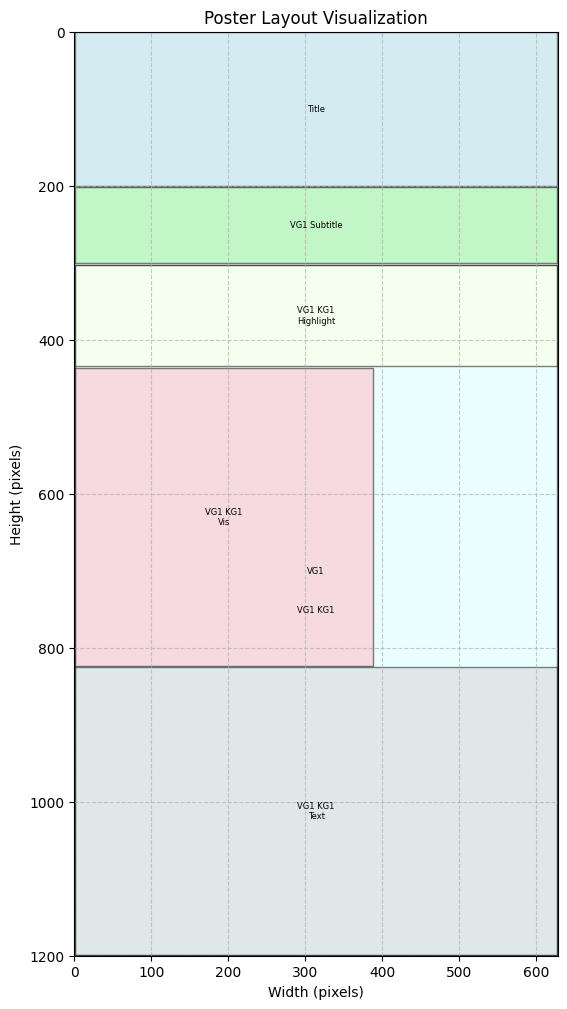

In [232]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

### 2 VGs test

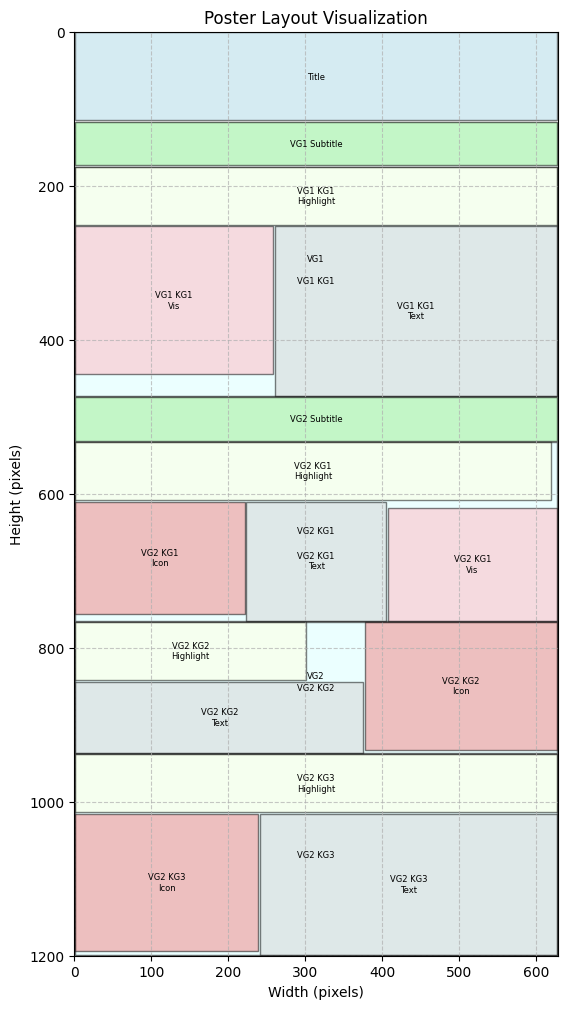

In [233]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

### 3 VGs test

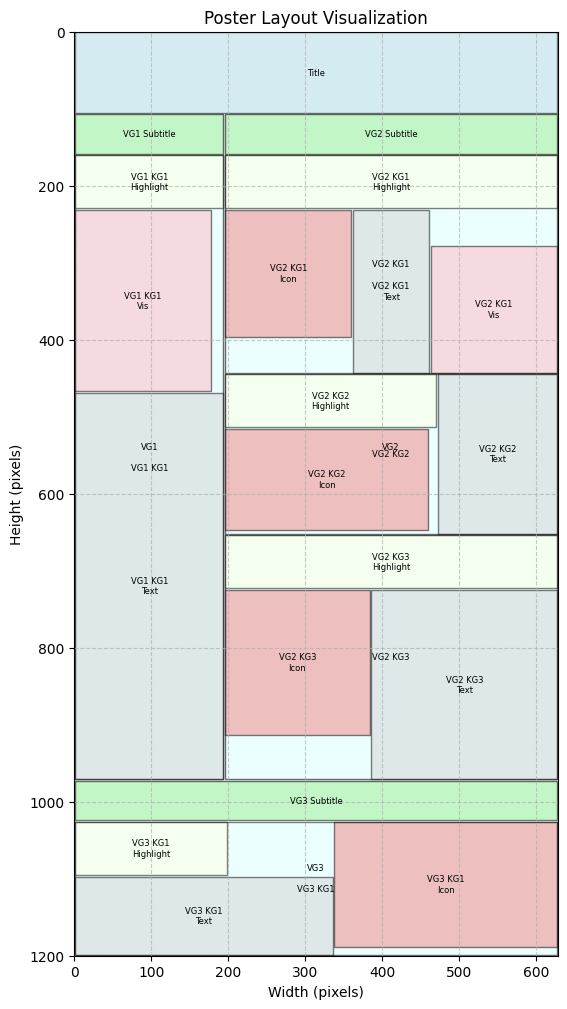

In [234]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

### 4 VGs test

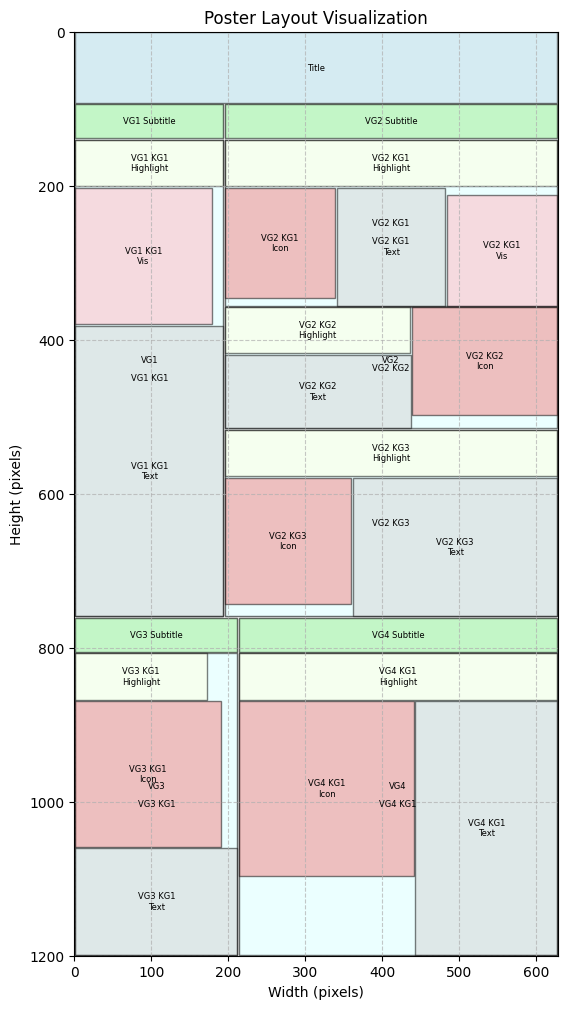

In [235]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 4: Lesser-known Valentine's Day gift traditions
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        }
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

### 5 VGs test

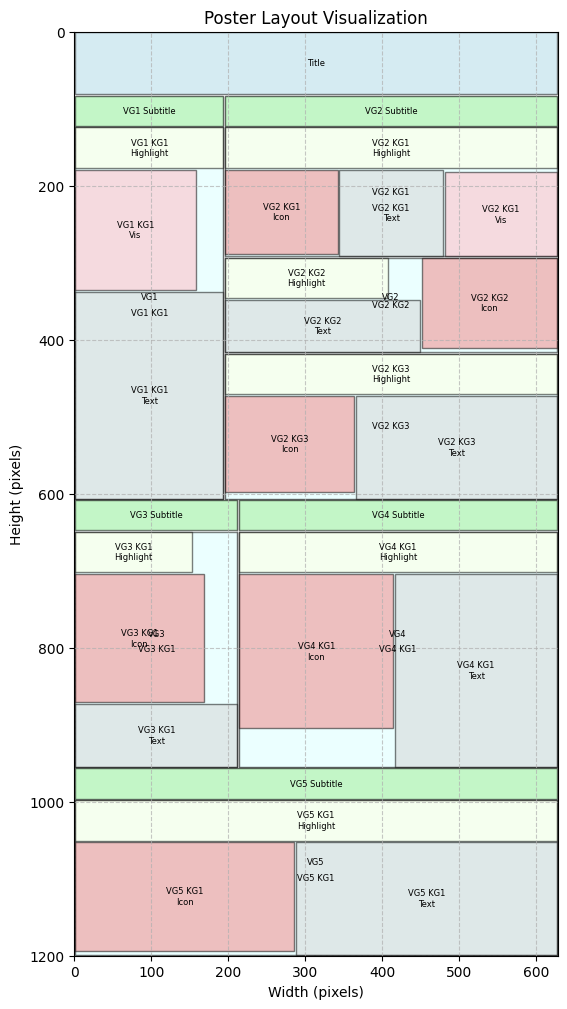

In [236]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 4: Lesser-known Valentine's Day gift traditions
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        }
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

### 6 VGs test

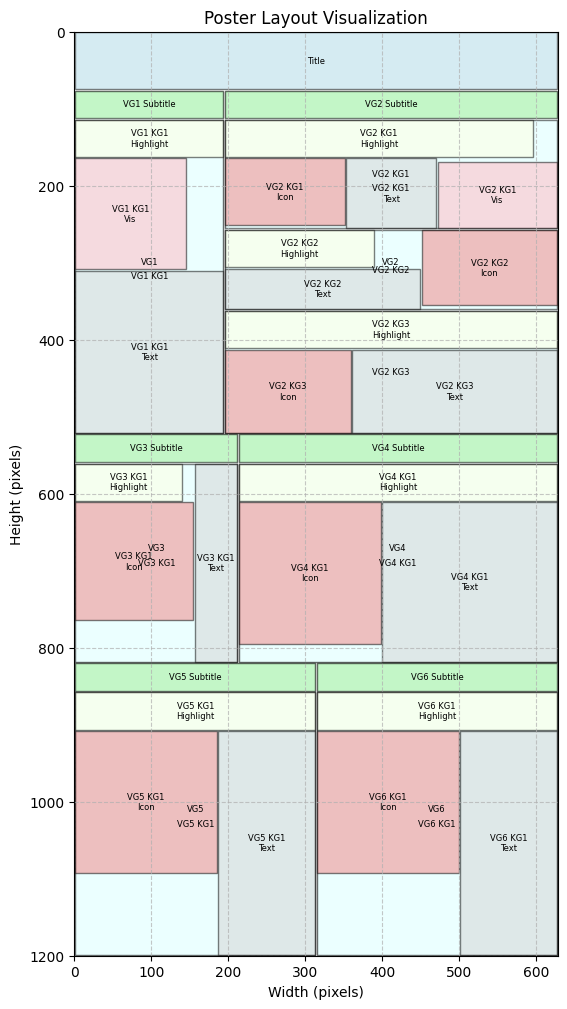

In [237]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 4: Lesser-known Valentine's Day gift traditions
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        }
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

### 7 VGs test

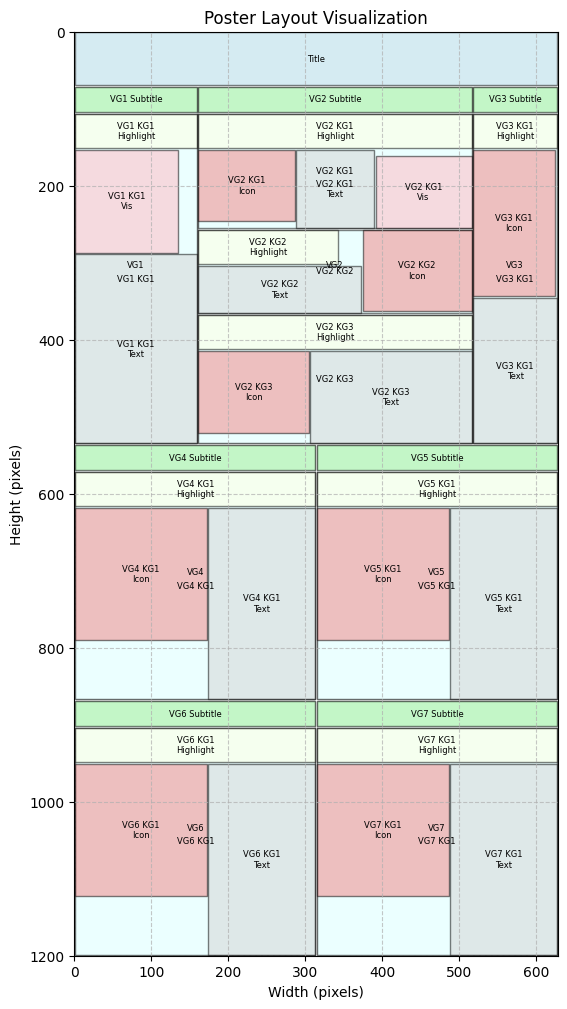

In [238]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 4: Lesser-known Valentine's Day gift traditions
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        }
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

### 8 VGs test

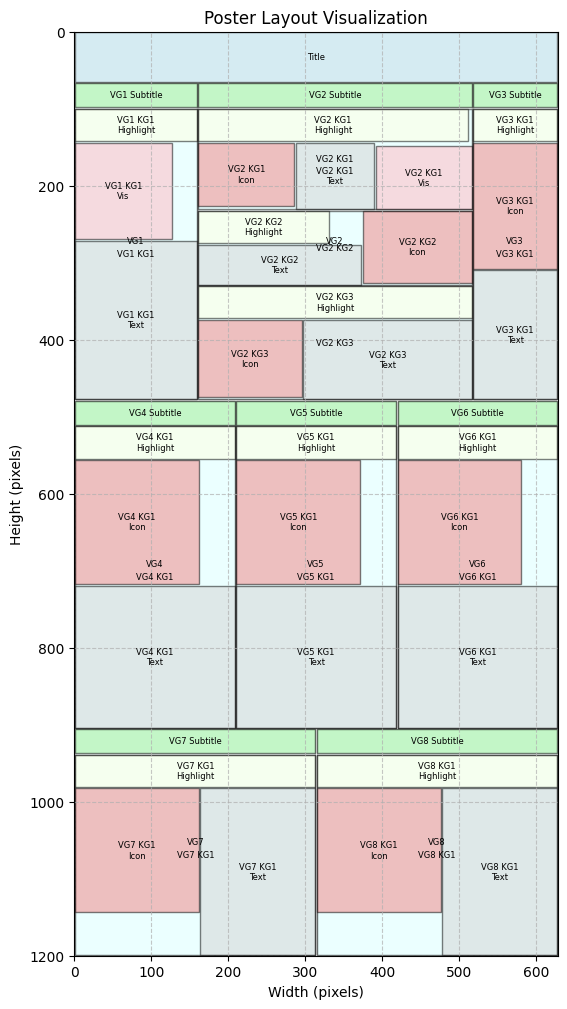

In [239]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 4: Lesser-known Valentine's Day gift traditions
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        }
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

### 9 VGs test

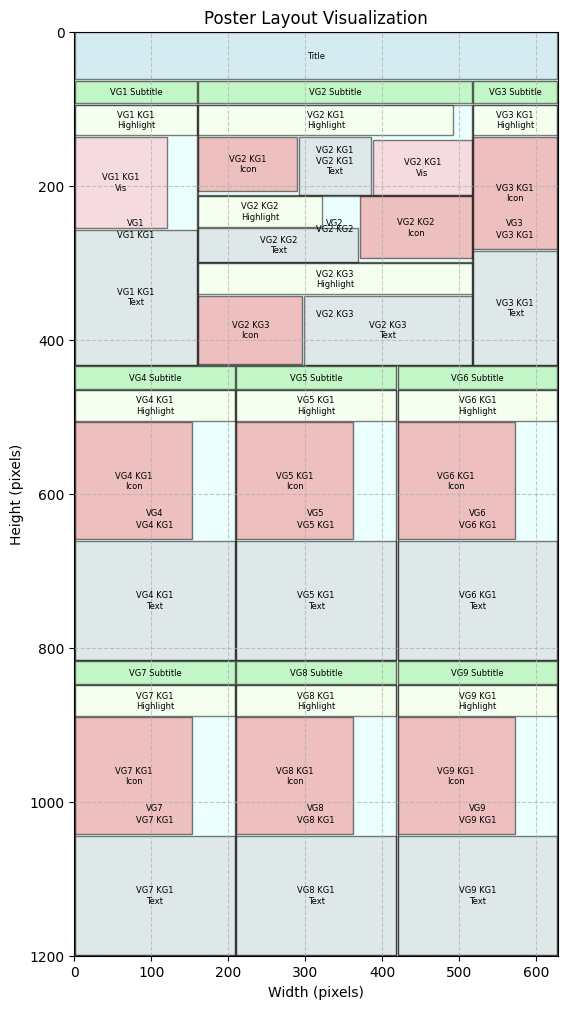

In [240]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 4: Lesser-known Valentine's Day gift traditions
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        }
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

### 10 VGs test

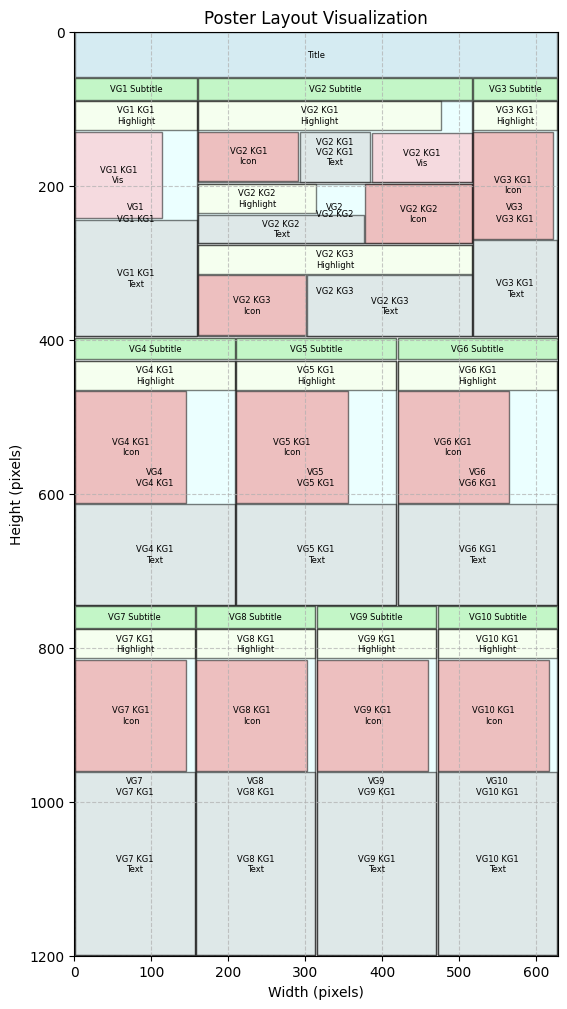

In [241]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 4: Lesser-known Valentine's Day gift traditions
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        }
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

## grid + protrait

In [ ]:
# from math import sqrt

# def layout_poster(valentine_data, W, H, margin=0, vertical_margin=0):
#     """
#     Lays out a poster with a title, Super Groups (SGs) containing Visual Groups (VGs),
#     and Knowledge Groups (KGs) within VGs. VGs within an SG have widths proportional to their content areas.
    
#     Args:
#         valentine_data: Dictionary containing "data" with VGs, each having "knowledges".
#         W: Poster width (float).
#         H: Poster height (float).
#         margin: Horizontal margin for KGs in VGs with multiple KGs (float, default=0).
#         vertical_margin: Vertical spacing between KGs (float, default=0).
    
#     Returns:
#         Dictionary mapping element keys to their coordinates (as lists of [x, y] points).
#         Excludes Text coordinates.
#     """
#     # Character width-to-height ratios
#     def calculate_text_width(string, font_height):
#         ratios = {
#             'B': 0.5, 'E': 0.5, 'F': 0.5, 'J': 0.5, 'L': 0.5, 'P': 0.5, 'S': 0.5,
#             'A': 0.8889, 'D': 0.8889, 'H': 0.8889, 'K': 0.8889, 'N': 0.8889,
#             'R': 0.8889, 'T': 0.8889, 'U': 0.8889, 'V': 0.8889, 'X': 0.8889,
#             'Y': 0.8889, 'Z': 0.8889, 'C': 1.0, 'G': 1.0, 'O': 1.0, 'Q': 1.0,
#             'M': 1.1111, 'W': 1.1111, 'b': 0.5, 'd': 0.5, 'f': 0.5, 'h': 0.5,
#             'k': 0.5, 'l': 0.5, 't': 0.5, 'c': 1.0, 'e': 1.0, 'o': 1.0, 's': 1.0,
#             'a': 0.7, 'g': 0.7, 'n': 0.7, 'p': 0.7, 'q': 0.7, 'r': 0.7, 'u': 0.7,
#             'v': 0.7, 'w': 0.7, 'x': 0.7, 'y': 0.7, 'z': 0.7, ' ': 0.4
#         }
#         return sum(ratios.get(char, 0.7) * font_height for char in string)

#     ### BEGIN ADDED CODE ###
#     # Helper function to calculate area of a rectangle
#     def calculate_area(x1, y1, x2, y2):
#         return (x2 - x1) * (y2 - y1)
#     ### END ADDED CODE ###

#     # Helper function to define SG structure based on number of VGs
#     def get_sg_structure(n_VG):
#         if n_VG == 1:
#             return [[0]]
#         elif n_VG == 2:
#             return [[0], [1]]
#         elif n_VG == 3:
#             return [[0], [1, 2]]
#         elif n_VG == 4:
#             return [[0], [1, 2, 3]]
#         elif n_VG == 5:
#             return [[0], [1, 2, 3], [4]]
#         elif n_VG == 6:
#             return [[0], [1, 2], [3, 4], [5]]
#         elif n_VG == 7:
#             return [[0], [1, 2, 3], [4, 5], [6]]
#         elif n_VG == 8:
#             return [[0], [1, 2, 3], [4, 5, 6], [7]]
#         elif n_VG == 9:
#             return [[0], [1, 2, 3], [4, 5], [6, 7], [8]]
#         elif n_VG == 10:
#             return [[0], [1, 2, 3], [4, 5], [6, 7, 8], [9]]
#         else:
#             raise ValueError("Unsupported number of VGs (must be 1 to 10)")

#     VGs = valentine_data["data"]
#     n_VG = len(VGs)
#     sg_structure = get_sg_structure(n_VG)
#     n_SG = len(sg_structure)

#     # Calculate coefficients for the quadratic equation b * x^2 + a * x + c - H * W = 0
#     a = 3.0 * W + 1.5 * n_SG * W  # Title (3x * W) + Subtitles (1.5x * W per VG)
#     b = 0.0  # Area coefficient
#     c = -H * W  # Target poster area

#     # Compute b and vg_areas
#     vg_areas = []
#     for VG in VGs:
#         knowledges = VG["knowledges"]
#         sum_s_KG = 0.0
#         for KG in knowledges:
#             text = KG["knowledge_content"]
#             highlight = KG["first_level_highlight"]
#             n_images = (1 if (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None ) else 0) + (1 if KG["visualization"]["is_visualization"] else 0)
#             s_text = calculate_text_width(text, 1.0)
#             s_highlight = calculate_text_width(highlight, 1.0)
#             s_KG = s_text + 4 * s_highlight + s_text * n_images
#             sum_s_KG += s_KG
#             b += s_KG  # Add to total area coefficient
#         vg_areas.append(sum_s_KG)

#     # Add vertical margins to c
#     for VG in VGs:
#         n_KG = len(VG["knowledges"])
#         if n_KG > 1:
#             c += (n_KG - 1) * vertical_margin * W

#     # Solve b * x^2 + a * x + c = 0
#     discriminant = a**2 - 4 * b * c
#     if discriminant < 0:
#         raise ValueError("No solution for font size x")
#     x = (-a + sqrt(discriminant)) / (2 * b) if b != 0 else -c / a
#     if x <= 0:
#         raise ValueError("Invalid font size x")

#     # Layout the poster
#     layout = {}
#     layout["Title"] = [[0.0, 0.0], [W, 0.0], [0.0, 3.0 * x], [W, 3.0 * x]]
#     y = 3.0 * x  # Start below title

#     for sg in sg_structure:
#         n_VG_in_SG = len(sg)
#         total_area_in_sg = sum(vg_areas[i] for i in sg) if sg else 0.0
#         vg_heights = []

#         x_VG_start = 0.0
#         for vg_idx in sg:
#             VG = VGs[vg_idx]
#             knowledges = VG["knowledges"]
#             n_KG = len(knowledges)
#             w_VG = W * (vg_areas[vg_idx] / total_area_in_sg) if total_area_in_sg > 0 else W
#             kg_width = w_VG if n_KG == 1 else w_VG - 2 * margin
#             kg_x = x_VG_start if n_KG == 1 else x_VG_start + margin

#             VG_key = f"VG{vg_idx + 1}"
#             layout[VG_key] = {}

#             # Subtitle
#             y_VG_start = y
#             layout[VG_key]["Subtitle"] = [
#                 [x_VG_start, y], [x_VG_start + w_VG, y],
#                 [x_VG_start, y + 1.5 * x], [x_VG_start + w_VG, y + 1.5 * x]
#             ]
#             y_VG = y + 1.5 * x
#             if n_KG > 1:
#                 y_VG += vertical_margin

#             # Layout KGs within VG
#             for j, KG in enumerate(knowledges, 1):
#                 text = KG["knowledge_content"]
#                 highlight = KG["first_level_highlight"]
#                 has_icon = (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None )
#                 has_vis = KG["visualization"]["is_visualization"]

#                 A_text = x * calculate_text_width(text, x)
#                 A_highlight = 2.0 * x * calculate_text_width(highlight, 2.0 * x)
#                 A_icon = x * calculate_text_width(text, x) if has_icon else 0.0
#                 A_vis = x * calculate_text_width(text, x) if has_vis else 0.0
#                 A_KG = A_text + A_highlight + A_icon + A_vis
#                 h_KG = A_KG / kg_width if kg_width > 0 else 0.0

#                 KG_key = f"KG{j}"
#                 layout[VG_key][KG_key] = {}
#                 layout[VG_key][KG_key]["coords"] = [
#                     [kg_x, y_VG], [kg_x + kg_width, y_VG],
#                     [kg_x, y_VG + h_KG], [kg_x + kg_width, y_VG + h_KG]
#                 ]

#                 y_KG = y_VG
#                 h_highlight = 2.0 * x
#                 w_highlight = min(calculate_text_width(highlight, 2.0 * x), kg_width)
#                 layout[VG_key][KG_key]["Highlight"] = [
#                     [kg_x, y_KG], [kg_x + w_highlight, y_KG],
#                     [kg_x, y_KG + h_highlight], [kg_x + w_highlight, y_KG + h_highlight]
#                 ]
#                 layout[VG_key][KG_key]["Icon"] = None
#                 layout[VG_key][KG_key]["Vis"] = None

#                 # Image placement functions (unchanged)
#                 aspect_ratios = [1.0, 1.333, 0.75, 1.5, 0.667, 1.777, 0.562, 0.5, 2.0, 1.4, 0.714, 0.8, 1.25, 0.6, 1.667]

#                 def try_placement_a(r, A_img):
#                     w_img = sqrt(A_img * r)
#                     h_img = sqrt(A_img / r)
#                     x1 = kg_x + kg_width - w_img
#                     y1 = y_KG
#                     x2 = kg_x + kg_width
#                     y2 = y_KG + h_img
#                     coords = [[x1, y1], [x2, y1], [x1, y2], [x2, y2]]
#                     overflow_area = 0
#                     if y2 > y_KG + h_KG:
#                         overflow_area += (y2 - (y_KG + h_KG)) * w_img
#                     if x1 < kg_x + w_highlight:
#                         overlap_area = (min(x2, kg_x + w_highlight) - x1) * h_img if x2 > kg_x + w_highlight else w_img * h_img
#                         overflow_area += overlap_area
#                     return True if overflow_area == 0 else False, coords, overflow_area

#                 def try_placement_b(r, A_img):
#                     w_img = sqrt(A_img * r)
#                     h_img = sqrt(A_img / r)
#                     x1 = kg_x
#                     y1 = y_KG + h_highlight
#                     x2 = kg_x + w_img
#                     y2 = y_KG + h_highlight + h_img
#                     coords = [[x1, y1], [x2, y1], [x1, y2], [x2, y2]]
#                     overflow_area = 0
#                     if y2 > y_KG + h_KG:
#                         overflow_area += (y2 - (y_KG + h_KG)) * w_img
#                     if x2 > kg_x + kg_width:
#                         overflow_area += (x2 - (kg_x + kg_width)) * h_img
#                     return True if overflow_area == 0 else False, coords, overflow_area

#                 def try_combination_1(r_a, r_b):
#                     w_a = sqrt(A_icon * r_a)
#                     h_a = sqrt(A_icon / r_a)
#                     w_b = sqrt(A_vis * r_b)
#                     h_b = sqrt(A_vis / r_b)
#                     x1_a = kg_x + kg_width - w_a
#                     y1_a = y_KG
#                     x2_a = kg_x + kg_width
#                     y2_a = y_KG + h_a
#                     coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
#                     x1_b = kg_x + kg_width - w_a - w_b
#                     y1_b = y_KG
#                     x2_b = kg_x + kg_width - w_a
#                     y2_b = y_KG + h_b
#                     coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
#                     overflow_area = 0
#                     if y2_a > y_KG + h_KG:
#                         overflow_area += (y2_a - (y_KG + h_KG)) * w_a
#                     if y2_b > y_KG + h_KG:
#                         overflow_area += (y2_b - (y_KG + h_KG)) * w_b
#                     if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
#                         overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
#                         overflow_area += overlap_area
#                     if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
#                         overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight)
#                         overflow_area += overlap_area
#                     return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

#                 def try_combination_2(r_a, r_b):
#                     w_a = sqrt(A_icon * r_a)
#                     h_a = sqrt(A_icon / r_a)
#                     w_b = sqrt(A_vis * r_b)
#                     h_b = sqrt(A_vis / r_b)
#                     x1_a = kg_x + kg_width - w_a
#                     y1_a = y_KG
#                     x2_a = kg_x + kg_width
#                     y2_a = y_KG + h_a
#                     coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
#                     x1_b = kg_x
#                     y1_b = y_KG + h_highlight
#                     x2_b = kg_x + w_b
#                     y2_b = y_KG + h_highlight + h_b
#                     coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
#                     overflow_area = 0
#                     if y2_a > y_KG + h_KG:
#                         overflow_area += (y2_a - (y_KG + h_KG)) * w_a
#                     if y2_b > y_KG + h_KG:
#                         overflow_area += (y2_b - (y_KG + h_KG)) * w_b
#                     if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
#                         overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
#                         overflow_area += overlap_area
#                     if x2_b > kg_x + kg_width:
#                         overflow_area += (x2_b - (kg_x + kg_width)) * h_b
#                     return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

#                 def try_combination_3(r_a, r_b):
#                     w_a = sqrt(A_icon * r_a)
#                     h_a = sqrt(A_icon / r_a)
#                     w_b = sqrt(A_vis * r_b)
#                     h_b = sqrt(A_vis / r_b)
#                     x1_a = kg_x + kg_width - w_a
#                     y1_a = y_KG
#                     x2_a = kg_x + kg_width
#                     y2_a = y_KG + h_a
#                     coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
#                     x1_b = kg_x + kg_width - w_b
#                     y1_b = y_KG + h_a
#                     x2_b = kg_x + kg_width
#                     y2_b = y_KG + h_a + h_b
#                     coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
#                     overflow_area = 0
#                     if y2_a > y_KG + h_KG:
#                         overflow_area += (y2_a - (y_KG + h_KG)) * w_a
#                     if y2_b > y_KG + h_KG:
#                         overflow_area += (y2_b - (y_KG + h_KG)) * w_b
#                     if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
#                         overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
#                         overflow_area += overlap_area
#                     if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
#                         overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight - (y1_b - y_KG)) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight - (y1_b - y_KG))
#                         overflow_area += overlap_area
#                     return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

#                 def try_combination_4(r_a, r_b):
#                     w_a = sqrt(A_icon * r_a)
#                     h_a = sqrt(A_icon / r_a)
#                     w_b = sqrt(A_vis * r_b)
#                     h_b = sqrt(A_vis / r_b)
                    
#                     # Image A (Icon): Bottom-left, below highlight
#                     x1_a = kg_x
#                     y1_a = y_KG + h_highlight
#                     x2_a = kg_x + w_a
#                     y2_a = y_KG + h_highlight + h_a
#                     coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
                    
#                     # Image B (Visualization): Bottom-right
#                     x1_b = kg_x + kg_width - w_b
#                     y1_b = y_KG + h_KG - h_b
#                     x2_b = kg_x + kg_width
#                     y2_b = y_KG + h_KG
#                     coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
                    
#                     overflow_area = 0
                    
#                     # Image A overflow checks
#                     if y2_a > y_KG + h_KG:  # Exceeds KG bottom
#                         overflow_area += (y2_a - (y_KG + h_KG)) * w_a
#                     if x2_a > kg_x + kg_width:  # Exceeds KG right
#                         overflow_area += (x2_a - (kg_x + kg_width)) * h_a
                    
#                     # Image B overflow checks
#                     if x1_b < kg_x:  # Exceeds KG left
#                         overflow_area += (kg_x - x1_b) * h_b
#                     if y1_b < y_KG:  # Exceeds KG top
#                         overflow_area += (y_KG - y1_b) * w_b
#                     if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:  # Overlaps highlight
#                         overlap_width = (min(x2_b, kg_x + w_highlight) - x1_b) if x2_b > kg_x + w_highlight else w_b
#                         overlap_height = min(h_b, h_highlight - (y1_b - y_KG))
#                         overlap_area = overlap_width * overlap_height
#                         overflow_area += overlap_area
                    
#                     return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

#                 if has_icon and has_vis:
#                     min_overflow = float('inf')
#                     best_layout = None
#                     combination_funcs = [try_combination_1, try_combination_2, try_combination_3, try_combination_4]
#                     for idx, comb in enumerate(combination_funcs):
#                         for r_a in aspect_ratios:
#                             for r_b in aspect_ratios:
#                                 fit, coords_a, coords_b, overflow = comb(r_a, r_b)
#                                 if fit:
#                                     layout[VG_key][KG_key]["Icon"] = coords_a
#                                     layout[VG_key][KG_key]["Vis"] = coords_b
#                                     min_overflow = 0
#                                     break
#                                 if overflow < min_overflow:
#                                     min_overflow = overflow
#                                     best_layout = (coords_a, coords_b, r_a, r_b, idx)
#                             if min_overflow == 0:
#                                 break
#                         if min_overflow == 0:
#                             break
#                     if min_overflow > 0:
#                         coords_a, coords_b, r_a, r_b, comb_idx = best_layout
#                         w_a = sqrt(A_icon * r_a)
#                         h_a = sqrt(A_icon / r_a)
#                         x1_a, y1_a = coords_a[0]
#                         x2_a, y2_a = coords_a[3]
#                         w_b = sqrt(A_vis * r_b)
#                         h_b = sqrt(A_vis / r_b)
#                         x1_b, y1_b = coords_b[0]
#                         x2_b, y2_b = coords_b[3]
#                         if comb_idx == 0:
#                             if x1_a < kg_x + w_highlight:
#                                 w_a = kg_width - (kg_x + w_highlight - x1_a)
#                             if y2_a > y_KG + h_KG:
#                                 h_a = h_KG - (y1_a - y_KG)
#                             w_a_new = min(w_a, h_a * r_a)
#                             h_a_new = w_a_new / r_a
#                             coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
#                             if x1_b < kg_x + w_highlight:
#                                 w_b = kg_width - (kg_x + w_highlight - x1_b)
#                             if y2_b > y_KG + h_KG:
#                                 h_b = h_KG - (y1_b - y_KG)
#                             w_b_new = min(w_b, h_b * r_b)
#                             h_b_new = w_b_new / r_b
#                             coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
#                         elif comb_idx == 1:
#                             if x1_a < kg_x + w_highlight:
#                                 w_a = kg_width - (kg_x + w_highlight - x1_a)
#                             if y2_a > y_KG + h_KG:
#                                 h_a = h_KG - (y1_a - y_KG)
#                             w_a_new = min(w_a, h_a * r_a)
#                             h_a_new = w_a_new / r_a
#                             coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
#                             if x2_b > kg_x + kg_width:
#                                 w_b = kg_width - (x1_b - kg_x)
#                             if y2_b > y_KG + h_KG:
#                                 h_b = h_KG - (y1_b - y_KG)
#                             w_b_new = min(w_b, h_b * r_b)
#                             h_b_new = w_b_new / r_b
#                             coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
#                         elif comb_idx == 2:
#                             if x1_a < kg_x + w_highlight:
#                                 w_a = kg_width - (kg_x + w_highlight - x1_a)
#                             if y2_a > y_KG + h_KG:
#                                 h_a = h_KG - (y1_a - y_KG)
#                             w_a_new = min(w_a, h_a * r_a)
#                             h_a_new = w_a_new / r_a
#                             coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
#                             if x1_b < kg_x + w_highlight:
#                                 w_b = kg_width - (kg_x + w_highlight - x1_b)
#                             if y2_b > y_KG + h_KG:
#                                 h_b = h_KG - (y1_b - y_KG)
#                             w_b_new = min(w_b, h_b * r_b)
#                             h_b_new = w_b_new / r_b
#                             coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
#                         elif comb_idx == 3:
#                             # Image A: Adjust for right and bottom overflow
#                             if x2_a > kg_x + kg_width:
#                                 w_a = kg_width - (x1_a - kg_x)  # w_a = kg_width since x1_a = kg_x
#                             if y2_a > y_KG + h_KG:
#                                 h_a = h_KG - (y1_a - y_KG)     # h_a = h_KG - h_highlight since y1_a = y_KG + h_highlight
#                             w_a_new = min(w_a, h_a * r_a)
#                             h_a_new = w_a_new / r_a
#                             coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
                            
#                             # Image B: Adjust for left, top, and highlight overlap, anchored at (x2_b, y2_b)
#                             if x1_b < kg_x:  # Left boundary overflow
#                                 w_b = kg_width
#                             if y1_b < y_KG:  # Top boundary overflow
#                                 h_b = h_KG
#                             if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:  # Highlight overlap
#                                 ratio_x = (kg_width - w_highlight) / w_b  # Ratio to make x1_b = kg_x + w_highlight
#                                 ratio_y = (h_KG - h_highlight) / h_b      # Ratio to make y1_b = y_KG + h_highlight
#                                 scale = max(ratio_x, ratio_y)             # Use the smaller ratio to satisfy both
#                                 w_b_new = w_b * scale
#                                 h_b_new = h_b * scale
#                             else:
#                                 w_b_new = w_b
#                                 h_b_new = h_b
#                             # Recalculate coordinates with anchor at (x2_b, y2_b)
#                             x1_b_new = x2_b - w_b_new
#                             y1_b_new = y2_b - h_b_new
#                             coords_b = [[x1_b_new, y1_b_new], [x2_b, y1_b_new], [x1_b_new, y2_b], [x2_b, y2_b]]
#                         layout[VG_key][KG_key]["Icon"] = coords_a
#                         layout[VG_key][KG_key]["Vis"] = coords_b

#                 elif has_icon:
#                     min_overflow = float('inf')
#                     best_layout = None
#                     placement_funcs = [try_placement_a, try_placement_b]
#                     for idx, placement in enumerate(placement_funcs):
#                         for r in aspect_ratios:
#                             fit, coords, overflow = placement(r, A_icon)
#                             if fit:
#                                 layout[VG_key][KG_key]["Icon"] = coords
#                                 min_overflow = 0
#                                 break
#                             if overflow < min_overflow:
#                                 min_overflow = overflow
#                                 best_layout = (coords, r, idx)
#                         if min_overflow == 0:
#                             break
#                     if min_overflow > 0:
#                         coords, r, placement_idx = best_layout
#                         w_img = sqrt(A_icon * r)
#                         h_img = sqrt(A_icon / r)
#                         x1, y1 = coords[0]
#                         x2, y2 = coords[3]
#                         if placement_idx == 0:
#                             if x1 < kg_x + w_highlight:
#                                 w_img = kg_width - (kg_x + w_highlight - x1)
#                             if y2 > y_KG + h_KG:
#                                 h_img = h_KG - (y1 - y_KG)
#                         elif placement_idx == 1:
#                             if x2 > kg_x + kg_width:
#                                 w_img = kg_width - (x1 - kg_x)
#                             if y2 > y_KG + h_KG:
#                                 h_img = h_KG - (y1 - y_KG)
#                         w_img_new = min(w_img, h_img * r)
#                         h_img_new = w_img_new / r
#                         layout[VG_key][KG_key]["Icon"] = [
#                             [x1, y1], [x1 + w_img_new, y1],
#                             [x1, y1 + h_img_new], [x1 + w_img_new, y1 + h_img_new]
#                         ]

#                 elif has_vis:
#                     min_overflow = float('inf')
#                     best_layout = None
#                     placement_funcs = [try_placement_a, try_placement_b]
#                     for idx, placement in enumerate(placement_funcs):
#                         for r in aspect_ratios:
#                             fit, coords, overflow = placement(r, A_vis)
#                             if fit:
#                                 layout[VG_key][KG_key]["Vis"] = coords
#                                 min_overflow = 0
#                                 break
#                             if overflow < min_overflow:
#                                 min_overflow = overflow
#                                 best_layout = (coords, r, idx)
#                         if min_overflow == 0:
#                             break
#                     if min_overflow > 0:
#                         coords, r, placement_idx = best_layout
#                         w_img = sqrt(A_vis * r)
#                         h_img = sqrt(A_vis / r)
#                         x1, y1 = coords[0]
#                         x2, y2 = coords[3]
#                         if placement_idx == 0:
#                             if x1 < kg_x + w_highlight:
#                                 w_img = kg_width - (kg_x + w_highlight - x1)
#                             if y2 > y_KG + h_KG:
#                                 h_img = h_KG - (y1 - y_KG)
#                         elif placement_idx == 1:
#                             if x2 > kg_x + kg_width:
#                                 w_img = kg_width - (x1 - kg_x)
#                             if y2 > y_KG + h_KG:
#                                 h_img = h_KG - (y1 - y_KG)
#                         w_img_new = min(w_img, h_img * r)
#                         h_img_new = w_img_new / r
#                         layout[VG_key][KG_key]["Vis"] = [
#                             [x1, y1], [x1 + w_img_new, y1],
#                             [x1, y1 + h_img_new], [x1 + w_img_new, y1 + h_img_new]
#                         ]

#                 y_VG += h_KG
#                 if j < n_KG:
#                     y_VG += vertical_margin

#             h_VG = y_VG - y_VG_start
#             vg_heights.append(h_VG)
#             x_VG_start += w_VG

#         h_SG = max(vg_heights) if vg_heights else 0.0
#         x_VG_start = 0.0
#         for vg_idx in sg:
#             VG_key = f"VG{vg_idx + 1}"
#             w_VG = W * (vg_areas[vg_idx] / total_area_in_sg) if total_area_in_sg > 0 else W
#             layout[VG_key]["coords"] = [
#                 [x_VG_start, y], [x_VG_start + w_VG, y],
#                 [x_VG_start, y + h_SG], [x_VG_start + w_VG, y + h_SG]
#             ]
#             x_VG_start += w_VG

#         y += h_SG

#     return layout

In [242]:
from math import sqrt

def layout_poster(valentine_data, W, H, margin=0, vertical_margin=0):
    """
    Lays out a poster with a title, Super Groups (SGs) containing Visual Groups (VGs),
    and Knowledge Groups (KGs) within VGs. VGs within an SG have widths proportional to their content areas.
    
    Args:
        valentine_data: Dictionary containing "data" with VGs, each having "knowledges".
        W: Poster width (float).
        H: Poster height (float).
        margin: Horizontal margin for KGs in VGs with multiple KGs (float, default=0).
        vertical_margin: Vertical spacing between KGs (float, default=0).
    
    Returns:
        Dictionary mapping element keys to their coordinates (as lists of [x, y] points).
        Now includes Text coordinates for each KG.
    """
    # Character width-to-height ratios
    def calculate_text_width(string, font_height):
        ratios = {
            'B': 0.5, 'E': 0.5, 'F': 0.5, 'J': 0.5, 'L': 0.5, 'P': 0.5, 'S': 0.5,
            'A': 0.8889, 'D': 0.8889, 'H': 0.8889, 'K': 0.8889, 'N': 0.8889,
            'R': 0.8889, 'T': 0.8889, 'U': 0.8889, 'V': 0.8889, 'X': 0.8889,
            'Y': 0.8889, 'Z': 0.8889, 'C': 1.0, 'G': 1.0, 'O': 1.0, 'Q': 1.0,
            'M': 1.1111, 'W': 1.1111, 'b': 0.5, 'd': 0.5, 'f': 0.5, 'h': 0.5,
            'k': 0.5, 'l': 0.5, 't': 0.5, 'c': 1.0, 'e': 1.0, 'o': 1.0, 's': 1.0,
            'a': 0.7, 'g': 0.7, 'n': 0.7, 'p': 0.7, 'q': 0.7, 'r': 0.7, 'u': 0.7,
            'v': 0.7, 'w': 0.7, 'x': 0.7, 'y': 0.7, 'z': 0.7, ' ': 0.4
        }
        return sum(ratios.get(char, 0.7) * font_height for char in string)

    # Helper function to calculate area of a rectangle
    def calculate_area(x1, y1, x2, y2):
        return (x2 - x1) * (y2 - y1)

    # Helper function to define SG structure based on number of VGs
    def get_sg_structure(n_VG):
        if n_VG == 1:
            return [[0]]
        elif n_VG == 2:
            return [[0], [1]]
        elif n_VG == 3:
            return [[0], [1, 2]]
        elif n_VG == 4:
            return [[0], [1, 2, 3]]
        elif n_VG == 5:
            return [[0], [1, 2, 3], [4]]
        elif n_VG == 6:
            return [[0], [1, 2], [3, 4], [5]]
        elif n_VG == 7:
            return [[0], [1, 2, 3], [4, 5], [6]]
        elif n_VG == 8:
            return [[0], [1, 2, 3], [4, 5, 6], [7]]
        elif n_VG == 9:
            return [[0], [1, 2, 3], [4, 5], [6, 7], [8]]
        elif n_VG == 10:
            return [[0], [1, 2, 3], [4, 5], [6, 7, 8], [9]]
        else:
            raise ValueError("Unsupported number of VGs (must be 1 to 10)")

    VGs = valentine_data["data"]
    n_VG = len(VGs)
    sg_structure = get_sg_structure(n_VG)
    n_SG = len(sg_structure)

    # Calculate coefficients for the quadratic equation b * x^2 + a * x + c - H * W = 0
    a = 3.0 * W + 1.5 * n_SG * W  # Title (3x * W) + Subtitles (1.5x * W per VG)
    b = 0.0  # Area coefficient
    c = -H * W  # Target poster area

    # Compute b and vg_areas
    vg_areas = []
    for VG in VGs:
        knowledges = VG["knowledges"]
        sum_s_KG = 0.0
        for KG in knowledges:
            text = KG["knowledge_content"]
            highlight = KG["first_level_highlight"]
            n_images = (1 if (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None ) else 0) + (1 if KG["visualization"]["is_visualization"] else 0)
            s_text = calculate_text_width(text, 1.0)
            s_highlight = calculate_text_width(highlight, 1.0)
            s_KG = s_text + 4 * s_highlight + s_text * n_images
            sum_s_KG += s_KG
            b += s_KG  # Add to total area coefficient
        vg_areas.append(sum_s_KG)

    # Add vertical margins to c
    for VG in VGs:
        n_KG = len(VG["knowledges"])
        if n_KG > 1:
            c += (n_KG - 1) * vertical_margin * W

    # Solve b * x^2 + a * x + c = 0
    discriminant = a**2 - 4 * b * c
    if discriminant < 0:
        raise ValueError("No solution for font size x")
    x = (-a + sqrt(discriminant)) / (2 * b) if b != 0 else -c / a
    if x <= 0:
        raise ValueError("Invalid font size x")

    # Layout the poster
    layout = {}
    layout["Title"] = [[0.0, 0.0], [W, 0.0], [0.0, 3.0 * x], [W, 3.0 * x]]
    y = 3.0 * x  # Start below title

    for sg in sg_structure:
        n_VG_in_SG = len(sg)
        total_area_in_sg = sum(vg_areas[i] for i in sg) if sg else 0.0
        vg_heights = []

        x_VG_start = 0.0
        for vg_idx in sg:
            VG = VGs[vg_idx]
            knowledges = VG["knowledges"]
            n_KG = len(knowledges)
            w_VG = W * (vg_areas[vg_idx] / total_area_in_sg) if total_area_in_sg > 0 else W
            kg_width = w_VG if n_KG == 1 else w_VG - 2 * margin
            kg_x = x_VG_start if n_KG == 1 else x_VG_start + margin

            VG_key = f"VG{vg_idx + 1}"
            layout[VG_key] = {}

            # Subtitle
            y_VG_start = y
            layout[VG_key]["Subtitle"] = [
                [x_VG_start, y], [x_VG_start + w_VG, y],
                [x_VG_start, y + 1.5 * x], [x_VG_start + w_VG, y + 1.5 * x]
            ]
            y_VG = y + 1.5 * x
            if n_KG > 1:
                y_VG += vertical_margin

            # Layout KGs within VG
            for j, KG in enumerate(knowledges, 1):
                text = KG["knowledge_content"]
                highlight = KG["first_level_highlight"]
                has_icon = (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None )
                has_vis = KG["visualization"]["is_visualization"]

                A_text = x * calculate_text_width(text, x)
                A_highlight = 2.0 * x * calculate_text_width(highlight, 2.0 * x)
                A_icon = x * calculate_text_width(text, x) if has_icon else 0.0
                A_vis = x * calculate_text_width(text, x) if has_vis else 0.0
                A_KG = A_text + A_highlight + A_icon + A_vis
                h_KG = A_KG / kg_width if kg_width > 0 else 0.0

                KG_key = f"KG{j}"
                layout[VG_key][KG_key] = {}
                layout[VG_key][KG_key]["coords"] = [
                    [kg_x, y_VG], [kg_x + kg_width, y_VG],
                    [kg_x, y_VG + h_KG], [kg_x + kg_width, y_VG + h_KG]
                ]
                layout[VG_key][KG_key]["placement_type"] = "none"  # Initialize placement type

                y_KG = y_VG
                h_highlight = 2.0 * x
                w_highlight = min(calculate_text_width(highlight, 2.0 * x), kg_width)
                layout[VG_key][KG_key]["Highlight"] = [
                    [kg_x, y_KG], [kg_x + w_highlight, y_KG],
                    [kg_x, y_KG + h_highlight], [kg_x + w_highlight, y_KG + h_highlight]
                ]
                layout[VG_key][KG_key]["Icon"] = None
                layout[VG_key][KG_key]["Vis"] = None

                # Image placement functions
                aspect_ratios = [1.0, 1.333, 0.75, 1.5, 0.667, 1.777, 0.562, 0.5, 2.0, 1.4, 0.714, 0.8, 1.25, 0.6, 1.667]

                def try_placement_a(r, A_img):
                    w_img = sqrt(A_img * r)
                    h_img = sqrt(A_img / r)
                    x1 = kg_x + kg_width - w_img
                    y1 = y_KG
                    x2 = kg_x + kg_width
                    y2 = y_KG + h_img
                    coords = [[x1, y1], [x2, y1], [x1, y2], [x2, y2]]
                    overflow_area = 0
                    if y2 > y_KG + h_KG:
                        overflow_area += (y2 - (y_KG + h_KG)) * w_img
                    if x1 < kg_x + w_highlight:
                        overlap_area = (min(x2, kg_x + w_highlight) - x1) * h_img if x2 > kg_x + w_highlight else w_img * h_img
                        overflow_area += overlap_area
                    return True if overflow_area == 0 else False, coords, overflow_area

                def try_placement_b(r, A_img):
                    w_img = sqrt(A_img * r)
                    h_img = sqrt(A_img / r)
                    x1 = kg_x
                    y1 = y_KG + h_highlight
                    x2 = kg_x + w_img
                    y2 = y_KG + h_highlight + h_img
                    coords = [[x1, y1], [x2, y1], [x1, y2], [x2, y2]]
                    overflow_area = 0
                    if y2 > y_KG + h_KG:
                        overflow_area += (y2 - (y_KG + h_KG)) * w_img
                    if x2 > kg_x + kg_width:
                        overflow_area += (x2 - (kg_x + kg_width)) * h_img
                    return True if overflow_area == 0 else False, coords, overflow_area

                def try_combination_1(r_a, r_b):
                    w_a = sqrt(A_icon * r_a)
                    h_a = sqrt(A_icon / r_a)
                    w_b = sqrt(A_vis * r_b)
                    h_b = sqrt(A_vis / r_b)
                    x1_a = kg_x + kg_width - w_a
                    y1_a = y_KG
                    x2_a = kg_x + kg_width
                    y2_a = y_KG + h_a
                    coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
                    x1_b = kg_x + kg_width - w_a - w_b
                    y1_b = y_KG
                    x2_b = kg_x + kg_width - w_a
                    y2_b = y_KG + h_b
                    coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
                    overflow_area = 0
                    if y2_a > y_KG + h_KG:
                        overflow_area += (y2_a - (y_KG + h_KG)) * w_a
                    if y2_b > y_KG + h_KG:
                        overflow_area += (y2_b - (y_KG + h_KG)) * w_b
                    if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
                        overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
                        overflow_area += overlap_area
                    if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
                        overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight)
                        overflow_area += overlap_area
                    return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

                def try_combination_2(r_a, r_b):
                    w_a = sqrt(A_icon * r_a)
                    h_a = sqrt(A_icon / r_a)
                    w_b = sqrt(A_vis * r_b)
                    h_b = sqrt(A_vis / r_b)
                    x1_a = kg_x + kg_width - w_a
                    y1_a = y_KG
                    x2_a = kg_x + kg_width
                    y2_a = y_KG + h_a
                    coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
                    x1_b = kg_x
                    y1_b = y_KG + h_highlight
                    x2_b = kg_x + w_b
                    y2_b = y_KG + h_highlight + h_b
                    coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
                    overflow_area = 0
                    if y2_a > y_KG + h_KG:
                        overflow_area += (y2_a - (y_KG + h_KG)) * w_a
                    if y2_b > y_KG + h_KG:
                        overflow_area += (y2_b - (y_KG + h_KG)) * w_b
                    if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
                        overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
                        overflow_area += overlap_area
                    if x2_b > kg_x + kg_width:
                        overflow_area += (x2_b - (kg_x + kg_width)) * h_b
                    return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

                def try_combination_3(r_a, r_b):
                    w_a = sqrt(A_icon * r_a)
                    h_a = sqrt(A_icon / r_a)
                    w_b = sqrt(A_vis * r_b)
                    h_b = sqrt(A_vis / r_b)
                    x1_a = kg_x + kg_width - w_a
                    y1_a = y_KG
                    x2_a = kg_x + kg_width
                    y2_a = y_KG + h_a
                    coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
                    x1_b = kg_x + kg_width - w_b
                    y1_b = y_KG + h_a
                    x2_b = kg_x + kg_width
                    y2_b = y_KG + h_a + h_b
                    coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
                    overflow_area = 0
                    if y2_a > y_KG + h_KG:
                        overflow_area += (y2_a - (y_KG + h_KG)) * w_a
                    if y2_b > y_KG + h_KG:
                        overflow_area += (y2_b - (y_KG + h_KG)) * w_b
                    if x1_a < kg_x + w_highlight and y1_a < y_KG + h_highlight:
                        overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, h_highlight) if x2_a > kg_x + w_highlight else w_a * min(h_a, h_highlight)
                        overflow_area += overlap_area
                    if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
                        overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight - (y1_b - y_KG)) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight - (y1_b - y_KG))
                        overflow_area += overlap_area
                    return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

                def try_combination_4(r_a, r_b):
                    w_a = sqrt(A_icon * r_a)
                    h_a = sqrt(A_icon / r_a)
                    w_b = sqrt(A_vis * r_b)
                    h_b = sqrt(A_vis / r_b)
                    x1_a = kg_x
                    y1_a = y_KG + h_highlight
                    x2_a = kg_x + w_a
                    y2_a = y_KG + h_highlight + h_a
                    coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
                    x1_b = kg_x + kg_width - w_b
                    y1_b = y_KG + h_KG - h_b
                    x2_b = kg_x + kg_width
                    y2_b = y_KG + h_KG
                    coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
                    overflow_area = 0
                    if y2_a > y_KG + h_KG:
                        overflow_area += (y2_a - (y_KG + h_KG)) * w_a
                    if x2_a > kg_x + kg_width:
                        overflow_area += (x2_a - (kg_x + kg_width)) * h_a
                    if x1_b < kg_x:
                        overflow_area += (kg_x - x1_b) * h_b
                    if y1_b < y_KG:
                        overflow_area += (y_KG - y1_b) * w_b
                    if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
                        overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, h_highlight - (y1_b - y_KG)) if x2_b > kg_x + w_highlight else w_b * min(h_b, h_highlight - (y1_b - y_KG))
                        overflow_area += overlap_area
                    return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

                if has_icon and has_vis:
                    min_overflow = float('inf')
                    best_layout = None
                    combination_funcs = [try_combination_1, try_combination_2, try_combination_3, try_combination_4]
                    for idx, comb in enumerate(combination_funcs):
                        for r_a in aspect_ratios:
                            for r_b in aspect_ratios:
                                fit, coords_a, coords_b, overflow = comb(r_a, r_b)
                                if fit:
                                    layout[VG_key][KG_key]["Icon"] = coords_a
                                    layout[VG_key][KG_key]["Vis"] = coords_b
                                    layout[VG_key][KG_key]["placement_type"] = f"comb{idx + 1}"
                                    min_overflow = 0
                                    break
                                if overflow < min_overflow:
                                    min_overflow = overflow
                                    best_layout = (coords_a, coords_b, r_a, r_b, idx)
                            if min_overflow == 0:
                                break
                        if min_overflow == 0:
                            break
                    if min_overflow > 0:
                        coords_a, coords_b, r_a, r_b, comb_idx = best_layout
                        w_a = sqrt(A_icon * r_a)
                        h_a = sqrt(A_icon / r_a)
                        x1_a, y1_a = coords_a[0]
                        x2_a, y2_a = coords_a[3]
                        w_b = sqrt(A_vis * r_b)
                        h_b = sqrt(A_vis / r_b)
                        x1_b, y1_b = coords_b[0]
                        x2_b, y2_b = coords_b[3]
                        if comb_idx == 0:
                            if x1_a < kg_x + w_highlight:
                                w_a = kg_width - (kg_x + w_highlight - x1_a)
                            if y2_a > y_KG + h_KG:
                                h_a = h_KG - (y1_a - y_KG)
                            w_a_new = min(w_a, h_a * r_a)
                            h_a_new = w_a_new / r_a
                            coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
                            if x1_b < kg_x + w_highlight:
                                w_b = kg_width - (kg_x + w_highlight - x1_b)
                            if y2_b > y_KG + h_KG:
                                h_b = h_KG - (y1_b - y_KG)
                            w_b_new = min(w_b, h_b * r_b)
                            h_b_new = w_b_new / r_b
                            coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
                        elif comb_idx == 1:
                            if x1_a < kg_x + w_highlight:
                                w_a = kg_width - (kg_x + w_highlight - x1_a)
                            if y2_a > y_KG + h_KG:
                                h_a = h_KG - (y1_a - y_KG)
                            w_a_new = min(w_a, h_a * r_a)
                            h_a_new = w_a_new / r_a
                            coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
                            if x2_b > kg_x + kg_width:
                                w_b = kg_width - (x1_b - kg_x)
                            if y2_b > y_KG + h_KG:
                                h_b = h_KG - (y1_b - y_KG)
                            w_b_new = min(w_b, h_b * r_b)
                            h_b_new = w_b_new / r_b
                            coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
                        elif comb_idx == 2:
                            if x1_a < kg_x + w_highlight:
                                w_a = kg_width - (kg_x + w_highlight - x1_a)
                            if y2_a > y_KG + h_KG:
                                h_a = h_KG - (y1_a - y_KG)
                            w_a_new = min(w_a, h_a * r_a)
                            h_a_new = w_a_new / r_a
                            coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
                            if x1_b < kg_x + w_highlight:
                                w_b = kg_width - (kg_x + w_highlight - x1_b)
                            if y2_b > y_KG + h_KG:
                                h_b = h_KG - (y1_b - y_KG)
                            w_b_new = min(w_b, h_b * r_b)
                            h_b_new = w_b_new / r_b
                            coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
                        elif comb_idx == 3:
                            if x2_a > kg_x + kg_width:
                                w_a = kg_width - (x1_a - kg_x)
                            if y2_a > y_KG + h_KG:
                                h_a = h_KG - (y1_a - y_KG)
                            w_a_new = min(w_a, h_a * r_a)
                            h_a_new = w_a_new / r_a
                            coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
                            if x1_b < kg_x:
                                w_b = kg_width
                            if y1_b < y_KG:
                                h_b = h_KG
                            if x1_b < kg_x + w_highlight and y1_b < y_KG + h_highlight:
                                ratio_x = (kg_width - w_highlight) / w_b
                                ratio_y = (h_KG - h_highlight) / h_b
                                scale = max(ratio_x, ratio_y)
                                w_b_new = w_b * scale
                                h_b_new = h_b * scale
                            else:
                                w_b_new = w_b
                                h_b_new = h_b
                            x1_b_new = x2_b - w_b_new
                            y1_b_new = y2_b - h_b_new
                            coords_b = [[x1_b_new, y1_b_new], [x2_b, y1_b_new], [x1_b_new, y2_b], [x2_b, y2_b]]
                        layout[VG_key][KG_key]["Icon"] = coords_a
                        layout[VG_key][KG_key]["Vis"] = coords_b
                        layout[VG_key][KG_key]["placement_type"] = f"comb{comb_idx + 1}"

                elif has_icon:
                    min_overflow = float('inf')
                    best_layout = None
                    placement_funcs = [try_placement_a, try_placement_b]
                    for idx, placement in enumerate(placement_funcs):
                        for r in aspect_ratios:
                            fit, coords, overflow = placement(r, A_icon)
                            if fit:
                                layout[VG_key][KG_key]["Icon"] = coords
                                layout[VG_key][KG_key]["placement_type"] = 'a' if idx == 0 else 'b'
                                min_overflow = 0
                                break
                            if overflow < min_overflow:
                                min_overflow = overflow
                                best_layout = (coords, r, idx)
                        if min_overflow == 0:
                            break
                    if min_overflow > 0:
                        coords, r, placement_idx = best_layout
                        w_img = sqrt(A_icon * r)
                        h_img = sqrt(A_icon / r)
                        x1, y1 = coords[0]
                        x2, y2 = coords[3]
                        if placement_idx == 0:
                            if x1 < kg_x + w_highlight:
                                w_img = kg_width - (kg_x + w_highlight - x1)
                            if y2 > y_KG + h_KG:
                                h_img = h_KG - (y1 - y_KG)
                        elif placement_idx == 1:
                            if x2 > kg_x + kg_width:
                                w_img = kg_width - (x1 - kg_x)
                            if y2 > y_KG + h_KG:
                                h_img = h_KG - (y1 - y_KG)
                        w_img_new = min(w_img, h_img * r)
                        h_img_new = w_img_new / r
                        layout[VG_key][KG_key]["Icon"] = [
                            [x1, y1], [x1 + w_img_new, y1],
                            [x1, y1 + h_img_new], [x1 + w_img_new, y1 + h_img_new]
                        ]
                        layout[VG_key][KG_key]["placement_type"] = 'a' if placement_idx == 0 else 'b'

                elif has_vis:
                    min_overflow = float('inf')
                    best_layout = None
                    placement_funcs = [try_placement_a, try_placement_b]
                    for idx, placement in enumerate(placement_funcs):
                        for r in aspect_ratios:
                            fit, coords, overflow = placement(r, A_vis)
                            if fit:
                                layout[VG_key][KG_key]["Vis"] = coords
                                layout[VG_key][KG_key]["placement_type"] = 'a' if idx == 0 else 'b'
                                min_overflow = 0
                                break
                            if overflow < min_overflow:
                                min_overflow = overflow
                                best_layout = (coords, r, idx)
                        if min_overflow == 0:
                            break
                    if min_overflow > 0:
                        coords, r, placement_idx = best_layout
                        w_img = sqrt(A_vis * r)
                        h_img = sqrt(A_vis / r)
                        x1, y1 = coords[0]
                        x2, y2 = coords[3]
                        if placement_idx == 0:
                            if x1 < kg_x + w_highlight:
                                w_img = kg_width - (kg_x + w_highlight - x1)
                            if y2 > y_KG + h_KG:
                                h_img = h_KG - (y1 - y_KG)
                        elif placement_idx == 1:
                            if x2 > kg_x + kg_width:
                                w_img = kg_width - (x1 - kg_x)
                            if y2 > y_KG + h_KG:
                                h_img = h_KG - (y1 - y_KG)
                        w_img_new = min(w_img, h_img * r)
                        h_img_new = w_img_new / r
                        layout[VG_key][KG_key]["Vis"] = [
                            [x1, y1], [x1 + w_img_new, y1],
                            [x1, y1 + h_img_new], [x1 + w_img_new, y1 + h_img_new]
                        ]
                        layout[VG_key][KG_key]["placement_type"] = 'a' if placement_idx == 0 else 'b'

                # Calculate Text block coordinates based on placement type
                kg_coords = layout[VG_key][KG_key]["coords"]
                highlight_coords = layout[VG_key][KG_key]["Highlight"]
                icon_coords = layout[VG_key][KG_key]["Icon"]
                vis_coords = layout[VG_key][KG_key]["Vis"]
                placement_type = layout[VG_key][KG_key]["placement_type"]

                x1_KG, y1_KG = kg_coords[0]
                x2_KG, y2_KG = kg_coords[3]
                x1_highlight, y1_highlight = highlight_coords[0]
                x2_highlight, y2_highlight = highlight_coords[3]

                possible_blocks = []

                if placement_type == 'a':
                    if icon_coords:
                        x1_img, y1_img = icon_coords[0]
                        x2_img, y2_img = icon_coords[3]
                    elif vis_coords:
                        x1_img, y1_img = vis_coords[0]
                        x2_img, y2_img = vis_coords[3]
                    if y2_highlight < y2_img:
                        possible_blocks = [
                            [(x1_KG, y2_img), (x2_KG, y2_KG)],
                            [(x1_KG, y2_highlight), (x1_img, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_img, y2_KG)]
                        ]
                    else:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                            [(x2_highlight, y2_img), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_img, y2_KG)]
                        ]
                elif placement_type == 'b':
                    if icon_coords:
                        x1_img, y1_img = icon_coords[0]
                        x2_img, y2_img = icon_coords[3]
                    elif vis_coords:
                        x1_img, y1_img = vis_coords[0]
                        x2_img, y2_img = vis_coords[3]
                    if x2_highlight < x2_img:
                        possible_blocks = [
                            [(x2_highlight, y1_KG), (x2_KG, y2_highlight)],
                            [(x2_img, y1_KG), (x2_KG, y2_KG)],
                            [(x1_KG, y2_img), (x2_KG, y2_KG)]
                        ]
                    else:
                        possible_blocks = [
                            [(x2_highlight, y1_KG), (x2_KG, y2_KG)],
                            [(x2_img, y2_highlight), (x2_KG, y2_KG)],
                            [(x1_KG, y2_img), (x2_KG, y2_KG)]
                        ]
                elif placement_type == 'comb1':
                    x1_a, y1_a = icon_coords[0]
                    x2_a, y2_a = icon_coords[3]
                    x1_b, y1_b = vis_coords[0]
                    x2_b, y2_b = vis_coords[3]
                    if y2_highlight <= y2_a <= y2_b:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x1_a, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                            [(x1_KG, y2_a), (x1_b, y2_KG)],
                            [(x1_KG, y2_b), (x2_KG, y2_KG)]
                        ]
                    elif y2_highlight <= y2_b <= y2_a:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x1_a, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                            [(x1_KG, y2_a), (x2_KG, y2_KG)],
                            [(x2_a, y2_b), (x2_KG, y2_KG)]
                        ]
                    elif y2_a <= y2_highlight <= y2_b:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x1_b, y2_KG)],
                            [(x1_KG, y2_b), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                            [(x2_highlight, y2_a), (x1_b, y2_KG)]
                        ]
                    elif y2_a <= y2_b <= y2_highlight:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                            [(x2_highlight, y2_a), (x1_b, y2_KG)],
                            [(x2_highlight, y2_b), (x2_KG, y2_KG)]
                        ]
                    elif y2_b <= y2_highlight <= y2_a:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x2_a, y2_KG)],
                            [(x1_KG, y2_a), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                            [(x1_b, y2_b), (x2_KG, y2_KG)]
                        ]
                    elif y2_b <= y2_a <= y2_highlight:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                            [(x2_highlight, y2_a), (x2_KG, y2_KG)],
                            [(x1_b, y2_b), (x2_KG, y2_KG)]
                        ]
                elif placement_type == 'comb2':
                    x1_a, y1_a = icon_coords[0]
                    x2_a, y2_a = icon_coords[3]
                    x1_b, y1_b = vis_coords[0]
                    x2_b, y2_b = vis_coords[3]
                    if x2_highlight > x2_b and y2_a <= y2_highlight:
                        possible_blocks = [
                            [(x1_KG, y2_b), (x2_KG, y2_KG)],
                            [(x2_b, y2_highlight), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                            [(x2_highlight, y2_a), (x2_KG, y2_KG)]
                        ]
                    elif x2_highlight > x2_b and y2_highlight <= y2_a <= y2_b:
                        possible_blocks = [
                            [(x1_KG, y2_b), (x2_KG, y2_KG)],
                            [(x2_b, y2_highlight), (x1_a, y2_KG)],
                            [(x2_b, y2_a), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_KG)]
                        ]
                    elif x2_highlight > x2_b and y2_a >= y2_b:
                        possible_blocks = [
                            [(x1_KG, y2_b), (x1_a, y2_KG)],
                            [(x1_KG, y2_a), (x2_KG, y2_KG)],
                            [(x2_b, y2_highlight), (x1_a, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_KG)]
                        ]
                    elif x2_highlight <= x2_b and y2_a <= y2_highlight:
                        possible_blocks = [
                            [(x1_KG, y2_b), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y1_b)],
                            [(x2_b, y1_KG), (x1_a, y2_KG)] if x2_b < x1_a else [],
                            [(x2_b, y2_a), (x2_KG, y2_KG)]
                        ]
                        possible_blocks = [b for b in possible_blocks if b]  # Remove empty lists
                    elif x2_highlight <= x2_b and y2_highlight <= y2_a <= y2_b:
                        possible_blocks = [
                            [(x1_KG, y2_b), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y1_b)],
                            [(x2_b, y1_KG), (x1_a, y2_KG)],
                            [(x2_b, y2_a), (x2_KG, y2_KG)]
                        ]
                    elif x2_highlight <= x2_b and y2_a >= y2_b:
                        possible_blocks = [
                            [(x1_KG, y2_a), (x2_KG, y2_KG)],
                            [(x1_KG, y2_b), (x1_a, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y1_b)],
                            [(x2_b, y1_KG), (x1_a, y2_KG)]
                        ]
                elif placement_type == 'comb3':
                    x1_a, y1_a = icon_coords[0]
                    x2_a, y2_a = icon_coords[3]
                    x1_b, y1_b = vis_coords[0]
                    x2_b, y2_b = vis_coords[3]
                    if y2_highlight > y2_a and y2_b < y2_highlight and x1_a > x1_b:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_a)],
                            [(x2_highlight, y1_KG), (x1_b, y2_KG)],
                            [(x2_highlight, y2_b), (x2_KG, y2_KG)]
                        ]
                    elif y2_highlight > y2_a and y2_b >= y2_highlight and x1_a > x1_b:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_a)],
                            [(x2_highlight, y1_KG), (x1_b, y2_KG)],
                            [(x1_KG, y2_b), (x2_KG, y2_KG)]
                        ]
                    elif y2_highlight > y2_a and y2_b < y2_highlight and x1_a <= x1_b:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                            [(x2_highlight, y2_a), (x1_b, y2_KG)],
                            [(x2_highlight, y2_b), (x2_KG, y2_KG)]
                        ]
                    elif y2_highlight > y2_a and y2_b >= y2_highlight and x1_a <= x1_b:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x1_b, y2_KG)],
                            [(x1_KG, y2_b), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                            [(x2_highlight, y2_a), (x1_b, y2_KG)]
                        ]
                    elif y2_highlight <= y2_a and x1_b >= x1_a:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x1_a, y2_KG)],
                            [(x1_KG, y2_a), (x1_b, y2_KG)],
                            [(x1_KG, y2_b), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x2_a, y2_KG)]
                        ]
                    elif y2_highlight <= y2_a and x1_b <= x2_highlight:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x1_a, y2_a)],
                            [(x1_KG, y2_highlight), (x1_b, y2_KG)],
                            [(x1_KG, y2_b), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_a)]
                        ]
                    elif y2_highlight <= y2_a and x2_highlight <= x1_b <= x1_a:
                        possible_blocks = [
                            [(x1_KG, y2_highlight), (x1_a, y2_a)],
                            [(x1_KG, y2_highlight), (x1_b, y2_KG)],
                            [(x1_KG, y2_b), (x2_KG, y2_KG)],
                            [(x2_highlight, y1_KG), (x1_a, y2_a)],
                            [(x2_highlight, y1_KG), (x1_b, y2_KG)]
                        ]
                elif placement_type == 'comb4':
                    x1_a, y1_a = icon_coords[0]
                    x2_a, y2_a = icon_coords[3]
                    x1_b, y1_b = vis_coords[0]
                    x2_b, y2_b = vis_coords[3]
                    if x2_a < x2_highlight and y1_b <= y2_highlight:
                        possible_blocks = [
                            [(x1_KG, y2_a), (x1_b, y2_KG)],
                            [(x2_a, y1_a), (x1_b, y2_KG)],
                            [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                            [(x2_highlight, y1_KG), (x1_b, y2_KG)]
                        ]
                    elif x2_a < x2_highlight and y2_highlight <= y1_b <= y2_a and x1_b > x2_highlight:
                        possible_blocks = [
                            [(x1_KG, y2_a), (x1_b, y2_KG)],
                            [(x2_a, y1_a), (x1_b, y2_KG)],
                            [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                            [(x2_highlight, y1_KG), (x1_b, y2_KG)],
                            [(x2_a, y1_a), (x2_KG, y1_b)]
                        ]
                    elif x2_a < x2_highlight and y2_highlight <= y1_b <= y2_a and x1_b <= x2_highlight:
                        possible_blocks = [
                            [(x1_KG, y2_a), (x1_b, y2_KG)],
                            [(x2_a, y1_a), (x1_b, y2_KG)],
                            [(x2_a, y1_a), (x2_KG, y1_b)],
                            [(x2_highlight, y1_KG), (x2_KG, y1_b)]
                        ]
                    elif x2_a < x2_highlight and y1_b >= y2_a and x1_b >= x2_highlight:
                        possible_blocks = [
                            [(x1_KG, y2_a), (x1_b, y2_KG)],
                            [(x2_a, y1_a), (x1_b, y2_KG)],
                            [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                            [(x2_highlight, y1_KG), (x1_b, y2_KG)],
                            [(x2_a, y1_a), (x2_KG, y1_b)],
                            [(x1_KG, y2_a), (x2_KG, y1_b)]
                        ]
                    elif x2_a < x2_highlight and y1_b >= y2_a and x2_a <= x1_b <= x2_highlight:
                        possible_blocks = [
                            [(x1_KG, y2_a), (x1_b, y2_KG)],
                            [(x2_a, y1_a), (x1_b, y2_KG)],
                            [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                            [(x2_a, y1_a), (x2_KG, y1_b)],
                            [(x1_KG, y2_a), (x2_KG, y1_b)]
                        ]
                    elif x2_a < x2_highlight and y1_b >= y2_a and x1_b <= x2_a:
                        possible_blocks = [
                            [(x1_KG, y2_a), (x1_b, y2_KG)],
                            [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                            [(x2_a, y1_a), (x2_KG, y1_b)],
                            [(x1_KG, y2_a), (x2_KG, y1_b)]
                        ]
                    elif x2_a >= x2_highlight and y1_b <= y2_highlight:
                        possible_blocks = [
                            [(x1_KG, y2_a), (x1_b, y2_KG)],
                            [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                            [(x2_highlight, y1_KG), (x1_b, y1_a)],
                            [(x2_a, y1_KG), (x1_b, y2_KG)]
                        ]
                    elif x2_a >= x2_highlight and y2_highlight <= y1_b <= y2_a:
                        possible_blocks = [
                            [(x1_KG, y2_a), (x1_b, y2_KG)],
                            [(x2_highlight, y1_KG), (x2_KG, y2_a)],
                            [(x2_a, y1_KG), (x1_b, y2_KG)],
                            [(x2_a, y1_KG), (x2_KG, y1_b)]
                        ]
                    elif x2_a >= x2_highlight and y1_b >= y2_a and x1_b > x2_a:
                        possible_blocks = [
                            [(x1_KG, y2_a), (x1_b, y2_KG)],
                            [(x1_KG, y2_a), (x2_KG, y1_b)],
                            [(x2_highlight, y1_KG), (x2_KG, y2_a)],
                            [(x2_a, y1_KG), (x1_b, y2_KG)],
                            [(x2_a, y1_KG), (x2_KG, y1_b)]
                        ]
                    elif x2_a >= x2_highlight and y1_b >= y2_a and x1_b <= x2_a:
                        possible_blocks = [
                            [(x1_KG, y2_a), (x1_b, y2_KG)],
                            [(x1_KG, y2_a), (x2_KG, y1_b)],
                            [(x2_highlight, y1_KG), (x2_KG, y2_a)],
                            [(x2_a, y1_KG), (x2_KG, y1_b)]
                        ]
                else:  # No placement (no Icon or Vis)
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x2_KG, y2_KG)]
                    ]

                # Find the block with maximum area
                max_area = -1
                best_block = None
                for (x1, y1), (x2, y2) in possible_blocks:
                    x1 = max(x1_KG, min(x2_KG, x1))
                    x2 = max(x1_KG, min(x2_KG, x2))
                    y1 = max(y1_KG, min(y2_KG, y1))
                    y2 = max(y1_KG, min(y2_KG, y2))
                    if x1 < x2 and y1 < y2:
                        area = calculate_area(x1, y1, x2, y2)
                        if area > max_area:
                            max_area = area
                            best_block = (x1, y1, x2, y2)

                if best_block:
                    x1, y1, x2, y2 = best_block
                    layout[VG_key][KG_key]["Text"] = [
                        [x1, y1], [x2, y1],
                        [x1, y2], [x2, y2]
                    ]
                else:
                    layout[VG_key][KG_key]["Text"] = None

                y_VG += h_KG
                if j < n_KG:
                    y_VG += vertical_margin

            h_VG = y_VG - y_VG_start
            vg_heights.append(h_VG)
            x_VG_start += w_VG

        h_SG = max(vg_heights) if vg_heights else 0.0
        x_VG_start = 0.0
        for vg_idx in sg:
            VG_key = f"VG{vg_idx + 1}"
            w_VG = W * (vg_areas[vg_idx] / total_area_in_sg) if total_area_in_sg > 0 else W
            layout[VG_key]["coords"] = [
                [x_VG_start, y], [x_VG_start + w_VG, y],
                [x_VG_start, y + h_SG], [x_VG_start + w_VG, y + h_SG]
            ]
            x_VG_start += w_VG

        y += h_SG

    return add_padding_to_layout(layout)

### 1 VGs test

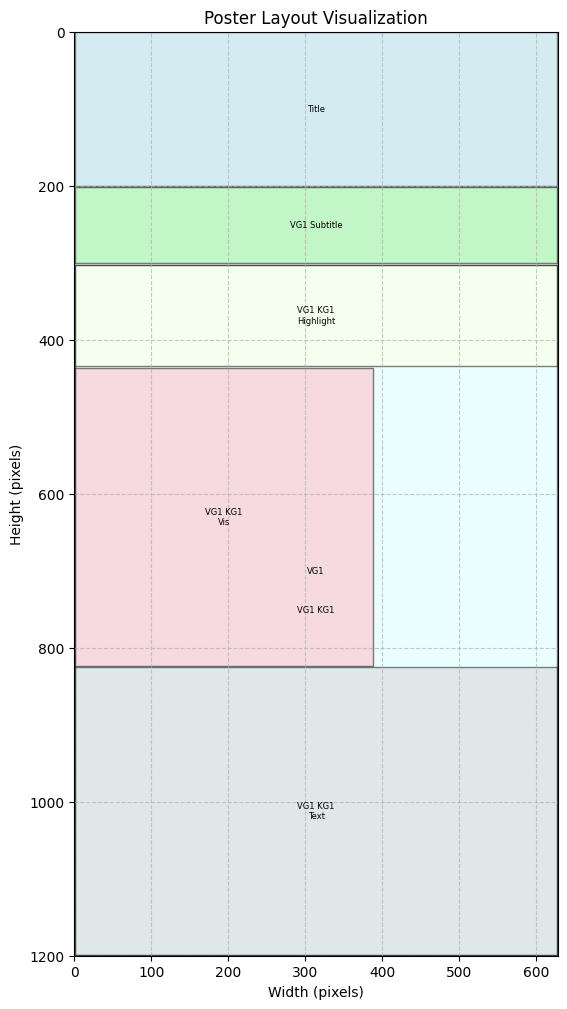

In [243]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

### 2 VGs test

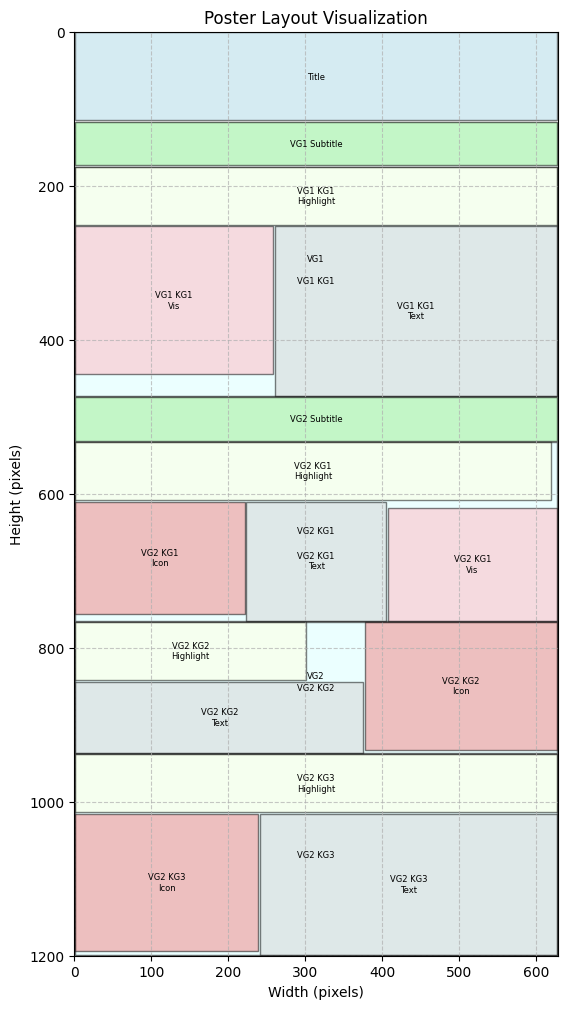

In [244]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

### 3 VGs test

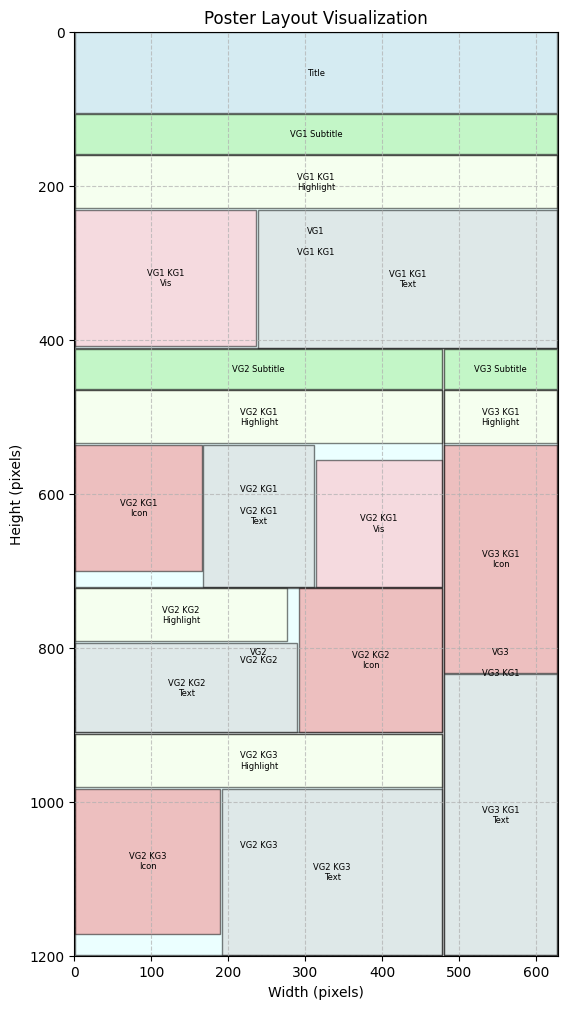

In [245]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

### 4 VGs test

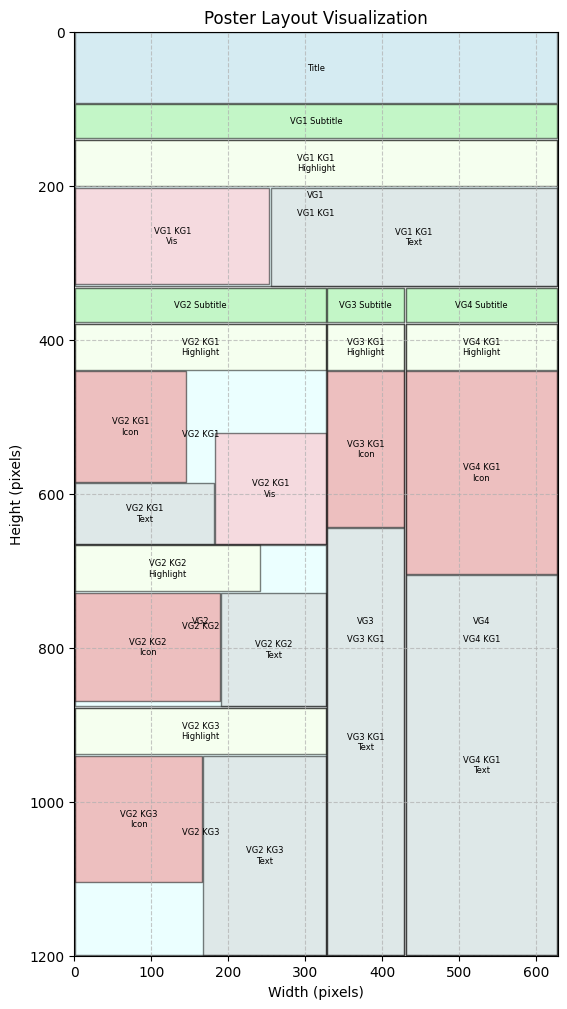

In [246]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 4: Lesser-known Valentine's Day gift traditions
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        }
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

### 5 VGs test

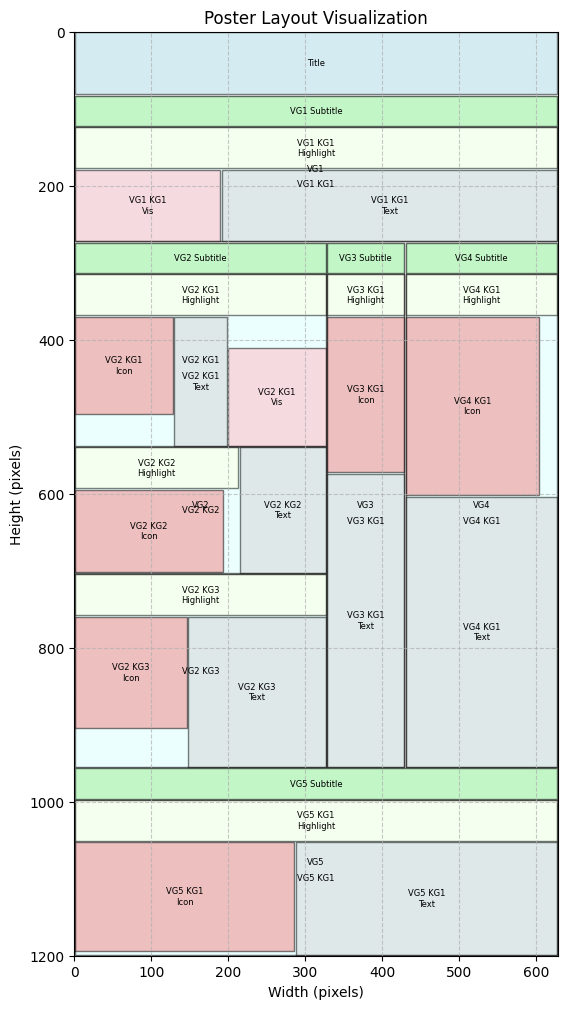

In [247]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 4: Lesser-known Valentine's Day gift traditions
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        }
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

### 6 VGs test

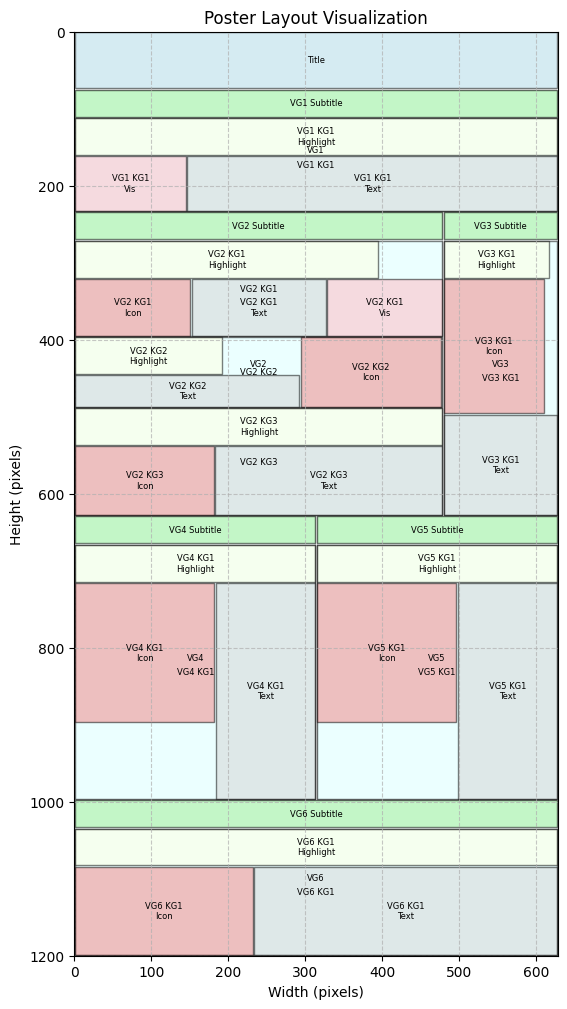

In [248]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 4: Lesser-known Valentine's Day gift traditions
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        }
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

### 7 VGs test

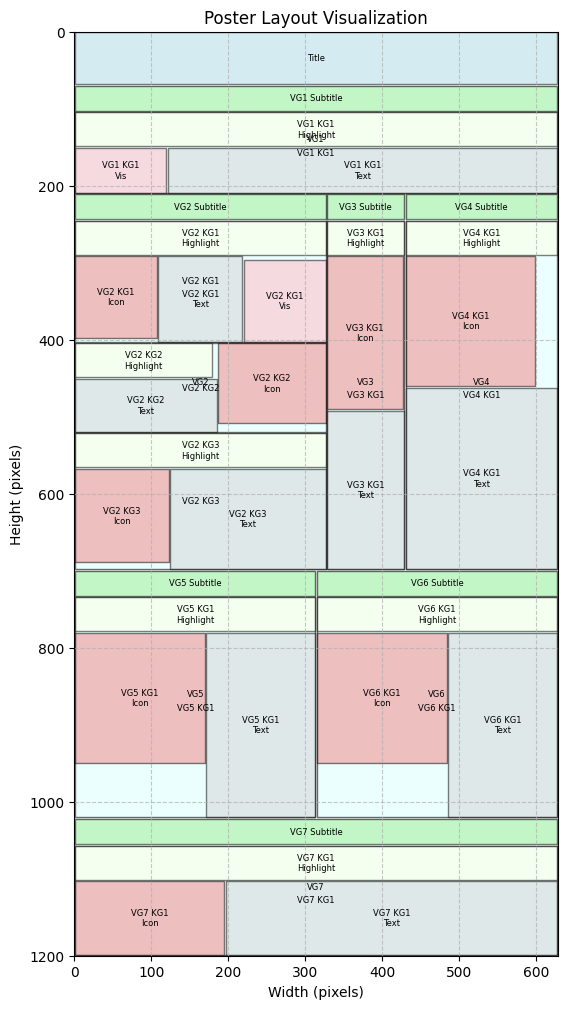

In [249]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 4: Lesser-known Valentine's Day gift traditions
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        }
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

### 8 VGs test

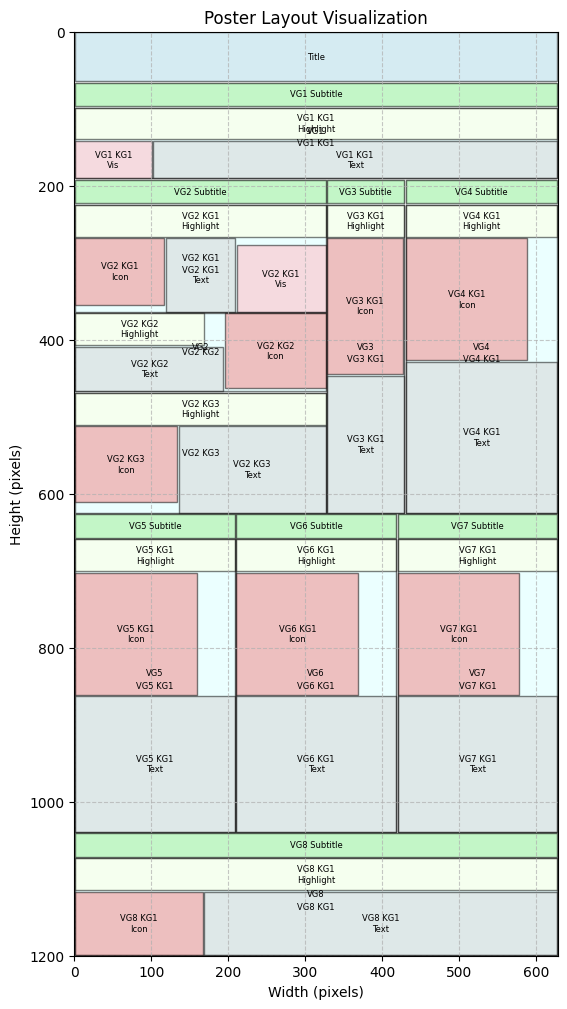

In [250]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 4: Lesser-known Valentine's Day gift traditions
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        }
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

### 9 VGs test

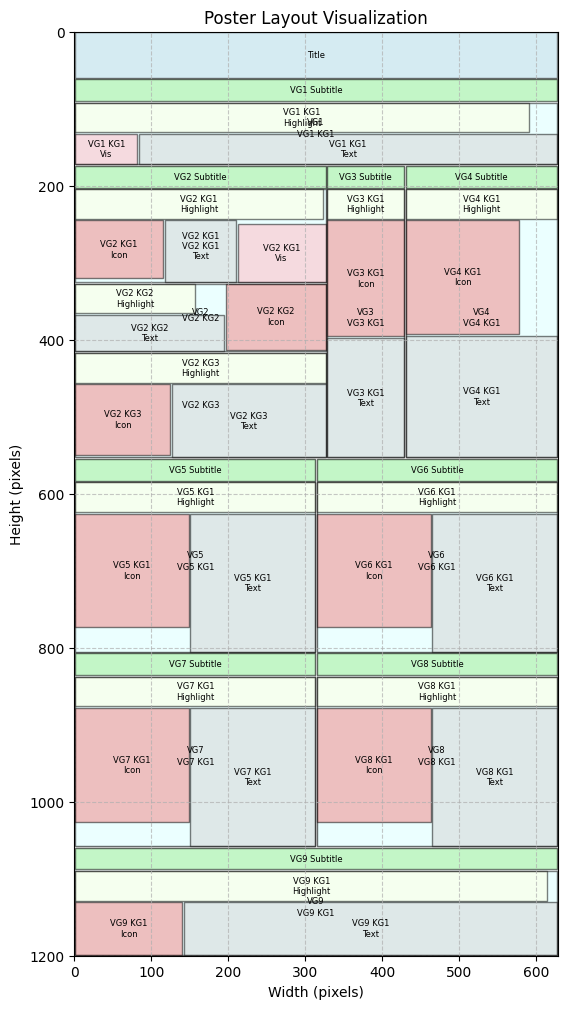

In [251]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 4: Lesser-known Valentine's Day gift traditions
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        }
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

### 10 VGs test

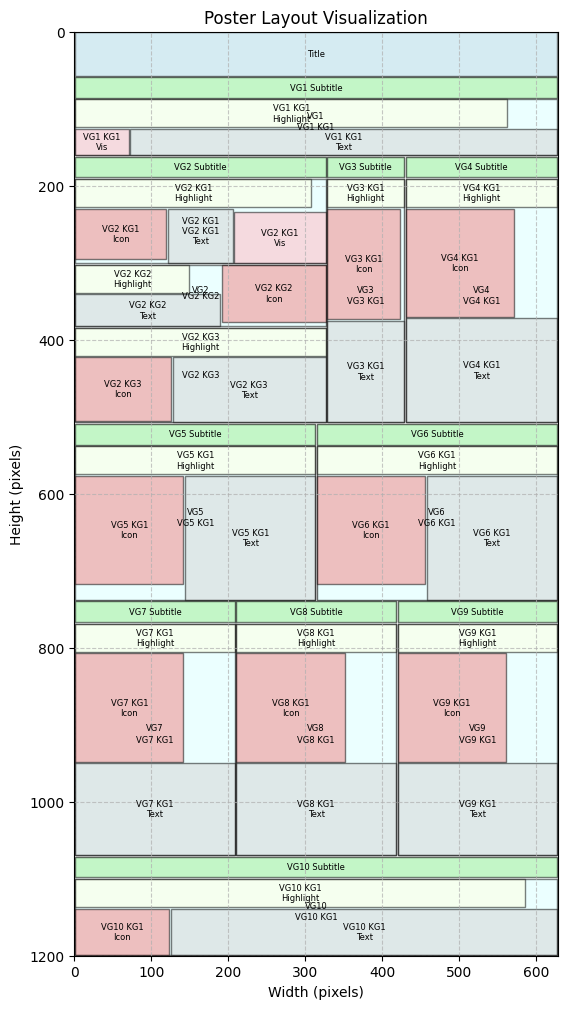

In [252]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 4: Lesser-known Valentine's Day gift traditions
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        }
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

## star

In [ ]:
# from math import sqrt

# def layout_poster(valentine_data, W, H, margin=0, vertical_margin=0):
#     """
#     Lays out a poster with a title, Super Groups (SGHs and SGVs) containing Visual Groups (VGs),
#     and Knowledge Groups (KGs) within VGs. SGHs stack VGs horizontally, SGVs stack VGs vertically.
#     The virtual VG's area is 1/4 of the non-subtitle parts of all VGs.

#     Args:
#         valentine_data: Dictionary containing "data" with VGs, each having "knowledges".
#         W: Poster width (float).
#         H: Poster height (float).
#         margin: Horizontal margin for KGs in VGs with multiple KGs (float, default=0).
#         vertical_margin: Vertical spacing between KGs (float, default=0).

#     Returns:
#         Dictionary mapping element keys to their coordinates (as lists of [x, y] points).
#         Excludes Text coordinates. Virtual VG has only 'coords', no content.
#     """
#     # Character width-to-height ratios
#     def calculate_text_width(string, font_height):
#         ratios = {
#             'B': 0.5, 'E': 0.5, 'F': 0.5, 'J': 0.5, 'L': 0.5, 'P': 0.5, 'S': 0.5,
#             'A': 0.8889, 'D': 0.8889, 'H': 0.8889, 'K': 0.8889, 'N': 0.8889,
#             'R': 0.8889, 'T': 0.8889, 'U': 0.8889, 'V': 0.8889, 'X': 0.8889,
#             'Y': 0.8889, 'Z': 0.8889, 'C': 1.0, 'G': 1.0, 'O': 1.0, 'Q': 1.0,
#             'M': 1.1111, 'W': 1.1111, 'b': 0.5, 'd': 0.5, 'f': 0.5, 'h': 0.5,
#             'k': 0.5, 'l': 0.5, 't': 0.5, 'c': 1.0, 'e': 1.0, 'o': 1.0, 's': 1.0,
#             'a': 0.7, 'g': 0.7, 'n': 0.7, 'p': 0.7, 'q': 0.7, 'r': 0.7, 'u': 0.7,
#             'v': 0.7, 'w': 0.7, 'x': 0.7, 'y': 0.7, 'z': 0.7, ' ': 0.4
#         }
#         return sum(ratios.get(char, 0.7) * font_height for char in string)

#     # Helper function to define layout structure based on number of original VGs
#     def get_layout_structure(n):
#         if n == 1:
#             return [('SGH', [2, 1])]  # SGH1 (VG2, VG1), VG2 is virtual
#         elif n == 2:
#             return [('SGH', [3, 1]), ('SGH', [2])]  # SGH1 (VG3, VG1), SGH2 (VG2), VG3 virtual
#         elif n == 3:
#             return [('SGH', [1, 4, 2]), ('SGH', [3])]  # SGH1 (VG1, VG4, VG2), SGH2 (VG3), VG4 virtual
#         elif n == 4:
#             return [('SGH', [1]), ('SGH', [2, 5, 3]), ('SGH', [4])]  # VG5 virtual
#         elif n == 5:
#             return [('SGH', [1, 2]), ('SGH', [3, 6, 4]), ('SGH', [5])]  # VG6 virtual
#         elif n == 6:
#             return [('SGH', [1, 2]), ('SGH', [3, 7, 4]), ('SGH', [5, 6])]  # VG7 virtual
#         elif n == 7:
#             return [('SGH', [1, 2, 3]), ('SGH', [4, 8, 5]), ('SGH', [6, 7])]  # VG8 virtual
#         elif n == 8:
#             return [('SGH', [1, 2]), ('SGH', [('SGV', [3, 4]), 9, ('SGV', [5, 6])]), ('SGH', [7, 8])]  # VG9 virtual
#         elif n == 9:
#             return [('SGH', [1, 2, 3]), ('SGH', [('SGV', [4, 5]), 10, ('SGV', [6, 7])]), ('SGH', [8, 9])]  # VG10 virtual
#         elif n == 10:
#             return [('SGH', [1, 2, 3]), ('SGH', [('SGV', [4, 5]), 11, ('SGV', [6, 7])]), ('SGH', [8, 9, 10])]  # VG11 virtual
#         else:
#             raise ValueError("Number of VGs must be between 1 and 10")

#     # Helper function to map VG label to index
#     def get_vg_idx(label, n_original):
#         return label - 1 if label <= n_original else n_original

#     # Helper function to calculate VG height
#     def calculate_vg_height(vg_idx, w_VG, VGs, x, margin, vertical_margin):
#         VG = VGs[vg_idx]
#         if VG.get("is_virtual", False):
#             return 0.0
#         knowledges = VG["knowledges"]
#         n_KG = len(knowledges)
#         kg_width = w_VG if n_KG == 1 else w_VG - 2 * margin
#         h_VG = 1.5 * x  # Subtitle height
#         if n_KG > 1:
#             h_VG += vertical_margin
#         for KG in knowledges:
#             text = KG["knowledge_content"]
#             highlight = KG["first_level_highlight"]
#             has_icon = (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None )
#             has_vis = KG["visualization"]["is_visualization"]
#             A_text = x * calculate_text_width(text, x)
#             A_highlight = 2.0 * x * calculate_text_width(highlight, 2.0 * x)
#             A_icon = x * calculate_text_width(text, x) if has_icon else 0.0
#             A_vis = x * calculate_text_width(text, x) if has_vis else 0.0
#             A_KG = A_text + A_highlight + A_icon + A_vis
#             h_KG = A_KG / kg_width if kg_width > 0 else 0.0
#             h_VG += h_KG
#             if n_KG > 1:
#                 h_VG += vertical_margin
#         if n_KG > 1:
#             h_VG -= vertical_margin  # Remove extra margin at the end
#         return h_VG

#     # Helper function to calculate element area
#     def get_element_area(element, vg_areas, n_original):
#         if isinstance(element, int):
#             vg_idx = get_vg_idx(element, n_original)
#             return vg_areas[vg_idx]
#         elif isinstance(element, tuple) and element[0] == 'SGV':
#             return sum(vg_areas[get_vg_idx(label, n_original)] for label in element[1])
#         return 0.0

#     # Helper function to calculate element height
#     def calculate_element_height(element, w_element, VGs, x, margin, vertical_margin, n_original):
#         if isinstance(element, int):
#             vg_idx = get_vg_idx(element, n_original)
#             return calculate_vg_height(vg_idx, w_element, VGs, x, margin, vertical_margin)
#         elif isinstance(element, tuple) and element[0] == 'SGV':
#             vg_indices = [get_vg_idx(label, n_original) for label in element[1]]
#             return sum(calculate_vg_height(vg_idx, w_element, VGs, x, margin, vertical_margin) for vg_idx in vg_indices)
#         return 0.0

#     # Helper function to layout a VG
#     def layout_vg(vg_idx, x_start, y_start, w_VG, h_VG, VGs, x, margin, vertical_margin, layout):
#         VG = VGs[vg_idx]
#         VG_key = f"VG{vg_idx + 1}"
#         layout[VG_key] = {"coords": [[x_start, y_start], [x_start + w_VG, y_start], [x_start, y_start + h_VG], [x_start + w_VG, y_start + h_VG]]}
#         if VG.get("is_virtual", False):
#             return  # Virtual VG has no content
#         knowledges = VG["knowledges"]
#         n_KG = len(knowledges)
#         kg_width = w_VG if n_KG == 1 else w_VG - 2 * margin
#         kg_x = x_start if n_KG == 1 else x_start + margin

#         # Subtitle
#         layout[VG_key]["Subtitle"] = [
#             [x_start, y_start], [x_start + w_VG, y_start],
#             [x_start, y_start + 1.5 * x], [x_start + w_VG, y_start + 1.5 * x]
#         ]
#         y_VG = y_start + 1.5 * x
#         if n_KG > 1:
#             y_VG += vertical_margin

#         # Layout KGs
#         for j, KG in enumerate(knowledges, 1):
#             text = KG["knowledge_content"]
#             highlight = KG["first_level_highlight"]
#             has_icon = (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None )
#             has_vis = KG["visualization"]["is_visualization"]

#             A_text = x * calculate_text_width(text, x)
#             A_highlight = 2.0 * x * calculate_text_width(highlight, 2.0 * x)
#             A_icon = x * calculate_text_width(text, x) if has_icon else 0.0
#             A_vis = x * calculate_text_width(text, x) if has_vis else 0.0
#             A_KG = A_text + A_highlight + A_icon + A_vis
#             h_KG = A_KG / kg_width if kg_width > 0 else 0.0

#             KG_key = f"KG{j}"
#             layout[VG_key][KG_key] = {
#                 "coords": [
#                     [kg_x, y_VG], [kg_x + kg_width, y_VG],
#                     [kg_x, y_VG + h_KG], [kg_x + kg_width, y_VG + h_KG]
#                 ],
#                 "Highlight": [
#                     [kg_x, y_VG], [kg_x + min(calculate_text_width(highlight, 2.0 * x), kg_width), y_VG],
#                     [kg_x, y_VG + 2.0 * x], [kg_x + min(calculate_text_width(highlight, 2.0 * x), kg_width), y_VG + 2.0 * x]
#                 ],
#                 "Icon": None,
#                 "Vis": None
#             }

#             # Image placement logic
#             aspect_ratios = [1.0, 1.333, 0.75, 1.5, 0.667, 1.777, 0.562, 0.5, 2.0, 1.4, 0.714, 0.8, 1.25, 0.6, 1.667]

#             def try_placement_a(r, A_img):
#                 w_img = sqrt(A_img * r)
#                 h_img = sqrt(A_img / r)
#                 x1 = kg_x + kg_width - w_img
#                 y1 = y_VG
#                 x2 = kg_x + kg_width
#                 y2 = y_VG + h_img
#                 coords = [[x1, y1], [x2, y1], [x1, y2], [x2, y2]]
#                 overflow_area = 0
#                 if y2 > y_VG + h_KG:
#                     overflow_area += (y2 - (y_VG + h_KG)) * w_img
#                 if x1 < kg_x + min(calculate_text_width(highlight, 2.0 * x), kg_width):
#                     overlap_area = (min(x2, kg_x + min(calculate_text_width(highlight, 2.0 * x), kg_width)) - x1) * h_img if x2 > kg_x + min(calculate_text_width(highlight, 2.0 * x), kg_width) else w_img * h_img
#                     overflow_area += overlap_area
#                 return True if overflow_area == 0 else False, coords, overflow_area

#             def try_placement_b(r, A_img):
#                 w_img = sqrt(A_img * r)
#                 h_img = sqrt(A_img / r)
#                 x1 = kg_x
#                 y1 = y_VG + 2.0 * x
#                 x2 = kg_x + w_img
#                 y2 = y_VG + 2.0 * x + h_img
#                 coords = [[x1, y1], [x2, y1], [x1, y2], [x2, y2]]
#                 overflow_area = 0
#                 if y2 > y_VG + h_KG:
#                     overflow_area += (y2 - (y_VG + h_KG)) * w_img
#                 if x2 > kg_x + kg_width:
#                     overflow_area += (x2 - (kg_x + kg_width)) * h_img
#                 return True if overflow_area == 0 else False, coords, overflow_area

#             def try_combination_1(r_a, r_b):
#                 w_a = sqrt(A_icon * r_a)
#                 h_a = sqrt(A_icon / r_a)
#                 w_b = sqrt(A_vis * r_b)
#                 h_b = sqrt(A_vis / r_b)
#                 x1_a = kg_x + kg_width - w_a
#                 y1_a = y_VG
#                 x2_a = kg_x + kg_width
#                 y2_a = y_VG + h_a
#                 coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
#                 x1_b = kg_x + kg_width - w_a - w_b
#                 y1_b = y_VG
#                 x2_b = kg_x + kg_width - w_a
#                 y2_b = y_VG + h_b
#                 coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
#                 overflow_area = 0
#                 if y2_a > y_VG + h_KG:
#                     overflow_area += (y2_a - (y_VG + h_KG)) * w_a
#                 if y2_b > y_VG + h_KG:
#                     overflow_area += (y2_b - (y_VG + h_KG)) * w_b
#                 w_highlight = min(calculate_text_width(highlight, 2.0 * x), kg_width)
#                 if x1_a < kg_x + w_highlight and y1_a < y_VG + 2.0 * x:
#                     overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, 2.0 * x) if x2_a > kg_x + w_highlight else w_a * min(h_a, 2.0 * x)
#                     overflow_area += overlap_area
#                 if x1_b < kg_x + w_highlight and y1_b < y_VG + 2.0 * x:
#                     overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, 2.0 * x) if x2_b > kg_x + w_highlight else w_b * min(h_b, 2.0 * x)
#                     overflow_area += overlap_area
#                 return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

#             def try_combination_2(r_a, r_b):
#                 w_a = sqrt(A_icon * r_a)
#                 h_a = sqrt(A_icon / r_a)
#                 w_b = sqrt(A_vis * r_b)
#                 h_b = sqrt(A_vis / r_b)
#                 x1_a = kg_x + kg_width - w_a
#                 y1_a = y_VG
#                 x2_a = kg_x + kg_width
#                 y2_a = y_VG + h_a
#                 coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
#                 x1_b = kg_x
#                 y1_b = y_VG + 2.0 * x
#                 x2_b = kg_x + w_b
#                 y2_b = y_VG + 2.0 * x + h_b
#                 coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
#                 overflow_area = 0
#                 if y2_a > y_VG + h_KG:
#                     overflow_area += (y2_a - (y_VG + h_KG)) * w_a
#                 if y2_b > y_VG + h_KG:
#                     overflow_area += (y2_b - (y_VG + h_KG)) * w_b
#                 w_highlight = min(calculate_text_width(highlight, 2.0 * x), kg_width)
#                 if x1_a < kg_x + w_highlight and y1_a < y_VG + 2.0 * x:
#                     overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, 2.0 * x) if x2_a > kg_x + w_highlight else w_a * min(h_a, 2.0 * x)
#                     overflow_area += overlap_area
#                 if x2_b > kg_x + kg_width:
#                     overflow_area += (x2_b - (kg_x + kg_width)) * h_b
#                 return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

#             def try_combination_3(r_a, r_b):
#                 w_a = sqrt(A_icon * r_a)
#                 h_a = sqrt(A_icon / r_a)
#                 w_b = sqrt(A_vis * r_b)
#                 h_b = sqrt(A_vis / r_b)
#                 x1_a = kg_x + kg_width - w_a
#                 y1_a = y_VG
#                 x2_a = kg_x + kg_width
#                 y2_a = y_VG + h_a
#                 coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
#                 x1_b = kg_x + kg_width - w_b
#                 y1_b = y_VG + h_a
#                 x2_b = kg_x + kg_width
#                 y2_b = y_VG + h_a + h_b
#                 coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
#                 overflow_area = 0
#                 if y2_a > y_VG + h_KG:
#                     overflow_area += (y2_a - (y_VG + h_KG)) * w_a
#                 if y2_b > y_VG + h_KG:
#                     overflow_area += (y2_b - (y_VG + h_KG)) * w_b
#                 w_highlight = min(calculate_text_width(highlight, 2.0 * x), kg_width)
#                 if x1_a < kg_x + w_highlight and y1_a < y_VG + 2.0 * x:
#                     overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, 2.0 * x) if x2_a > kg_x + w_highlight else w_a * min(h_a, 2.0 * x)
#                     overflow_area += overlap_area
#                 if x1_b < kg_x + w_highlight and y1_b < y_VG + 2.0 * x:
#                     overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, 2.0 * x - (y1_b - y_VG)) if x2_b > kg_x + w_highlight else w_b * min(h_b, 2.0 * x - (y1_b - y_VG))
#                     overflow_area += overlap_area
#                 return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

#             def try_combination_4(r_a, r_b):
#                 w_a = sqrt(A_icon * r_a)
#                 h_a = sqrt(A_icon / r_a)
#                 w_b = sqrt(A_vis * r_b)
#                 h_b = sqrt(A_vis / r_b)
#                 x1_a = kg_x
#                 y1_a = y_VG + 2.0 * x
#                 x2_a = kg_x + w_a
#                 y2_a = y_VG + 2.0 * x + h_a
#                 coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
#                 x1_b = kg_x + kg_width - w_b
#                 y1_b = y_VG + h_KG - h_b
#                 x2_b = kg_x + kg_width
#                 y2_b = y_VG + h_KG
#                 coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
#                 overflow_area = 0
#                 if y2_a > y_VG + h_KG:
#                     overflow_area += (y2_a - (y_VG + h_KG)) * w_a
#                 if x2_a > kg_x + kg_width:
#                     overflow_area += (x2_a - (kg_x + kg_width)) * h_a
#                 if x1_b < kg_x:
#                     overflow_area += (kg_x - x1_b) * h_b
#                 if y1_b < y_VG:
#                     overflow_area += (y_VG - y1_b) * w_b
#                 w_highlight = min(calculate_text_width(highlight, 2.0 * x), kg_width)
#                 if x1_b < kg_x + w_highlight and y1_b < y_VG + 2.0 * x:
#                     overlap_width = (min(x2_b, kg_x + w_highlight) - x1_b) if x2_b > kg_x + w_highlight else w_b
#                     overlap_height = min(h_b, 2.0 * x - (y1_b - y_VG))
#                     overflow_area += overlap_width * overlap_height
#                 return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

#             if has_icon and has_vis:
#                 min_overflow = float('inf')
#                 best_layout = None
#                 combination_funcs = [try_combination_1, try_combination_2, try_combination_3, try_combination_4]
#                 for idx, comb in enumerate(combination_funcs):
#                     for r_a in aspect_ratios:
#                         for r_b in aspect_ratios:
#                             fit, coords_a, coords_b, overflow = comb(r_a, r_b)
#                             if fit:
#                                 layout[VG_key][KG_key]["Icon"] = coords_a
#                                 layout[VG_key][KG_key]["Vis"] = coords_b
#                                 min_overflow = 0
#                                 break
#                             if overflow < min_overflow:
#                                 min_overflow = overflow
#                                 best_layout = (coords_a, coords_b, r_a, r_b, idx)
#                         if min_overflow == 0:
#                             break
#                     if min_overflow == 0:
#                         break
#                 if min_overflow > 0:
#                     coords_a, coords_b, r_a, r_b, comb_idx = best_layout
#                     w_a = sqrt(A_icon * r_a)
#                     h_a = sqrt(A_icon / r_a)
#                     x1_a, y1_a = coords_a[0]
#                     x2_a, y2_a = coords_a[3]
#                     w_b = sqrt(A_vis * r_b)
#                     h_b = sqrt(A_vis / r_b)
#                     x1_b, y1_b = coords_b[0]
#                     x2_b, y2_b = coords_b[3]
#                     w_highlight = min(calculate_text_width(highlight, 2.0 * x), kg_width)
#                     if comb_idx == 0:
#                         if x1_a < kg_x + w_highlight:
#                             w_a = kg_width - (kg_x + w_highlight - x1_a)
#                         if y2_a > y_VG + h_KG:
#                             h_a = h_KG - (y1_a - y_VG)
#                         w_a_new = min(w_a, h_a * r_a)
#                         h_a_new = w_a_new / r_a
#                         coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
#                         if x1_b < kg_x + w_highlight:
#                             w_b = kg_width - (kg_x + w_highlight - x1_b)
#                         if y2_b > y_VG + h_KG:
#                             h_b = h_KG - (y1_b - y_VG)
#                         w_b_new = min(w_b, h_b * r_b)
#                         h_b_new = w_b_new / r_b
#                         coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
#                     elif comb_idx == 1:
#                         if x1_a < kg_x + w_highlight:
#                             w_a = kg_width - (kg_x + w_highlight - x1_a)
#                         if y2_a > y_VG + h_KG:
#                             h_a = h_KG - (y1_a - y_VG)
#                         w_a_new = min(w_a, h_a * r_a)
#                         h_a_new = w_a_new / r_a
#                         coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
#                         if x2_b > kg_x + kg_width:
#                             w_b = kg_width - (x1_b - kg_x)
#                         if y2_b > y_VG + h_KG:
#                             h_b = h_KG - (y1_b - y_VG)
#                         w_b_new = min(w_b, h_b * r_b)
#                         h_b_new = w_b_new / r_b
#                         coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
#                     elif comb_idx == 2:
#                         if x1_a < kg_x + w_highlight:
#                             w_a = kg_width - (kg_x + w_highlight - x1_a)
#                         if y2_a > y_VG + h_KG:
#                             h_a = h_KG - (y1_a - y_VG)
#                         w_a_new = min(w_a, h_a * r_a)
#                         h_a_new = w_a_new / r_a
#                         coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
#                         if x1_b < kg_x + w_highlight:
#                             w_b = kg_width - (kg_x + w_highlight - x1_b)
#                         if y2_b > y_VG + h_KG:
#                             h_b = h_KG - (y1_b - y_VG)
#                         w_b_new = min(w_b, h_b * r_b)
#                         h_b_new = w_b_new / r_b
#                         coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
#                     elif comb_idx == 3:
#                         if x2_a > kg_x + kg_width:
#                             w_a = kg_width - (x1_a - kg_x)
#                         if y2_a > y_VG + h_KG:
#                             h_a = h_KG - (y1_a - y_VG)
#                         w_a_new = min(w_a, h_a * r_a)
#                         h_a_new = w_a_new / r_a
#                         coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
#                         if x1_b < kg_x:
#                             w_b = kg_width
#                         if y1_b < y_VG:
#                             h_b = h_KG
#                         if x1_b < kg_x + w_highlight and y1_b < y_VG + 2.0 * x:
#                             ratio_x = (kg_width - w_highlight) / w_b
#                             ratio_y = (h_KG - 2.0 * x) / h_b
#                             scale = max(ratio_x, ratio_y)
#                             w_b_new = w_b * scale
#                             h_b_new = h_b * scale
#                         else:
#                             w_b_new = w_b
#                             h_b_new = h_b
#                         x1_b_new = x2_b - w_b_new
#                         y1_b_new = y2_b - h_b_new
#                         coords_b = [[x1_b_new, y1_b_new], [x2_b, y1_b_new], [x1_b_new, y2_b], [x2_b, y2_b]]
#                     layout[VG_key][KG_key]["Icon"] = coords_a
#                     layout[VG_key][KG_key]["Vis"] = coords_b
#             elif has_icon:
#                 min_overflow = float('inf')
#                 best_layout = None
#                 placement_funcs = [try_placement_a, try_placement_b]
#                 for idx, placement in enumerate(placement_funcs):
#                     for r in aspect_ratios:
#                         fit, coords, overflow = placement(r, A_icon)
#                         if fit:
#                             layout[VG_key][KG_key]["Icon"] = coords
#                             min_overflow = 0
#                             break
#                         if overflow < min_overflow:
#                             min_overflow = overflow
#                             best_layout = (coords, r, idx)
#                     if min_overflow == 0:
#                         break
#                 if min_overflow > 0:
#                     coords, r, placement_idx = best_layout
#                     w_img = sqrt(A_icon * r)
#                     h_img = sqrt(A_icon / r)
#                     x1, y1 = coords[0]
#                     x2, y2 = coords[3]
#                     w_highlight = min(calculate_text_width(highlight, 2.0 * x), kg_width)
#                     if placement_idx == 0:
#                         if x1 < kg_x + w_highlight:
#                             w_img = kg_width - (kg_x + w_highlight - x1)
#                         if y2 > y_VG + h_KG:
#                             h_img = h_KG - (y1 - y_VG)
#                     elif placement_idx == 1:
#                         if x2 > kg_x + kg_width:
#                             w_img = kg_width - (x1 - kg_x)
#                         if y2 > y_VG + h_KG:
#                             h_img = h_KG - (y1 - y_VG)
#                     w_img_new = min(w_img, h_img * r)
#                     h_img_new = w_img_new / r
#                     layout[VG_key][KG_key]["Icon"] = [
#                         [x1, y1], [x1 + w_img_new, y1],
#                         [x1, y1 + h_img_new], [x1 + w_img_new, y1 + h_img_new]
#                     ]
#             elif has_vis:
#                 min_overflow = float('inf')
#                 best_layout = None
#                 placement_funcs = [try_placement_a, try_placement_b]
#                 for idx, placement in enumerate(placement_funcs):
#                     for r in aspect_ratios:
#                         fit, coords, overflow = placement(r, A_vis)
#                         if fit:
#                             layout[VG_key][KG_key]["Vis"] = coords
#                             min_overflow = 0
#                             break
#                         if overflow < min_overflow:
#                             min_overflow = overflow
#                             best_layout = (coords, r, idx)
#                     if min_overflow == 0:
#                         break
#                 if min_overflow > 0:
#                     coords, r, placement_idx = best_layout
#                     w_img = sqrt(A_vis * r)
#                     h_img = sqrt(A_vis / r)
#                     x1, y1 = coords[0]
#                     x2, y2 = coords[3]
#                     w_highlight = min(calculate_text_width(highlight, 2.0 * x), kg_width)
#                     if placement_idx == 0:
#                         if x1 < kg_x + w_highlight:
#                             w_img = kg_width - (kg_x + w_highlight - x1)
#                         if y2 > y_VG + h_KG:
#                             h_img = h_KG - (y1 - y_VG)
#                     elif placement_idx == 1:
#                         if x2 > kg_x + kg_width:
#                             w_img = kg_width - (x1 - kg_x)
#                         if y2 > y_VG + h_KG:
#                             h_img = h_KG - (y1 - y_VG)
#                     w_img_new = min(w_img, h_img * r)
#                     h_img_new = w_img_new / r
#                     layout[VG_key][KG_key]["Vis"] = [
#                         [x1, y1], [x1 + w_img_new, y1],
#                         [x1, y1 + h_img_new], [x1 + w_img_new, y1 + h_img_new]
#                     ]

#             y_VG += h_KG
#             if j < n_KG:
#                 y_VG += vertical_margin

#     # Main layout logic
#     original_VGs = valentine_data["data"]
#     n_original_VG = len(original_VGs)
#     virtual_VG = {"knowledges": [], "is_virtual": True}
#     VGs = original_VGs + [virtual_VG]

#     # Calculate coefficients for b * x^2 + a * x + c = 0
#     if n_original_VG in [1, 2, 3, 4, 5, 6, 7]:
#         a = 3.0 * W + 1.5 * len(get_layout_structure(n_original_VG)) * W  # Title + subtitles for original VGs only
#     elif n_original_VG in [8, 9, 10]:
#         a = 3.0 * W + 1.5 * (len(get_layout_structure(n_original_VG)) + 1) * W 
#     # a = 3.0 * W + 1.5 * n_original_VG * W
#     b = 0.0
#     c = -H * W  # Adjusted for virtual VG area H*W/4
#     vg_areas = []

#     # Compute vg_areas and b for original VGs
#     for VG in original_VGs:
#         knowledges = VG["knowledges"]
#         sum_s_KG = 0.0
#         for KG in knowledges:
#             text = KG["knowledge_content"]
#             highlight = KG["first_level_highlight"]
#             n_images = (1 if (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None ) else 0) + (1 if KG["visualization"]["is_visualization"] else 0)
#             s_text = calculate_text_width(text, 1.0)
#             s_highlight = calculate_text_width(highlight, 1.0)
#             s_KG = s_text + 4 * s_highlight + s_text * n_images
#             sum_s_KG += s_KG
#             b += s_KG
#         vg_areas.append(sum_s_KG)

#     b *= 5/4
#     # Add virtual VG area (average of original VG areas)
#     vg_areas.append(sum(vg_areas) / 4 if n_original_VG > 0 else 0.0)

#     # Add vertical margins to c for original VGs
#     for VG in original_VGs:
#         n_KG = len(VG["knowledges"])
#         if n_KG > 1:
#             c += (n_KG - 1) * vertical_margin * W

#     # Solve for x
#     discriminant = a**2 - 4 * b * c
#     if discriminant < 0:
#         raise ValueError("No solution for font size x")
#     x = (-a + sqrt(discriminant)) / (2 * b) if b != 0 else -c / a
#     if x <= 0:
#         raise ValueError("Invalid font size x")

#     # Define layout structure
#     structure = get_layout_structure(n_original_VG)
#     layout = {"Title": [[0.0, 0.0], [W, 0.0], [0.0, 3.0 * x], [W, 3.0 * x]]}
#     y = 3.0 * x  # Start below title

#     # Layout each SGH
#     for sgh in structure:
#         assert sgh[0] == 'SGH'
#         elements = sgh[1]
#         total_area_in_sgh = sum(get_element_area(elem, vg_areas, n_original_VG) for elem in elements)
#         element_widths = [W * (get_element_area(elem, vg_areas, n_original_VG) / total_area_in_sgh) if total_area_in_sgh > 0 else W / len(elements) for elem in elements]
#         element_heights = [calculate_element_height(elem, w_elem, VGs, x, margin, vertical_margin, n_original_VG) for w_elem, elem in zip(element_widths, elements)]
#         h_SGH = max(element_heights) if element_heights else 0.0
#         x_start = 0.0

#         for elem, w_elem in zip(elements, element_widths):
#             if isinstance(elem, int):
#                 vg_idx = get_vg_idx(elem, n_original_VG)
#                 layout_vg(vg_idx, x_start, y, w_elem, h_SGH, VGs, x, margin, vertical_margin, layout)
#             elif isinstance(elem, tuple) and elem[0] == 'SGV':
#                 vg_indices = [get_vg_idx(label, n_original_VG) for label in elem[1]]
#                 y_sgv = y
#                 for vg_idx in vg_indices:
#                     h_VG = calculate_vg_height(vg_idx, w_elem, VGs, x, margin, vertical_margin)
#                     layout_vg(vg_idx, x_start, y_sgv, w_elem, h_VG, VGs, x, margin, vertical_margin, layout)
#                     y_sgv += h_VG
#             x_start += w_elem

#         y += h_SGH

#     return layout

In [ ]:
from math import sqrt

def layout_poster(valentine_data, W, H, margin=0, vertical_margin=0):
    """
    Lays out a poster with a title, Super Groups (SGHs and SGVs) containing Visual Groups (VGs),
    and Knowledge Groups (KGs) within VGs. SGHs stack VGs horizontally, SGVs stack VGs vertically.
    The virtual VG's area is 1/4 of the non-subtitle parts of all VGs.

    Args:
        valentine_data: Dictionary containing "data" with VGs, each having "knowledges".
        W: Poster width (float).
        H: Poster height (float).
        margin: Horizontal margin for KGs in VGs with multiple KGs (float, default=0).
        vertical_margin: Vertical spacing between KGs (float, default=0).

    Returns:
        Dictionary mapping element keys to their coordinates (as lists of [x, y] points).
        Now includes Text coordinates for each KG.
    """
    # Character width-to-height ratios
    def calculate_text_width(string, font_height):
        ratios = {
            'B': 0.5, 'E': 0.5, 'F': 0.5, 'J': 0.5, 'L': 0.5, 'P': 0.5, 'S': 0.5,
            'A': 0.8889, 'D': 0.8889, 'H': 0.8889, 'K': 0.8889, 'N': 0.8889,
            'R': 0.8889, 'T': 0.8889, 'U': 0.8889, 'V': 0.8889, 'X': 0.8889,
            'Y': 0.8889, 'Z': 0.8889, 'C': 1.0, 'G': 1.0, 'O': 1.0, 'Q': 1.0,
            'M': 1.1111, 'W': 1.1111, 'b': 0.5, 'd': 0.5, 'f': 0.5, 'h': 0.5,
            'k': 0.5, 'l': 0.5, 't': 0.5, 'c': 1.0, 'e': 1.0, 'o': 1.0, 's': 1.0,
            'a': 0.7, 'g': 0.7, 'n': 0.7, 'p': 0.7, 'q': 0.7, 'r': 0.7, 'u': 0.7,
            'v': 0.7, 'w': 0.7, 'x': 0.7, 'y': 0.7, 'z': 0.7, ' ': 0.4
        }
        return sum(ratios.get(char, 0.7) * font_height for char in string)

    # Helper function to define layout structure based on number of original VGs
    def get_layout_structure(n):
        if n == 1:
            return [('SGH', [2, 1])]
        elif n == 2:
            return [('SGH', [3, 1]), ('SGH', [2])]
        elif n == 3:
            return [('SGH', [1, 4, 2]), ('SGH', [3])]
        elif n == 4:
            return [('SGH', [1]), ('SGH', [2, 5, 3]), ('SGH', [4])]
        elif n == 5:
            return [('SGH', [1, 2]), ('SGH', [3, 6, 4]), ('SGH', [5])]
        elif n == 6:
            return [('SGH', [1, 2]), ('SGH', [3, 7, 4]), ('SGH', [5, 6])]
        elif n == 7:
            return [('SGH', [1, 2, 3]), ('SGH', [4, 8, 5]), ('SGH', [6, 7])]
        elif n == 8:
            return [('SGH', [1, 2]), ('SGH', [('SGV', [3, 4]), 9, ('SGV', [5, 6])]), ('SGH', [7, 8])]
        elif n == 9:
            return [('SGH', [1, 2, 3]), ('SGH', [('SGV', [4, 5]), 10, ('SGV', [6, 7])]), ('SGH', [8, 9])]
        elif n == 10:
            return [('SGH', [1, 2, 3]), ('SGH', [('SGV', [4, 5]), 11, ('SGV', [6, 7])]), ('SGH', [8, 9, 10])]
        else:
            raise ValueError("Number of VGs must be between 1 and 10")

    # Helper function to map VG label to index
    def get_vg_idx(label, n_original):
        return label - 1 if label <= n_original else n_original

    # Helper function to calculate VG height
    def calculate_vg_height(vg_idx, w_VG, VGs, x, margin, vertical_margin):
        VG = VGs[vg_idx]
        if VG.get("is_virtual", False):
            return 0.0
        knowledges = VG["knowledges"]
        n_KG = len(knowledges)
        kg_width = w_VG if n_KG == 1 else w_VG - 2 * margin
        h_VG = 1.5 * x  # Subtitle height
        if n_KG > 1:
            h_VG += vertical_margin
        for KG in knowledges:
            text = KG["knowledge_content"]
            highlight = KG["first_level_highlight"]
            has_icon = (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None )
            has_vis = KG["visualization"]["is_visualization"]
            A_text = x * calculate_text_width(text, x)
            A_highlight = 2.0 * x * calculate_text_width(highlight, 2.0 * x)
            A_icon = x * calculate_text_width(text, x) if has_icon else 0.0
            A_vis = x * calculate_text_width(text, x) if has_vis else 0.0
            A_KG = A_text + A_highlight + A_icon + A_vis
            h_KG = A_KG / kg_width if kg_width > 0 else 0.0
            h_VG += h_KG
            if n_KG > 1:
                h_VG += vertical_margin
        if n_KG > 1:
            h_VG -= vertical_margin  # Remove extra margin at the end
        return h_VG

    # Helper function to calculate element area
    def get_element_area(element, vg_areas, n_original):
        if isinstance(element, int):
            vg_idx = get_vg_idx(element, n_original)
            return vg_areas[vg_idx]
        elif isinstance(element, tuple) and element[0] == 'SGV':
            return sum(vg_areas[get_vg_idx(label, n_original)] for label in element[1])
        return 0.0

    # Helper function to calculate element height
    def calculate_element_height(element, w_element, VGs, x, margin, vertical_margin, n_original):
        if isinstance(element, int):
            vg_idx = get_vg_idx(element, n_original)
            return calculate_vg_height(vg_idx, w_element, VGs, x, margin, vertical_margin)
        elif isinstance(element, tuple) and element[0] == 'SGV':
            vg_indices = [get_vg_idx(label, n_original) for label in element[1]]
            return sum(calculate_vg_height(vg_idx, w_element, VGs, x, margin, vertical_margin) for vg_idx in vg_indices)
        return 0.0

    # Helper function to layout a VG
    def layout_vg(vg_idx, x_start, y_start, w_VG, h_VG, VGs, x, margin, vertical_margin, layout):
        VG = VGs[vg_idx]
        VG_key = f"VG{vg_idx + 1}"
        layout[VG_key] = {"coords": [[x_start, y_start], [x_start + w_VG, y_start], [x_start, y_start + h_VG], [x_start + w_VG, y_start + h_VG]]}
        if VG.get("is_virtual", False):
            return  # Virtual VG has no content
        knowledges = VG["knowledges"]
        n_KG = len(knowledges)
        kg_width = w_VG if n_KG == 1 else w_VG - 2 * margin
        kg_x = x_start if n_KG == 1 else x_start + margin

        # Subtitle
        layout[VG_key]["Subtitle"] = [
            [x_start, y_start], [x_start + w_VG, y_start],
            [x_start, y_start + 1.5 * x], [x_start + w_VG, y_start + 1.5 * x]
        ]
        y_VG = y_start + 1.5 * x
        if n_KG > 1:
            y_VG += vertical_margin

        ### BEGIN ADDED CODE ###
        # Helper function to calculate area of a rectangle
        def calculate_area(x1, y1, x2, y2):
            return (x2 - x1) * (y2 - y1)
        ### END ADDED CODE ###

        # Layout KGs
        for j, KG in enumerate(knowledges, 1):
            text = KG["knowledge_content"]
            highlight = KG["first_level_highlight"]
            has_icon = (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None )
            has_vis = KG["visualization"]["is_visualization"]

            A_text = x * calculate_text_width(text, x)
            A_highlight = 2.0 * x * calculate_text_width(highlight, 2.0 * x)
            A_icon = x * calculate_text_width(text, x) if has_icon else 0.0
            A_vis = x * calculate_text_width(text, x) if has_vis else 0.0
            A_KG = A_text + A_highlight + A_icon + A_vis
            h_KG = A_KG / kg_width if kg_width > 0 else 0.0

            KG_key = f"KG{j}"
            layout[VG_key][KG_key] = {
                "coords": [
                    [kg_x, y_VG], [kg_x + kg_width, y_VG],
                    [kg_x, y_VG + h_KG], [kg_x + kg_width, y_VG + h_KG]
                ],
                "Highlight": [
                    [kg_x, y_VG], [kg_x + min(calculate_text_width(highlight, 2.0 * x), kg_width), y_VG],
                    [kg_x, y_VG + 2.0 * x], [kg_x + min(calculate_text_width(highlight, 2.0 * x), kg_width), y_VG + 2.0 * x]
                ],
                "Icon": None,
                "Vis": None,
                ### BEGIN ADDED CODE ###
                "placement_type": None  # Initialize placement_type
                ### END ADDED CODE ###
            }

            # Image placement logic
            aspect_ratios = [1.0, 1.333, 0.75, 1.5, 0.667, 1.777, 0.562, 0.5, 2.0, 1.4, 0.714, 0.8, 1.25, 0.6, 1.667]

            def try_placement_a(r, A_img):
                w_img = sqrt(A_img * r)
                h_img = sqrt(A_img / r)
                x1 = kg_x + kg_width - w_img
                y1 = y_VG
                x2 = kg_x + kg_width
                y2 = y_VG + h_img
                coords = [[x1, y1], [x2, y1], [x1, y2], [x2, y2]]
                overflow_area = 0
                if y2 > y_VG + h_KG:
                    overflow_area += (y2 - (y_VG + h_KG)) * w_img
                if x1 < kg_x + min(calculate_text_width(highlight, 2.0 * x), kg_width):
                    overlap_area = (min(x2, kg_x + min(calculate_text_width(highlight, 2.0 * x), kg_width)) - x1) * h_img if x2 > kg_x + min(calculate_text_width(highlight, 2.0 * x), kg_width) else w_img * h_img
                    overflow_area += overlap_area
                return True if overflow_area == 0 else False, coords, overflow_area

            def try_placement_b(r, A_img):
                w_img = sqrt(A_img * r)
                h_img = sqrt(A_img / r)
                x1 = kg_x
                y1 = y_VG + 2.0 * x
                x2 = kg_x + w_img
                y2 = y_VG + 2.0 * x + h_img
                coords = [[x1, y1], [x2, y1], [x1, y2], [x2, y2]]
                overflow_area = 0
                if y2 > y_VG + h_KG:
                    overflow_area += (y2 - (y_VG + h_KG)) * w_img
                if x2 > kg_x + kg_width:
                    overflow_area += (x2 - (kg_x + kg_width)) * h_img
                return True if overflow_area == 0 else False, coords, overflow_area

            def try_combination_1(r_a, r_b):
                w_a = sqrt(A_icon * r_a)
                h_a = sqrt(A_icon / r_a)
                w_b = sqrt(A_vis * r_b)
                h_b = sqrt(A_vis / r_b)
                x1_a = kg_x + kg_width - w_a
                y1_a = y_VG
                x2_a = kg_x + kg_width
                y2_a = y_VG + h_a
                coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
                x1_b = kg_x + kg_width - w_a - w_b
                y1_b = y_VG
                x2_b = kg_x + kg_width - w_a
                y2_b = y_VG + h_b
                coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
                overflow_area = 0
                if y2_a > y_VG + h_KG:
                    overflow_area += (y2_a - (y_VG + h_KG)) * w_a
                if y2_b > y_VG + h_KG:
                    overflow_area += (y2_b - (y_VG + h_KG)) * w_b
                w_highlight = min(calculate_text_width(highlight, 2.0 * x), kg_width)
                if x1_a < kg_x + w_highlight and y1_a < y_VG + 2.0 * x:
                    overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, 2.0 * x) if x2_a > kg_x + w_highlight else w_a * min(h_a, 2.0 * x)
                    overflow_area += overlap_area
                if x1_b < kg_x + w_highlight and y1_b < y_VG + 2.0 * x:
                    overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, 2.0 * x) if x2_b > kg_x + w_highlight else w_b * min(h_b, 2.0 * x)
                    overflow_area += overlap_area
                return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

            def try_combination_2(r_a, r_b):
                w_a = sqrt(A_icon * r_a)
                h_a = sqrt(A_icon / r_a)
                w_b = sqrt(A_vis * r_b)
                h_b = sqrt(A_vis / r_b)
                x1_a = kg_x + kg_width - w_a
                y1_a = y_VG
                x2_a = kg_x + kg_width
                y2_a = y_VG + h_a
                coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
                x1_b = kg_x
                y1_b = y_VG + 2.0 * x
                x2_b = kg_x + w_b
                y2_b = y_VG + 2.0 * x + h_b
                coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
                overflow_area = 0
                if y2_a > y_VG + h_KG:
                    overflow_area += (y2_a - (y_VG + h_KG)) * w_a
                if y2_b > y_VG + h_KG:
                    overflow_area += (y2_b - (y_VG + h_KG)) * w_b
                w_highlight = min(calculate_text_width(highlight, 2.0 * x), kg_width)
                if x1_a < kg_x + w_highlight and y1_a < y_VG + 2.0 * x:
                    overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, 2.0 * x) if x2_a > kg_x + w_highlight else w_a * min(h_a, 2.0 * x)
                    overflow_area += overlap_area
                if x2_b > kg_x + kg_width:
                    overflow_area += (x2_b - (kg_x + kg_width)) * h_b
                return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

            def try_combination_3(r_a, r_b):
                w_a = sqrt(A_icon * r_a)
                h_a = sqrt(A_icon / r_a)
                w_b = sqrt(A_vis * r_b)
                h_b = sqrt(A_vis / r_b)
                x1_a = kg_x + kg_width - w_a
                y1_a = y_VG
                x2_a = kg_x + kg_width
                y2_a = y_VG + h_a
                coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
                x1_b = kg_x + kg_width - w_b
                y1_b = y_VG + h_a
                x2_b = kg_x + kg_width
                y2_b = y_VG + h_a + h_b
                coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
                overflow_area = 0
                if y2_a > y_VG + h_KG:
                    overflow_area += (y2_a - (y_VG + h_KG)) * w_a
                if y2_b > y_VG + h_KG:
                    overflow_area += (y2_b - (y_VG + h_KG)) * w_b
                w_highlight = min(calculate_text_width(highlight, 2.0 * x), kg_width)
                if x1_a < kg_x + w_highlight and y1_a < y_VG + 2.0 * x:
                    overlap_area = (min(x2_a, kg_x + w_highlight) - x1_a) * min(h_a, 2.0 * x) if x2_a > kg_x + w_highlight else w_a * min(h_a, 2.0 * x)
                    overflow_area += overlap_area
                if x1_b < kg_x + w_highlight and y1_b < y_VG + 2.0 * x:
                    overlap_area = (min(x2_b, kg_x + w_highlight) - x1_b) * min(h_b, 2.0 * x - (y1_b - y_VG)) if x2_b > kg_x + w_highlight else w_b * min(h_b, 2.0 * x - (y1_b - y_VG))
                    overflow_area += overlap_area
                return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

            def try_combination_4(r_a, r_b):
                w_a = sqrt(A_icon * r_a)
                h_a = sqrt(A_icon / r_a)
                w_b = sqrt(A_vis * r_b)
                h_b = sqrt(A_vis / r_b)
                x1_a = kg_x
                y1_a = y_VG + 2.0 * x
                x2_a = kg_x + w_a
                y2_a = y_VG + 2.0 * x + h_a
                coords_a = [[x1_a, y1_a], [x2_a, y1_a], [x1_a, y2_a], [x2_a, y2_a]]
                x1_b = kg_x + kg_width - w_b
                y1_b = y_VG + h_KG - h_b
                x2_b = kg_x + kg_width
                y2_b = y_VG + h_KG
                coords_b = [[x1_b, y1_b], [x2_b, y1_b], [x1_b, y2_b], [x2_b, y2_b]]
                overflow_area = 0
                if y2_a > y_VG + h_KG:
                    overflow_area += (y2_a - (y_VG + h_KG)) * w_a
                if x2_a > kg_x + kg_width:
                    overflow_area += (x2_a - (kg_x + kg_width)) * h_a
                if x1_b < kg_x:
                    overflow_area += (kg_x - x1_b) * h_b
                if y1_b < y_VG:
                    overflow_area += (y_VG - y1_b) * w_b
                w_highlight = min(calculate_text_width(highlight, 2.0 * x), kg_width)
                if x1_b < kg_x + w_highlight and y1_b < y_VG + 2.0 * x:
                    overlap_width = (min(x2_b, kg_x + w_highlight) - x1_b) if x2_b > kg_x + w_highlight else w_b
                    overlap_height = min(h_b, 2.0 * x - (y1_b - y_VG))
                    overflow_area += overlap_width * overlap_height
                return True if overflow_area == 0 else False, coords_a, coords_b, overflow_area

            if has_icon and has_vis:
                min_overflow = float('inf')
                best_layout = None
                combination_funcs = [try_combination_1, try_combination_2, try_combination_3, try_combination_4]
                for idx, comb in enumerate(combination_funcs):
                    for r_a in aspect_ratios:
                        for r_b in aspect_ratios:
                            fit, coords_a, coords_b, overflow = comb(r_a, r_b)
                            if fit:
                                layout[VG_key][KG_key]["Icon"] = coords_a
                                layout[VG_key][KG_key]["Vis"] = coords_b
                                ### BEGIN ADDED CODE ###
                                layout[VG_key][KG_key]["placement_type"] = f"comb{idx + 1}"
                                ### END ADDED CODE ###
                                min_overflow = 0
                                break
                            if overflow < min_overflow:
                                min_overflow = overflow
                                best_layout = (coords_a, coords_b, r_a, r_b, idx)
                        if min_overflow == 0:
                            break
                    if min_overflow == 0:
                        break
                if min_overflow > 0:
                    coords_a, coords_b, r_a, r_b, comb_idx = best_layout
                    w_a = sqrt(A_icon * r_a)
                    h_a = sqrt(A_icon / r_a)
                    x1_a, y1_a = coords_a[0]
                    x2_a, y2_a = coords_a[3]
                    w_b = sqrt(A_vis * r_b)
                    h_b = sqrt(A_vis / r_b)
                    x1_b, y1_b = coords_b[0]
                    x2_b, y2_b = coords_b[3]
                    w_highlight = min(calculate_text_width(highlight, 2.0 * x), kg_width)
                    if comb_idx == 0:
                        if x1_a < kg_x + w_highlight:
                            w_a = kg_width - (kg_x + w_highlight - x1_a)
                        if y2_a > y_VG + h_KG:
                            h_a = h_KG - (y1_a - y_VG)
                        w_a_new = min(w_a, h_a * r_a)
                        h_a_new = w_a_new / r_a
                        coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
                        if x1_b < kg_x + w_highlight:
                            w_b = kg_width - (kg_x + w_highlight - x1_b)
                        if y2_b > y_VG + h_KG:
                            h_b = h_KG - (y1_b - y_VG)
                        w_b_new = min(w_b, h_b * r_b)
                        h_b_new = w_b_new / r_b
                        coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
                    elif comb_idx == 1:
                        if x1_a < kg_x + w_highlight:
                            w_a = kg_width - (kg_x + w_highlight - x1_a)
                        if y2_a > y_VG + h_KG:
                            h_a = h_KG - (y1_a - y_VG)
                        w_a_new = min(w_a, h_a * r_a)
                        h_a_new = w_a_new / r_a
                        coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
                        if x2_b > kg_x + kg_width:
                            w_b = kg_width - (x1_b - kg_x)
                        if y2_b > y_VG + h_KG:
                            h_b = h_KG - (y1_b - y_VG)
                        w_b_new = min(w_b, h_b * r_b)
                        h_b_new = w_b_new / r_b
                        coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
                    elif comb_idx == 2:
                        if x1_a < kg_x + w_highlight:
                            w_a = kg_width - (kg_x + w_highlight - x1_a)
                        if y2_a > y_VG + h_KG:
                            h_a = h_KG - (y1_a - y_VG)
                        w_a_new = min(w_a, h_a * r_a)
                        h_a_new = w_a_new / r_a
                        coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
                        if x1_b < kg_x + w_highlight:
                            w_b = kg_width - (kg_x + w_highlight - x1_b)
                        if y2_b > y_VG + h_KG:
                            h_b = h_KG - (y1_b - y_VG)
                        w_b_new = min(w_b, h_b * r_b)
                        h_b_new = w_b_new / r_b
                        coords_b = [[x1_b, y1_b], [x1_b + w_b_new, y1_b], [x1_b, y1_b + h_b_new], [x1_b + w_b_new, y1_b + h_b_new]]
                    elif comb_idx == 3:
                        if x2_a > kg_x + kg_width:
                            w_a = kg_width - (x1_a - kg_x)
                        if y2_a > y_VG + h_KG:
                            h_a = h_KG - (y1_a - y_VG)
                        w_a_new = min(w_a, h_a * r_a)
                        h_a_new = w_a_new / r_a
                        coords_a = [[x1_a, y1_a], [x1_a + w_a_new, y1_a], [x1_a, y1_a + h_a_new], [x1_a + w_a_new, y1_a + h_a_new]]
                        if x1_b < kg_x:
                            w_b = kg_width
                        if y1_b < y_VG:
                            h_b = h_KG
                        if x1_b < kg_x + w_highlight and y1_b < y_VG + 2.0 * x:
                            ratio_x = (kg_width - w_highlight) / w_b
                            ratio_y = (h_KG - 2.0 * x) / h_b
                            scale = max(ratio_x, ratio_y)
                            w_b_new = w_b * scale
                            h_b_new = h_b * scale
                        else:
                            w_b_new = w_b
                            h_b_new = h_b
                        x1_b_new = x2_b - w_b_new
                        y1_b_new = y2_b - h_b_new
                        coords_b = [[x1_b_new, y1_b_new], [x2_b, y1_b_new], [x1_b_new, y2_b], [x2_b, y2_b]]
                    layout[VG_key][KG_key]["Icon"] = coords_a
                    layout[VG_key][KG_key]["Vis"] = coords_b
                    ### BEGIN ADDED CODE ###
                    layout[VG_key][KG_key]["placement_type"] = f"comb{comb_idx + 1}"
                    ### END ADDED CODE ###
            elif has_icon:
                min_overflow = float('inf')
                best_layout = None
                placement_funcs = [try_placement_a, try_placement_b]
                for idx, placement in enumerate(placement_funcs):
                    for r in aspect_ratios:
                        fit, coords, overflow = placement(r, A_icon)
                        if fit:
                            layout[VG_key][KG_key]["Icon"] = coords
                            ### BEGIN ADDED CODE ###
                            layout[VG_key][KG_key]["placement_type"] = 'a' if idx == 0 else 'b'
                            ### END ADDED CODE ###
                            min_overflow = 0
                            break
                        if overflow < min_overflow:
                            min_overflow = overflow
                            best_layout = (coords, r, idx)
                    if min_overflow == 0:
                        break
                if min_overflow > 0:
                    coords, r, placement_idx = best_layout
                    w_img = sqrt(A_icon * r)
                    h_img = sqrt(A_icon / r)
                    x1, y1 = coords[0]
                    x2, y2 = coords[3]
                    w_highlight = min(calculate_text_width(highlight, 2.0 * x), kg_width)
                    if placement_idx == 0:
                        if x1 < kg_x + w_highlight:
                            w_img = kg_width - (kg_x + w_highlight - x1)
                        if y2 > y_VG + h_KG:
                            h_img = h_KG - (y1 - y_VG)
                    elif placement_idx == 1:
                        if x2 > kg_x + kg_width:
                            w_img = kg_width - (x1 - kg_x)
                        if y2 > y_VG + h_KG:
                            h_img = h_KG - (y1 - y_VG)
                    w_img_new = min(w_img, h_img * r)
                    h_img_new = w_img_new / r
                    coords = [
                        [x1, y1], [x1 + w_img_new, y1],
                        [x1, y1 + h_img_new], [x1 + w_img_new, y1 + h_img_new]
                    ]
                    layout[VG_key][KG_key]["Icon"] = coords
                    ### BEGIN ADDED CODE ###
                    layout[VG_key][KG_key]["placement_type"] = 'a' if placement_idx == 0 else 'b'
                    ### END ADDED CODE ###
            elif has_vis:
                min_overflow = float('inf')
                best_layout = None
                placement_funcs = [try_placement_a, try_placement_b]
                for idx, placement in enumerate(placement_funcs):
                    for r in aspect_ratios:
                        fit, coords, overflow = placement(r, A_vis)
                        if fit:
                            layout[VG_key][KG_key]["Vis"] = coords
                            ### BEGIN ADDED CODE ###
                            layout[VG_key][KG_key]["placement_type"] = 'a' if idx == 0 else 'b'
                            ### END ADDED CODE ###
                            min_overflow = 0
                            break
                        if overflow < min_overflow:
                            min_overflow = overflow
                            best_layout = (coords, r, idx)
                    if min_overflow == 0:
                        break
                if min_overflow > 0:
                    coords, r, placement_idx = best_layout
                    w_img = sqrt(A_vis * r)
                    h_img = sqrt(A_vis / r)
                    x1, y1 = coords[0]
                    x2, y2 = coords[3]
                    w_highlight = min(calculate_text_width(highlight, 2.0 * x), kg_width)
                    if placement_idx == 0:
                        if x1 < kg_x + w_highlight:
                            w_img = kg_width - (kg_x + w_highlight - x1)
                        if y2 > y_VG + h_KG:
                            h_img = h_KG - (y1 - y_VG)
                    elif placement_idx == 1:
                        if x2 > kg_x + kg_width:
                            w_img = kg_width - (x1 - kg_x)
                        if y2 > y_VG + h_KG:
                            h_img = h_KG - (y1 - y_VG)
                    w_img_new = min(w_img, h_img * r)
                    h_img_new = w_img_new / r
                    coords = [
                        [x1, y1], [x1 + w_img_new, y1],
                        [x1, y1 + h_img_new], [x1 + w_img_new, y1 + h_img_new]
                    ]
                    layout[VG_key][KG_key]["Vis"] = coords
                    ### BEGIN AD enhanced CODE ###
                    layout[VG_key][KG_key]["placement_type"] = 'a' if placement_idx == 0 else 'b'
                    ### END ADDED CODE ###

            ### BEGIN ADDED CODE ###
            # Calculate text block based on placement type
            kg_coords = layout[VG_key][KG_key]["coords"]
            highlight_coords = layout[VG_key][KG_key]["Highlight"]
            icon_coords = layout[VG_key][KG_key]["Icon"]
            vis_coords = layout[VG_key][KG_key]["Vis"]
            placement_type = layout[VG_key][KG_key]["placement_type"]

            x1_KG, y1_KG = kg_coords[0]
            x2_KG, y2_KG = kg_coords[3]
            x1_highlight, y1_highlight = highlight_coords[0]
            x2_highlight, y2_highlight = highlight_coords[3]

            possible_blocks = []

            if placement_type == 'a':
                if icon_coords:
                    x1_img, y1_img = icon_coords[0]
                    x2_img, y2_img = icon_coords[3]
                elif vis_coords:
                    x1_img, y1_img = vis_coords[0]
                    x2_img, y2_img = vis_coords[3]
                if y2_highlight < y2_img:
                    possible_blocks = [
                        [(x1_KG, y2_img), (x2_KG, y2_KG)],
                        [(x1_KG, y2_highlight), (x1_img, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_img, y2_KG)]
                    ]
                else:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                        [(x2_highlight, y2_img), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_img, y2_KG)]
                    ]
            elif placement_type == 'b':
                if icon_coords:
                    x1_img, y1_img = icon_coords[0]
                    x2_img, y2_img = icon_coords[3]
                elif vis_coords:
                    x1_img, y1_img = vis_coords[0]
                    x2_img, y2_img = vis_coords[3]
                if x2_highlight < x2_img:
                    possible_blocks = [
                        [(x2_highlight, y1_KG), (x2_KG, y2_highlight)],
                        [(x2_img, y1_KG), (x2_KG, y2_KG)],
                        [(x1_KG, y2_img), (x2_KG, y2_KG)]
                    ]
                else:
                    possible_blocks = [
                        [(x2_highlight, y1_KG), (x2_KG, y2_KG)],
                        [(x2_img, y2_highlight), (x2_KG, y2_KG)],
                        [(x1_KG, y2_img), (x2_KG, y2_KG)]
                    ]
            elif placement_type == 'comb1':
                x1_a, y1_a = icon_coords[0]
                x2_a, y2_a = icon_coords[3]
                x1_b, y1_b = vis_coords[0]
                x2_b, y2_b = vis_coords[3]
                if y2_highlight <= y2_a <= y2_b:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x1_a, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x1_KG, y2_b), (x2_KG, y2_KG)]
                    ]
                elif y2_highlight <= y2_b <= y2_a:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x1_a, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x1_KG, y2_a), (x2_KG, y2_KG)],
                        [(x2_a, y2_b), (x2_KG, y2_KG)]
                    ]
                elif y2_a <= y2_highlight <= y2_b:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x1_b, y2_KG)],
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x2_highlight, y2_a), (x1_b, y2_KG)]
                    ]
                elif y2_a <= y2_b <= y2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x2_highlight, y2_a), (x1_b, y2_KG)],
                        [(x2_highlight, y2_b), (x2_KG, y2_KG)]
                    ]
                elif y2_b <= y2_highlight <= y2_a:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x2_a, y2_KG)],
                        [(x1_KG, y2_a), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x1_b, y2_b), (x2_KG, y2_KG)]
                    ]
                elif y2_b <= y2_a <= y2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x2_highlight, y2_a), (x2_KG, y2_KG)],
                        [(x1_b, y2_b), (x2_KG, y2_KG)]
                    ]
            elif placement_type == 'comb2':
                x1_a, y1_a = icon_coords[0]
                x2_a, y2_a = icon_coords[3]
                x1_b, y1_b = vis_coords[0]
                x2_b, y2_b = vis_coords[3]
                if x2_highlight > x2_b and y2_a <= y2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_b, y2_highlight), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x2_highlight, y2_a), (x2_KG, y2_KG)]
                    ]
                elif x2_highlight > x2_b and y2_highlight <= y2_a <= y2_b:
                    possible_blocks = [
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_b, y2_highlight), (x1_a, y2_KG)],
                        [(x2_b, y2_a), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)]
                    ]
                elif x2_highlight > x2_b and y2_a >= y2_b:
                    possible_blocks = [
                        [(x1_KG, y2_b), (x1_a, y2_KG)],
                        [(x1_KG, y2_a), (x2_KG, y2_KG)],
                        [(x2_b, y2_highlight), (x1_a, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)]
                    ]
                elif x2_highlight <= x2_b and y2_a <= y2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y1_b)],
                        [(x2_b, y1_KG), (x1_a, y2_KG)] if x2_b < x1_a else [],
                        [(x2_b, y2_a), (x2_KG, y2_KG)]
                    ]
                    possible_blocks = [b for b in possible_blocks if b]  # Remove empty lists
                elif x2_highlight <= x2_b and y2_highlight <= y2_a <= y2_b:
                    possible_blocks = [
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y1_b)],
                        [(x2_b, y1_KG), (x1_a, y2_KG)],
                        [(x2_b, y2_a), (x2_KG, y2_KG)]
                    ]
                elif x2_highlight <= x2_b and y2_a >= y2_b:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x2_KG, y2_KG)],
                        [(x1_KG, y2_b), (x1_a, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y1_b)],
                        [(x2_b, y1_KG), (x1_a, y2_KG)]
                    ]
            elif placement_type == 'comb3':
                x1_a, y1_a = icon_coords[0]
                x2_a, y2_a = icon_coords[3]
                x1_b, y1_b = vis_coords[0]
                x2_b, y2_b = vis_coords[3]
                if y2_highlight > y2_a and y2_b < y2_highlight and x1_a > x1_b:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_a)],
                        [(x2_highlight, y1_KG), (x1_b, y2_KG)],
                        [(x2_highlight, y2_b), (x2_KG, y2_KG)]
                    ]
                elif y2_highlight > y2_a and y2_b >= y2_highlight and x1_a > x1_b:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_a)],
                        [(x2_highlight, y1_KG), (x1_b, y2_KG)],
                        [(x1_KG, y2_b), (x2_KG, y2_KG)]
                    ]
                elif y2_highlight > y2_a and y2_b < y2_highlight and x1_a <= x1_b:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x2_highlight, y2_a), (x1_b, y2_KG)],
                        [(x2_highlight, y2_b), (x2_KG, y2_KG)]
                    ]
                elif y2_highlight > y2_a and y2_b >= y2_highlight and x1_a <= x1_b:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x1_b, y2_KG)],
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_KG)],
                        [(x2_highlight, y2_a), (x1_b, y2_KG)]
                    ]
                elif y2_highlight <= y2_a and x1_b >= x1_a:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x1_a, y2_KG)],
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x2_a, y2_KG)]
                    ]
                elif y2_highlight <= y2_a and x1_b <= x2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x1_a, y2_a)],
                        [(x1_KG, y2_highlight), (x1_b, y2_KG)],
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_a)]
                    ]
                elif y2_highlight <= y2_a and x2_highlight <= x1_b <= x1_a:
                    possible_blocks = [
                        [(x1_KG, y2_highlight), (x1_a, y2_a)],
                        [(x1_KG, y2_highlight), (x1_b, y2_KG)],
                        [(x1_KG, y2_b), (x2_KG, y2_KG)],
                        [(x2_highlight, y1_KG), (x1_a, y2_a)],
                        [(x2_highlight, y1_KG), (x1_b, y2_KG)]
                    ]
            elif placement_type == 'comb4':
                x1_a, y1_a = icon_coords[0]
                x2_a, y2_a = icon_coords[3]
                x1_b, y1_b = vis_coords[0]
                x2_b, y2_b = vis_coords[3]
                if x2_a < x2_highlight and y1_b <= y2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x2_a, y1_a), (x1_b, y2_KG)],
                        [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                        [(x2_highlight, y1_KG), (x1_b, y2_KG)]
                    ]
                elif x2_a < x2_highlight and y2_highlight <= y1_b <= y2_a and x1_b > x2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x2_a, y1_a), (x1_b, y2_KG)],
                        [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                        [(x2_highlight, y1_KG), (x1_b, y2_KG)],
                        [(x2_a, y1_a), (x2_KG, y1_b)]
                    ]
                elif x2_a < x2_highlight and y2_highlight <= y1_b <= y2_a and x1_b <= x2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x2_a, y1_a), (x1_b, y2_KG)],
                        [(x2_a, y1_a), (x2_KG, y1_b)],
                        [(x2_highlight, y1_KG), (x2_KG, y1_b)]
                    ]
                elif x2_a < x2_highlight and y1_b >= y2_a and x1_b >= x2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x2_a, y1_a), (x1_b, y2_KG)],
                        [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                        [(x2_highlight, y1_KG), (x1_b, y2_KG)],
                        [(x2_a, y1_a), (x2_KG, y1_b)],
                        [(x1_KG, y2_a), (x2_KG, y1_b)]
                    ]
                elif x2_a < x2_highlight and y1_b >= y2_a and x2_a <= x1_b <= x2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x2_a, y1_a), (x1_b, y2_KG)],
                        [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                        [(x2_a, y1_a), (x2_KG, y1_b)],
                        [(x1_KG, y2_a), (x2_KG, y1_b)]
                    ]
                elif x2_a < x2_highlight and y1_b >= y2_a and x1_b <= x2_a:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                        [(x2_a, y1_a), (x2_KG, y1_b)],
                        [(x1_KG, y2_a), (x2_KG, y1_b)]
                    ]
                elif x2_a >= x2_highlight and y1_b <= y2_highlight:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x2_highlight, y1_KG), (x2_KG, y1_b)],
                        [(x2_highlight, y1_KG), (x1_b, y1_a)],
                        [(x2_a, y1_KG), (x1_b, y2_KG)]
                    ]
                elif x2_a >= x2_highlight and y2_highlight <= y1_b <= y2_a:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x2_highlight, y1_KG), (x2_KG, y2_a)],
                        [(x2_a, y1_KG), (x1_b, y2_KG)],
                        [(x2_a, y1_KG), (x2_KG, y1_b)]
                    ]
                elif x2_a >= x2_highlight and y1_b >= y2_a and x1_b > x2_a:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x1_KG, y2_a), (x2_KG, y1_b)],
                        [(x2_highlight, y1_KG), (x2_KG, y2_a)],
                        [(x2_a, y1_KG), (x1_b, y2_KG)],
                        [(x2_a, y1_KG), (x2_KG, y1_b)]
                    ]
                elif x2_a >= x2_highlight and y1_b >= y2_a and x1_b <= x2_a:
                    possible_blocks = [
                        [(x1_KG, y2_a), (x1_b, y2_KG)],
                        [(x1_KG, y2_a), (x2_KG, y1_b)],
                        [(x2_highlight, y1_KG), (x2_KG, y2_a)],
                        [(x2_a, y1_KG), (x2_KG, y1_b)]
                    ]
            else:  # No placement (no Icon or Vis)
                possible_blocks = [
                    [(x1_KG, y2_highlight), (x2_KG, y2_KG)]
                ]

            # Find the block with maximum area
            max_area = -1
            best_block = None
            for (x1, y1), (x2, y2) in possible_blocks:
                # Ensure coordinates are within KG bounds
                x1 = max(x1_KG, min(x2_KG, x1))
                x2 = max(x1_KG, min(x2_KG, x2))
                y1 = max(y1_KG, min(y2_KG, y1))
                y2 = max(y1_KG, min(y2_KG, y2))
                if x1 < x2 and y1 < y2:  # Valid rectangle
                    area = calculate_area(x1, y1, x2, y2)
                    if area > max_area:
                        max_area = area
                        best_block = (x1, y1, x2, y2)

            if best_block:
                x1, y1, x2, y2 = best_block
                layout[VG_key][KG_key]["Text"] = [
                    [x1, y1], [x2, y1],
                    [x1, y2], [x2, y2]
                ]
            else:
                layout[VG_key][KG_key]["Text"] = None
            ### END ADDED CODE ###

            y_VG += h_KG
            if j < n_KG:
                y_VG += vertical_margin

    # Main layout logic
    original_VGs = valentine_data["data"]
    n_original_VG = len(original_VGs)
    virtual_VG = {"knowledges": [], "is_virtual": True}
    VGs = original_VGs + [virtual_VG]

    # Calculate coefficients for b * x^2 + a * x + c = 0
    if n_original_VG in [1, 2, 3, 4, 5, 6, 7]:
        a = 3.0 * W + 1.5 * len(get_layout_structure(n_original_VG)) * W
    elif n_original_VG in [8, 9, 10]:
        a = 3.0 * W + 1.5 * (len(get_layout_structure(n_original_VG)) + 1) * W
    b = 0.0
    c = -H * W
    vg_areas = []

    # Compute vg_areas and b for original VGs
    for VG in original_VGs:
        knowledges = VG["knowledges"]
        sum_s_KG = 0.0
        for KG in knowledges:
            text = KG["knowledge_content"]
            highlight = KG["first_level_highlight"]
            n_images = (1 if (KG["icon_keyword"] != "" or KG["icon_keyword"] is not None ) else 0) + (1 if KG["visualization"]["is_visualization"] else 0)
            s_text = calculate_text_width(text, 1.0)
            s_highlight = calculate_text_width(highlight, 1.0)
            s_KG = s_text + 4 * s_highlight + s_text * n_images
            sum_s_KG += s_KG
            b += s_KG
        vg_areas.append(sum_s_KG)

    b *= 5/4
    vg_areas.append(sum(vg_areas) / 4 if n_original_VG > 0 else 0.0)

    for VG in original_VGs:
        n_KG = len(VG["knowledges"])
        if n_KG > 1:
            c += (n_KG - 1) * vertical_margin * W

    discriminant = a**2 - 4 * b * c
    if discriminant < 0:
        raise ValueError("No solution for font size x")
    x = (-a + sqrt(discriminant)) / (2 * b) if b != 0 else -c / a
    if x <= 0:
        raise ValueError("Invalid font size x")

    structure = get_layout_structure(n_original_VG)
    layout = {"Title": [[0.0, 0.0], [W, 0.0], [0.0, 3.0 * x], [W, 3.0 * x]]}
    y = 3.0 * x

    for sgh in structure:
        assert sgh[0] == 'SGH'
        elements = sgh[1]
        total_area_in_sgh = sum(get_element_area(elem, vg_areas, n_original_VG) for elem in elements)
        element_widths = [W * (get_element_area(elem, vg_areas, n_original_VG) / total_area_in_sgh) if total_area_in_sgh > 0 else W / len(elements) for elem in elements]
        element_heights = [calculate_element_height(elem, w_elem, VGs, x, margin, vertical_margin, n_original_VG) for w_elem, elem in zip(element_widths, elements)]
        h_SGH = max(element_heights) if element_heights else 0.0
        x_start = 0.0

        for elem, w_elem in zip(elements, element_widths):
            if isinstance(elem, int):
                vg_idx = get_vg_idx(elem, n_original_VG)
                layout_vg(vg_idx, x_start, y, w_elem, h_SGH, VGs, x, margin, vertical_margin, layout)
            elif isinstance(elem, tuple) and elem[0] == 'SGV':
                vg_indices = [get_vg_idx(label, n_original_VG) for label in elem[1]]
                y_sgv = y
                for vg_idx in vg_indices:
                    h_VG = calculate_vg_height(vg_idx, w_elem, VGs, x, margin, vertical_margin)
                    layout_vg(vg_idx, x_start, y_sgv, w_elem, h_VG, VGs, x, margin, vertical_margin, layout)
                    y_sgv += h_VG
            x_start += w_elem

        y += h_SGH

    return add_padding_to_layout(layout)

### 1 VGs test

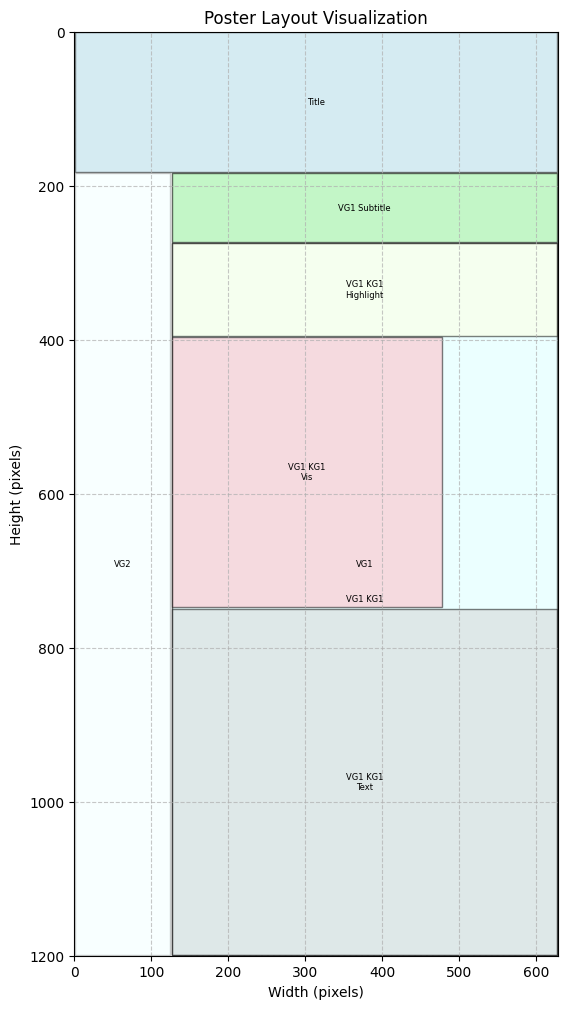

In [179]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

In [91]:
layout

{'Title': [[0.0, 0.0],
  [628.0, 0.0],
  [0.0, 182.5924616965028],
  [628.0, 182.5924616965028]],
 'VG2': {'coords': [[0.0, 182.5924616965028],
   [125.6, 182.5924616965028],
   [0.0, 1199.9999999999998],
   [125.6, 1199.9999999999998]]},
 'VG1': {'coords': [[125.6, 182.5924616965028],
   [628.0, 182.5924616965028],
   [125.6, 1199.9999999999998],
   [628.0, 1199.9999999999998]],
  'Subtitle': [[125.6, 182.5924616965028],
   [628.0, 182.5924616965028],
   [125.6, 273.8886925447542],
   [628.0, 273.8886925447542]],
  'KG1': {'coords': [[125.6, 273.8886925447542],
    [628.0, 273.8886925447542],
    [125.6, 1199.9999999999998],
    [628.0, 1199.9999999999998]],
   'Highlight': [[125.6, 273.8886925447542],
    [628.0, 273.8886925447542],
    [125.6, 395.6170003424227],
    [628.0, 395.6170003424227]],
   'Icon': None,
   'Vis': [[125.6, 395.6170003424227],
    [478.40215379442486, 395.6170003424227],
    [125.6, 748.4191541368476],
    [478.40215379442486, 748.4191541368476]],
   'placeme

### 2 VGs test

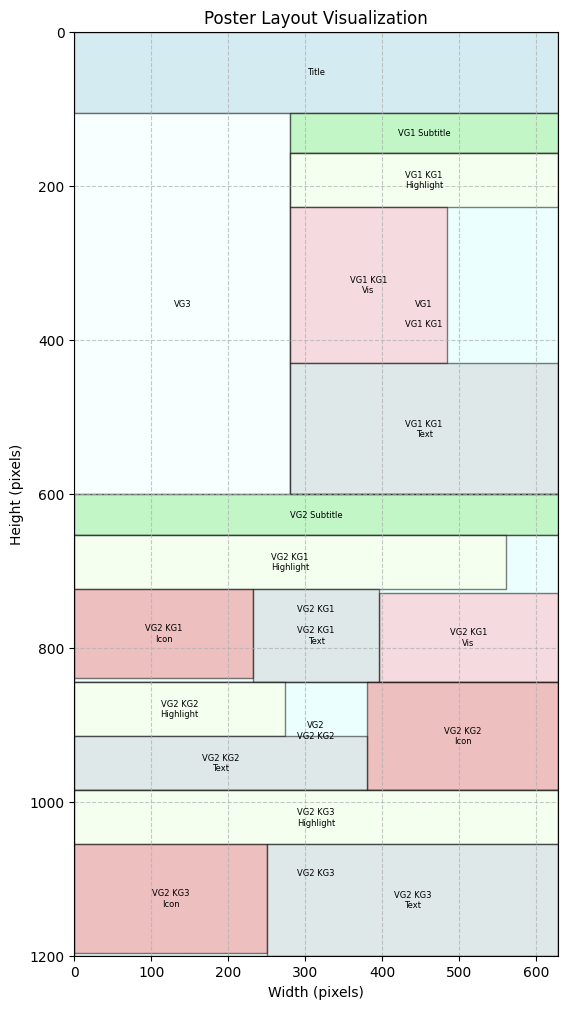

In [92]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

In [93]:
layout

{'Title': [[0.0, 0.0],
  [628.0, 0.0],
  [0.0, 105.04927886288986],
  [628.0, 105.04927886288986]],
 'VG3': {'coords': [[0.0, 105.04927886288986],
   [280.5251101321586, 105.04927886288986],
   [0.0, 600.7842287405832],
   [280.5251101321586, 600.7842287405832]]},
 'VG1': {'coords': [[280.5251101321586, 105.04927886288986],
   [628.0, 105.04927886288986],
   [280.5251101321586, 600.7842287405832],
   [628.0, 600.7842287405832]],
  'Subtitle': [[280.5251101321586, 105.04927886288986],
   [628.0, 105.04927886288986],
   [280.5251101321586, 157.5739182943348],
   [628.0, 157.5739182943348]],
  'KG1': {'coords': [[280.5251101321586, 157.5739182943348],
    [628.0, 157.5739182943348],
    [280.5251101321586, 600.7842287405832],
    [628.0, 600.7842287405832]],
   'Highlight': [[280.5251101321586, 157.5739182943348],
    [628.0, 157.5739182943348],
    [280.5251101321586, 227.6067708695947],
    [628.0, 227.6067708695947]],
   'Icon': None,
   'Vis': [[280.5251101321586, 227.6067708695947],


### 3 VGs test

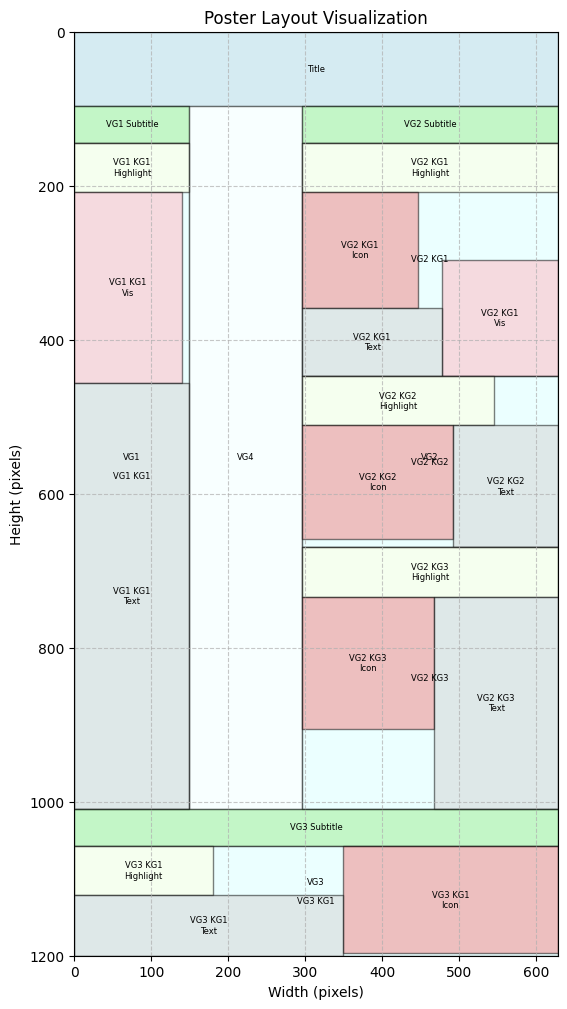

In [94]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

In [72]:
layout

{'Title': [[0.0, 0.0],
  [628.0, 0.0],
  [0.0, 96.15546946051782],
  [628.0, 96.15546946051782]],
 'VG1': {'coords': [[0.0, 96.15546946051782],
   [149.16187594553708, 96.15546946051782],
   [0.0, 1009.2753722079137],
   [149.16187594553708, 1009.2753722079137]],
  'Subtitle': [[0.0, 96.15546946051782],
   [149.16187594553708, 96.15546946051782],
   [0.0, 144.23320419077675],
   [149.16187594553708, 144.23320419077675]],
  'KG1': {'coords': [[0.0, 144.23320419077675],
    [149.16187594553708, 144.23320419077675],
    [0.0, 1009.2753722079137],
    [149.16187594553708, 1009.2753722079137]],
   'Highlight': [[0.0, 144.23320419077675],
    [149.16187594553708, 144.23320419077675],
    [0.0, 208.33685049778865],
    [149.16187594553708, 208.33685049778865]],
   'Icon': None,
   'Vis': [[0.0, 208.33685049778865],
    [139.28056964160157, 208.33685049778865],
    [0.0, 456.16704558960635],
    [139.28056964160157, 456.16704558960635]]}},
 'VG4': {'coords': [[149.16187594553708, 96.1554694605

### 4 VGs test

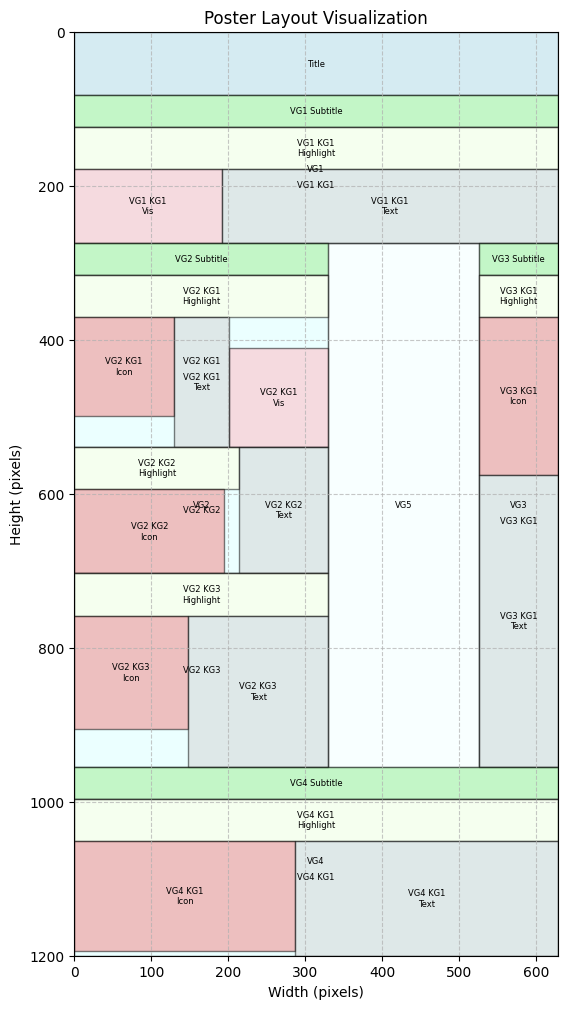

In [95]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 4: Lesser-known Valentine's Day gift traditions
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        }
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

### 5 VGs test

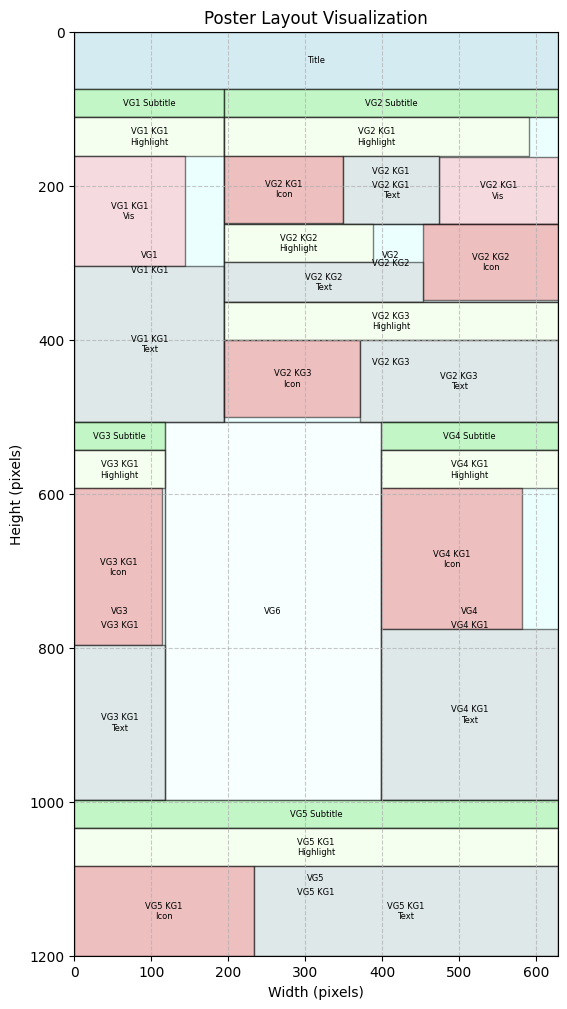

In [96]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 4: Lesser-known Valentine's Day gift traditions
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        }
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

### 6 VGs test

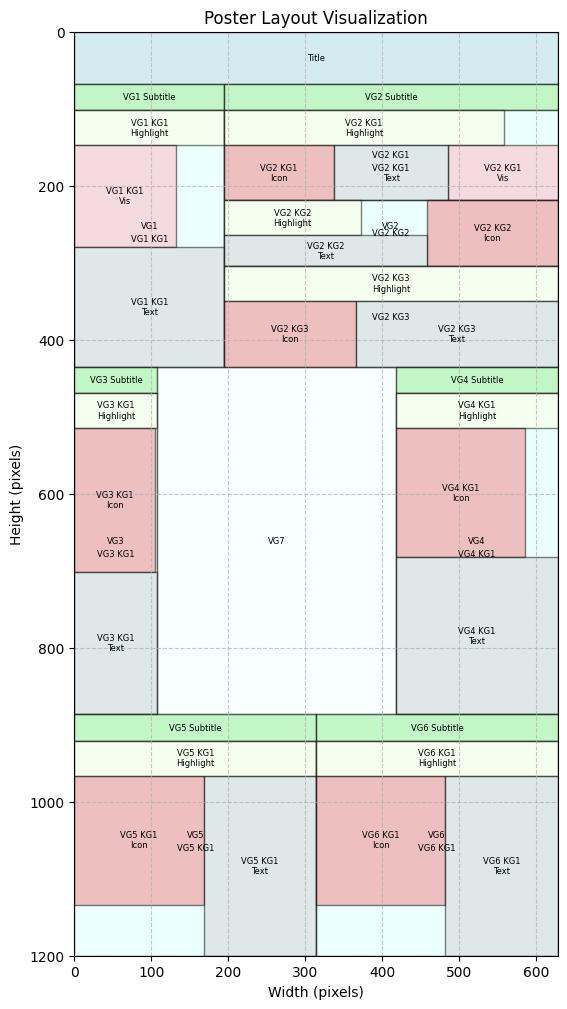

In [97]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 4: Lesser-known Valentine's Day gift traditions
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        }
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

### 7 VGs test

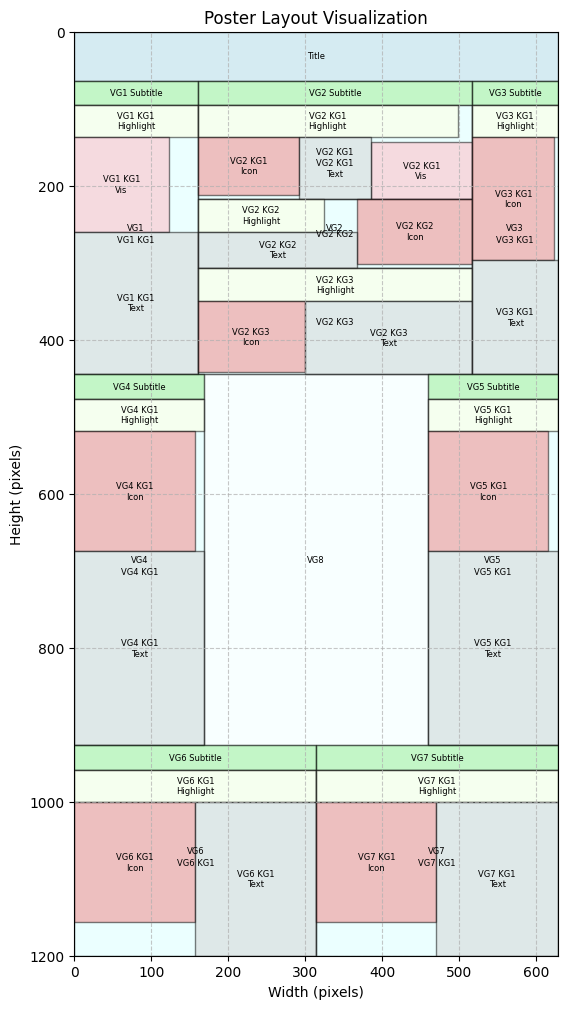

In [98]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 4: Lesser-known Valentine's Day gift traditions
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        }
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

### 8 VGs test

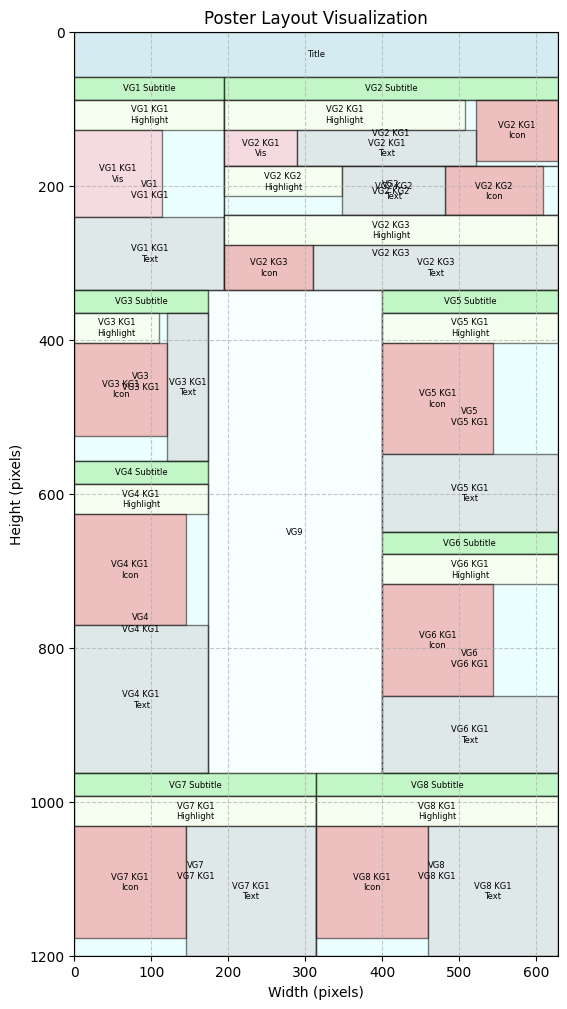

In [99]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 4: Lesser-known Valentine's Day gift traditions
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        }
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

### 9 VGs test

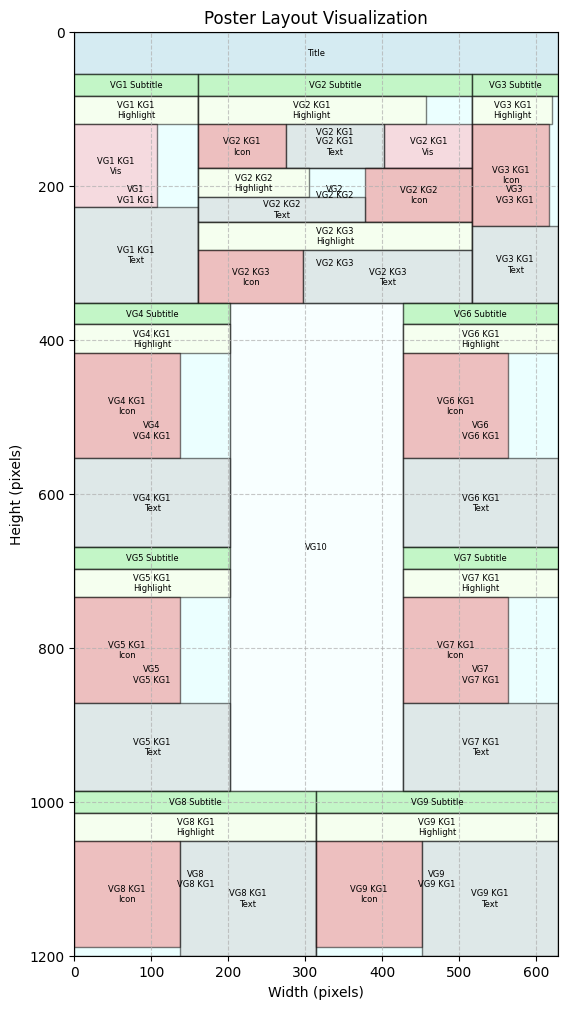

In [100]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 4: Lesser-known Valentine's Day gift traditions
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        }
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)

### 10 VGs test

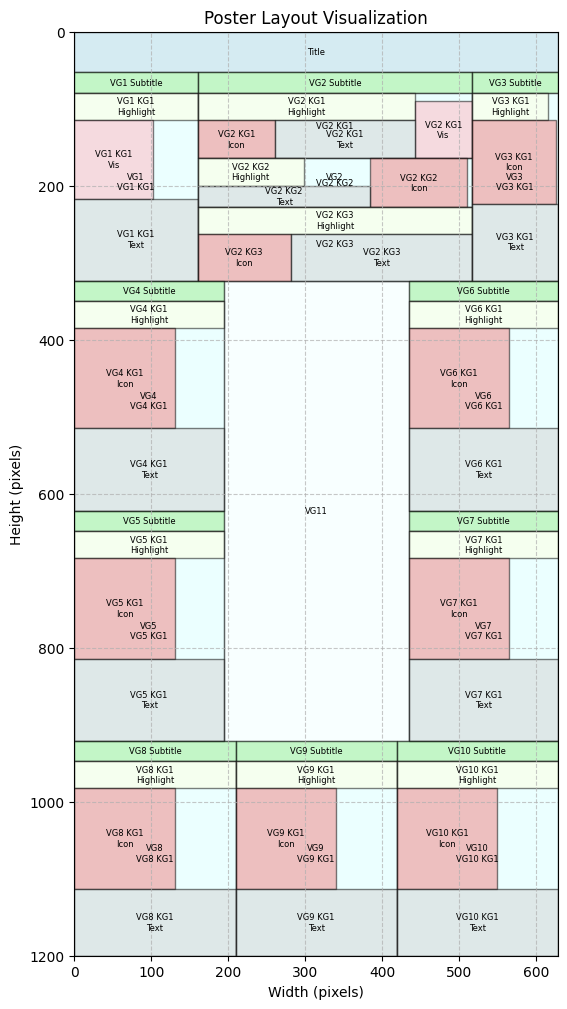

In [101]:
# Valentine's Day Gift Ideas dictionary
valentine_data = {
    "title": "Valentine's Day Gift Ideas", # font size:
    "data": [
        # Section 1: Common gifts exchanged on Valentine's Day
        {
            "subtask_title": "Common gifts exchanged on Valentine's Day", # font size
            # "subtask_content": (
            #     "Across the United States and in other places around the world, "
            #     "candy, flowers and gifts are exchanged between loved ones, "
            #     "all in the name of St. Valentine."
            # ),
            "subtask_relation": "Generalization",  # Broad overview of gift traditions
            "related_subtask": {
                "title": None, # subtask_title
                "relation": None
            },
            "knowledges": [
                {
                    "knowledge_content": "Exchanged gifts include candy, flowers, and gifts.", # text, font size
                    # "data_insight": "Categorization",
                    "first_level_highlight": "candy, flowers, gifts", # above the text, font size
                    # "second_level_highlight": "St. Valentine",
                    "icon_keyword": "", 
                    "visualization": {
                        "is_visualization": True,
                        # "type": None,
                        # "data": []
                    }
                }
            ]
        },
        # Section 2: Traditional Valentine's Day gifts
        {
            "subtask_title": "Traditional Valentine's Day gifts",
            "subtask_content": (
                "Celebrating Valentine’s Day in the United States comes with multiple "
                "go-to practices. Offering a bouquet of red roses to your beloved. "
                "Purchasing a card with a heartfelt message. Sharing a candlelit meal "
                "with your partner. Giving a heart-shaped box of delicious chocolates."
            ),
            "subtask_relation": "Elaboration",  # Builds on common gifts with specifics
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity" # objs with relation should be close, layout should be similar
            },
            "knowledges": [
                {
                    "knowledge_content": "Offered bouquets of red roses.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "red roses.",
                    "second_level_highlight": "red roses",
                    "icon_keyword": "rose",
                    "visualization": {
                        "is_visualization": True,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Purchased cards with heartfelt messages.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "cards",
                    "second_level_highlight": "heartfelt messages",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                },
                {
                    "knowledge_content": "Given heart-shaped boxes of chocolates.",
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "heart-shaped boxes",
                    "second_level_highlight": "chocolates",
                    "icon_keyword": "chocolates",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 3: Historical gifts and decorations
        {
            "subtask_title": "Historical gifts and decorations",
            "subtask_content": (
                "By the middle of the 18th, it was common for friends and lovers of all "
                "social classes to exchange small tokens of affection or handwritten notes, "
                "and by 1900 printed cards began to replace written letters due to "
                "improvements in printing technology."
            ),
            "subtask_relation": "Elaboration",  # Historical context for gifts
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": "By 1900, printed cards began to replace written letters.",
                    "data_insight": "Trend",
                    "first_level_highlight": "1900",
                    "second_level_highlight": "printed cards",
                    "icon_keyword": "cards",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        # Section 4: Lesser-known Valentine's Day gift traditions
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        },
        {
            "subtask_title": "Lesser-known Valentine's Day gift traditions",
            "subtask_content": (
                "In addition to traditional gifts, there are several lesser-known traditions. "
                "For example, during the 18th and 19th centuries, puzzle purses were popular "
                "Valentine’s gifts, consisting of intricately folded sheets of paper with a "
                "message written on different corners."
            ),
            "subtask_relation": "Elaboration",  # Expands with unique traditions
            "related_subtask": {
                "title": "Common gifts exchanged on Valentine's Day",
                "relation": "Similarity"
            },
            "knowledges": [
                {
                    "knowledge_content": (
                        "puzzle purses were popular Valentine’s gifts during the 18th and 19th centuries."
                    ),
                    "data_insight": "Textual_Statement",
                    "first_level_highlight": "18th and 19th centuries",
                    "second_level_highlight": "puzzle purses",
                    "icon_keyword": "gifts",
                    "visualization": {
                        "is_visualization": False,
                        "type": None,
                        "data": []
                    }
                }
            ]
        }
    ]
}

# Test code
W, H = 628.0, 1200.0
layout = layout_poster(valentine_data, W, H)

# Visualize the layout
visualize_poster_layout(layout, W, H)